In [1]:
from scorecard import Scorecard
import time
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

from skglm.datafits import Huber
from skglm.penalties import MCPenalty, SCAD
from skglm.solvers import AndersonCD

from sklearn.metrics import accuracy_score

## appendicitis
7 medical measures taken over 106 patients on which the class label represents if the patient has appendicitis (class label 1) or not (class label 0).

#### load dataset

In [2]:
with open('datasets/appendicitis.dat', "r") as file:
    lines = file.readlines()

data_start_ind = lines.index("@data\n") + 1
app_data = lines[data_start_ind:]
app_data = pd.read_csv(StringIO("".join(app_data)), header=None)

app_data.columns = ["At1", "At2", "At3", "At4", "At5", "At6", "At7", "Class"]

app_X = app_data.iloc[:, :-1]
app_y = app_data.iloc[:, -1]

print("num observations: ", app_y.count())
print("num features: ", len(app_X.columns))
print("target distribution: ", app_y.value_counts())


app_X.describe()


num observations:  106
num features:  7
target distribution:  Class
0    85
1    21
Name: count, dtype: int64


,At1,At2,At3,At4,At5,At6,At7
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.398491,0.682104,0.415151,0.208745,0.169151,0.676349,0.375396
std,0.191452,0.207134,0.205799,0.199650,0.177329,0.218909,0.198132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244750,0.589000,0.277000,0.056000,0.049250,0.576000,0.238000
50%,0.413000,0.750000,0.442500,0.146000,0.113000,0.744000,0.397500
75%,0.505750,0.821000,0.545500,0.302500,0.226750,0.831250,0.486750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
categorical_columns = app_X.select_dtypes(include=['object']).columns.to_list()
print("Categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    app_X[col] = app_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {app_X[col].unique()}")

Categorical columns:  []


#### CAIM & 1ook

Execution time: 0.04747605323791504 seconds

Evaluating the model on the test set...
test predictions:  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
    True Value  Prediction
0            0           0
1            1           0
2            1           0
3            0           0
4            0           0
5            0           0
6            0           0
7            0           0
8            0           0
9            1           1
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0           0
16           0           0
17           0           0
18           0           1
19           0           0
20           1           0
21           0           0
22           0           0
23           0           0
24           0           0
25           0           0
26           0           0
auc:  0.6428571428571428
accuracy:  0.8148148148148148
precision:  0.796296296296296

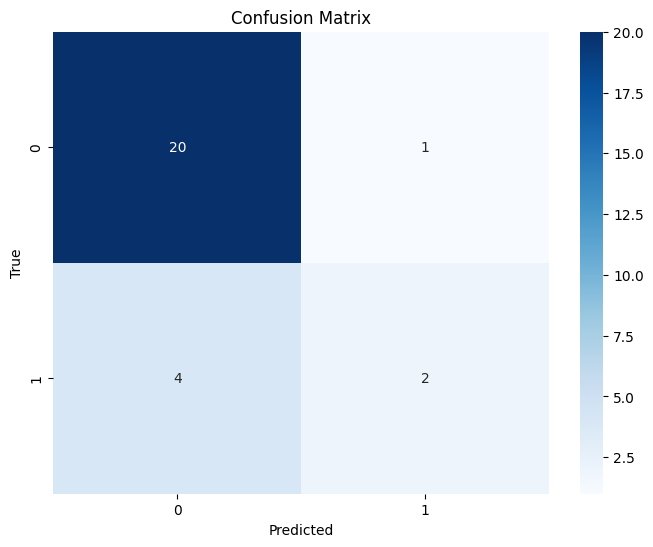

accuracy for class 0: 0.952
accuracy for class 1: 0.333

Evaluating the model on the train set...
auc on train set:  0.7921875
accuracy on train set:  0.9113924050632911
precision on train set:  0.910566868464502
recall on train set:  0.9113924050632911
f1 score on train set:  0.9041972018654231
balanced accuracy on train set:  0.7921875
logistic loss on train set:  0.6498690864159518
mse on train set:  0.08860759493670886

Scorecard table:
  Feature             Bin    Points
0     At1    [0.0, 0.204[  0.461761
1     At1  [0.204, 0.884[ -0.279906
2     At2  [0.411, 0.964[ -0.512269
3     At4    [0.056, 1.0[ -0.475437
4     At5  [0.033, 0.784[ -0.375497
5     At6    [0.0, 0.506[  0.709042
6     At6  [0.506, 0.956[ -0.665817
7     At7    [0.0, 0.145[  1.082419
8     At7  [0.145, 0.837[ -0.378686


In [4]:
start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.027408123016357422 seconds

Evaluating the model on the test set...
test predictions:  [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
    True Value  Prediction
0            0           0
1            1           1
2            1           0
3            0           0
4            0           0
5            0           0
6            0           0
7            0           0
8            0           0
9            1           1
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0           0
16           0           0
17           0           0
18           0           1
19           0           0
20           1           0
21           0           0
22           0           0
23           0           0
24           0           0
25           0           0
26           0           0
auc:  0.726190476190476
accuracy:  0.8518518518518519
precision:  0.842995169082125

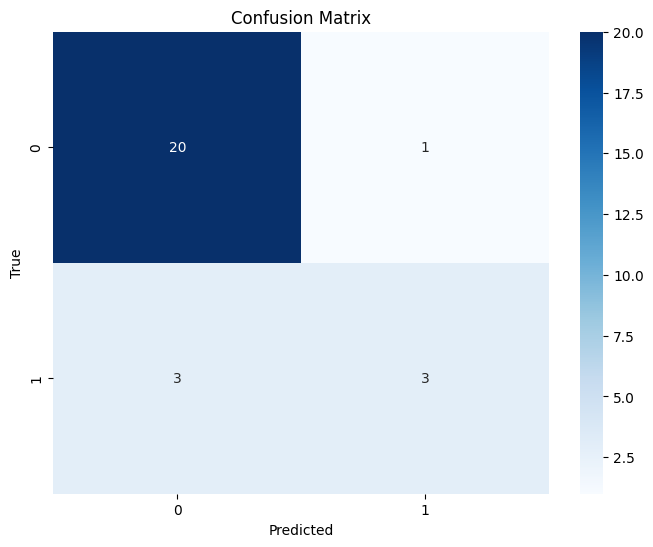

accuracy for class 0: 0.952
accuracy for class 1: 0.500

Evaluating the model on the train set...
auc on train set:  0.7765625
accuracy on train set:  0.8860759493670886
precision on train set:  0.8799829964103533
recall on train set:  0.8860759493670886
f1 score on train set:  0.8810513093052467
balanced accuracy on train set:  0.7765625
logistic loss on train set:  0.6498690864159518
mse on train set:  0.11392405063291139

Scorecard table:
   Feature             Bin    Points
0      At1    [0.0, 0.204[  0.149457
1      At1  [0.204, 0.884[ -0.005333
2      At1    [0.884, inf[ -0.144124
3      At2    [0.0, 0.411[  0.209746
4      At2  [0.411, 0.964[ -0.182396
5      At2    [0.964, inf[ -0.027350
6      At3    [0.0, 0.153[  0.150040
7      At3  [0.153, 0.927[ -0.005916
8      At3    [0.927, inf[ -0.144124
9      At4    [0.0, 0.056[ -0.196631
10     At4    [0.056, 1.0[  0.196631
11     At5    [0.0, 0.033[  0.313753
12     At5  [0.033, 0.784[ -0.234388
13     At5    [0.784, inf[ -0.079365

In [5]:
start_time = time.time()

scorecard = Scorecard()
app_caim_1ook_mm_model, app_caim_1ook_mm_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params={'C': 1}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 1.7702038288116455 seconds

Evaluating the model on the test set...
test predictions:  [0.20511678 0.45029834 0.04954419 0.04954419 0.24714021 0.04954419
 0.04954419 0.04954419 0.17285303 0.93453805 0.04954419 0.04954419
 0.17285303 0.17285303 0.93453805 0.04954419 0.04954419 0.17285303
 0.69473307 0.04954419 0.04954419 0.04954419 0.04954419 0.04954419
 0.04954419 0.04954419 0.04954419]
    True Value  Prediction
0            0           0
1            1           0
2            1           0
3            0           0
4            0           0
5            0           0
6            0           0
7            0           0
8            0           0
9            1           1
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0           0
16           0           0
17           0           0
18           0           1
19           0           0
20           1           0


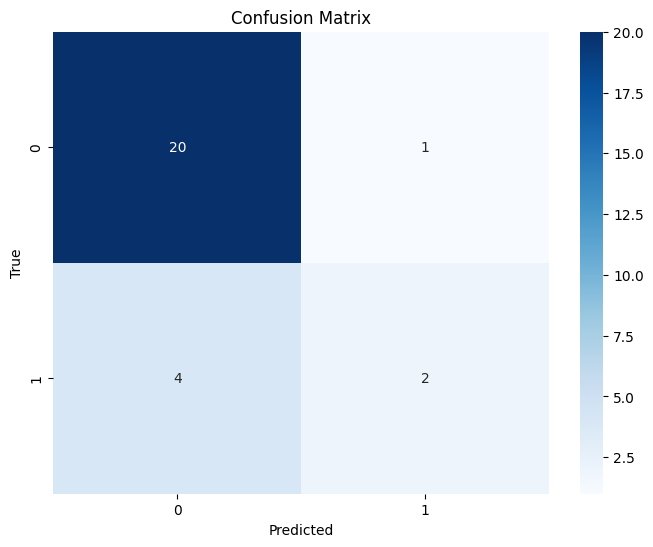

accuracy for class 0: 0.952
accuracy for class 1: 0.333

Evaluating the model on the train set...
auc on train set:  0.7921875
accuracy on train set:  0.9113924050632911
precision on train set:  0.910566868464502
recall on train set:  0.9113924050632911
f1 score on train set:  0.9041972018654231
balanced accuracy on train set:  0.7921875
logistic loss on train set:  0.6498690864159518
mse on train set:  0.08860759493670886

Scorecard table:
  Feature             Bin    Points
0     At1    [0.0, 0.204[  0.116496
1     At2    [0.0, 0.411[  0.163335
2     At5    [0.0, 0.033[  0.165332
3     At5  [0.033, 0.784[  0.042023
4     At6    [0.0, 0.506[  0.197596
5     At7    [0.0, 0.145[  0.284258


In [6]:
start_time = time.time()

scorecard = Scorecard()
app_caim_1ook_beyondl1_model, app_caim_1ook_beyondl1_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.028362035751342773 seconds

Evaluating the model on the test set...
test predictions:  [ 1.31903206e-01  4.42475363e-01  5.23155700e-02  5.23155700e-02
  1.84218776e-01  5.23155700e-02 -9.36750677e-17  5.23155700e-02
  1.81345043e-01  7.96444295e-01  5.23155700e-02  5.23155700e-02
  1.81345043e-01  2.35282625e-02  9.54261076e-01 -2.67147415e-16
  5.23155700e-02  1.81345043e-01  1.14554492e+00  5.23155700e-02
  1.57816781e-01  5.23155700e-02  5.23155700e-02  5.23155700e-02
  5.23155700e-02  5.23155700e-02  5.23155700e-02]
    True Value  Prediction
0            0           0
1            1           0
2            1           0
3            0           0
4            0           0
5            0           0
6            0           0
7            0           0
8            0           0
9            1           1
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0         

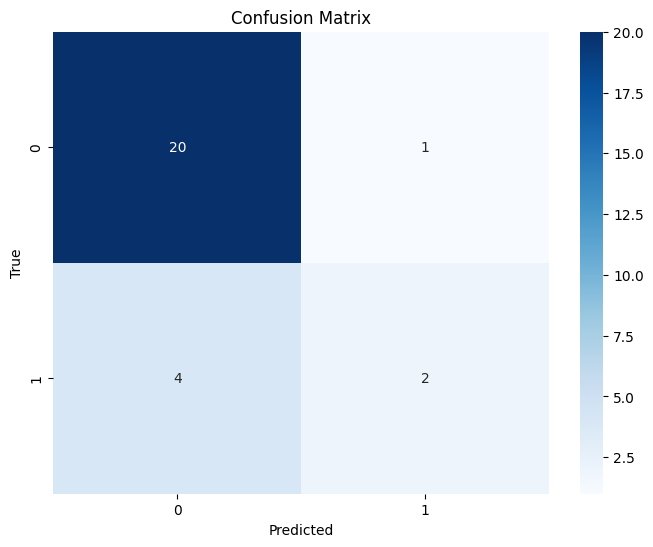

accuracy for class 0: 0.952
accuracy for class 1: 0.333

Evaluating the model on the train set...
auc on train set:  0.7588541666666666
accuracy on train set:  0.8987341772151899
precision on train set:  0.8978902953586498
recall on train set:  0.8987341772151899
f1 score on train set:  0.8883430946533157
balanced accuracy on train set:  0.7588541666666666
logistic loss on train set:  0.6546777635430621
mse on train set:  0.10126582278481013

Scorecard table:
   Feature             Bin    Points
0      At1    [0.0, 0.204[  0.132503
1      At1  [0.204, 0.884[ -0.001592
2      At1    [0.884, inf[ -0.017009
3      At2    [0.0, 0.411[  0.222641
4      At2  [0.411, 0.964[ -0.028212
5      At2    [0.964, inf[ -0.080527
6      At3    [0.0, 0.153[ -0.161749
7      At3  [0.153, 0.927[  0.292660
8      At3    [0.927, inf[ -0.017009
9      At4    [0.0, 0.056[  0.160617
10     At4    [0.056, 1.0[  0.002800
11     At4      [1.0, inf[ -0.049515
12     At5    [0.0, 0.033[  0.036214
13     At5  [0.033

In [7]:
start_time = time.time()

scorecard = Scorecard()
app_caim_1ook_adaptivelasso_model, app_caim_1ook_adaptivelasso_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-10})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

Execution time: 0.03497886657714844 seconds

Evaluating the model on the test set...
test predictions:  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
    True Value  Prediction
0            0           0
1            1           0
2            1           0
3            0           0
4            0           0
5            0           0
6            0           0
7            0           0
8            0           0
9            1           1
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0           0
16           0           0
17           0           0
18           0           1
19           0           0
20           1           0
21           0           0
22           0           0
23           0           0
24           0           0
25           0           0
26           0           0
auc:  0.6428571428571428
accuracy:  0.8148148148148148
precision:  0.796296296296296

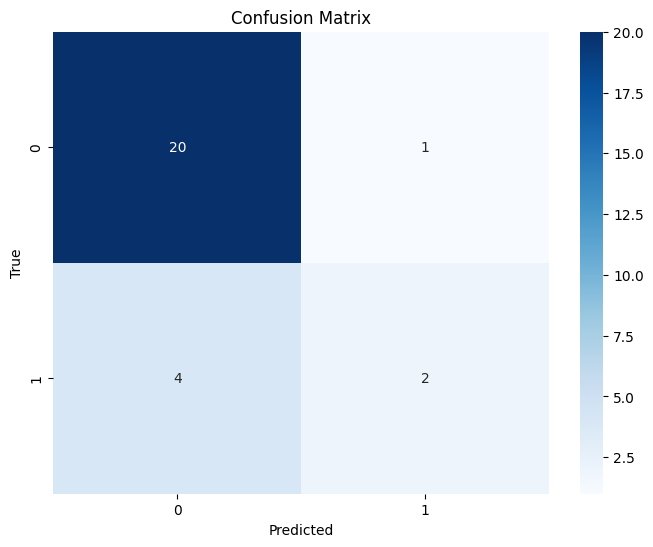

accuracy for class 0: 0.952
accuracy for class 1: 0.333

Evaluating the model on the train set...
auc on train set:  0.7921875
accuracy on train set:  0.9113924050632911
precision on train set:  0.910566868464502
recall on train set:  0.9113924050632911
f1 score on train set:  0.9041972018654231
balanced accuracy on train set:  0.7921875
logistic loss on train set:  0.6498690864159518
mse on train set:  0.08860759493670886

Scorecard table:
   Feature             Bin    Points
0      At1  [0.204, 0.884[ -0.936680
1      At1    [0.884, inf[ -0.090136
2      At2  [0.411, 0.964[ -0.852512
3      At2    [0.964, inf[ -0.168089
4      At3  [0.153, 0.927[  0.294171
5      At3    [0.927, inf[ -0.090136
6      At4    [0.056, 1.0[ -0.711088
7      At4      [1.0, inf[ -0.168118
8      At5  [0.033, 0.784[ -0.324027
9      At5    [0.784, inf[ -0.168062
10     At6  [0.506, 0.956[ -1.291244
11     At6    [0.956, inf[ -0.168092
12     At7  [0.145, 0.837[ -1.637604
13     At7    [0.837, inf[ -0.090136


In [8]:
start_time = time.time()

scorecard = Scorecard()
app_caim_diff_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 10.0, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.021821975708007812 seconds

Evaluating the model on the test set...
test predictions:  [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
    True Value  Prediction
0            0           0
1            1           1
2            1           0
3            0           0
4            0           0
5            0           0
6            0           0
7            0           0
8            0           0
9            1           1
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0           0
16           0           0
17           0           0
18           0           1
19           0           0
20           1           0
21           0           0
22           0           0
23           0           0
24           0           0
25           0           0
26           0           0
auc:  0.726190476190476
accuracy:  0.8518518518518519
precision:  0.842995169082125

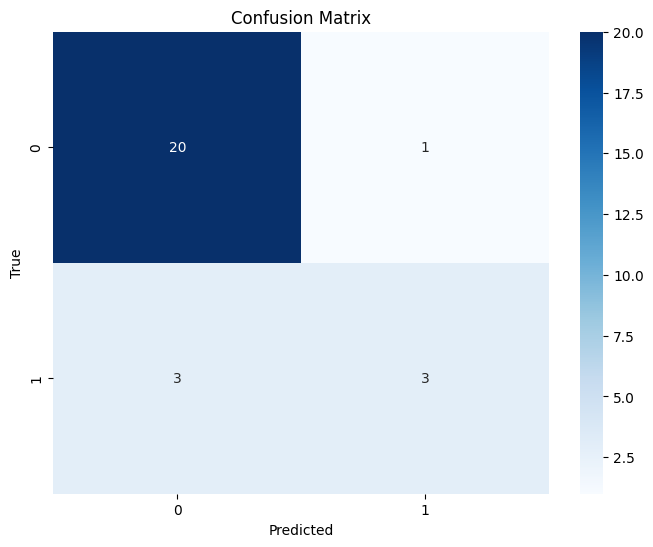

accuracy for class 0: 0.952
accuracy for class 1: 0.500

Evaluating the model on the train set...
auc on train set:  0.7765625
accuracy on train set:  0.8860759493670886
precision on train set:  0.8799829964103533
recall on train set:  0.8860759493670886
f1 score on train set:  0.8810513093052467
balanced accuracy on train set:  0.7765625
logistic loss on train set:  0.6498690864159518
mse on train set:  0.11392405063291139

Scorecard table:
   Feature             Bin        Points
0      At1    [0.0, 0.204[ -3.108624e-15
1      At1  [0.204, 0.884[ -8.678714e-02
2      At2    [0.0, 0.411[ -3.108624e-15
3      At2  [0.411, 0.964[ -4.343912e-01
4      At3    [0.0, 0.153[ -3.108624e-15
5      At3  [0.153, 0.927[ -8.735526e-02
6      At4    [0.0, 0.056[ -3.108624e-15
7      At4    [0.056, 1.0[  4.353501e-01
8      At5    [0.0, 0.033[ -3.108624e-15
9      At5  [0.033, 0.784[ -5.217251e-01
10     At6    [0.0, 0.506[ -3.108624e-15
11     At6  [0.506, 0.956[ -8.706528e-02
12     At7    [0.0, 0

In [9]:
start_time = time.time()

scorecard = Scorecard()
app_caim_diff_mm_model, app_caim_1ook_mm_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 2})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.01912093162536621 seconds

Evaluating the model on the test set...
test predictions:  [0.22115711 0.33258549 0.04609423 0.04609423 0.22115711 0.04609423
 0.04609423 0.04609423 0.20671018 0.94465973 0.04609423 0.04609423
 0.20671018 0.20671018 0.94465973 0.04609423 0.04609423 0.20671018
 0.49755252 0.04609423 0.04609423 0.04609423 0.04609423 0.04609423
 0.04609423 0.04609423 0.04609423]
    True Value  Prediction
0            0           0
1            1           0
2            1           0
3            0           0
4            0           0
5            0           0
6            0           0
7            0           0
8            0           0
9            1           1
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0           0
16           0           0
17           0           0
18           0           0
19           0           0
20           1           0

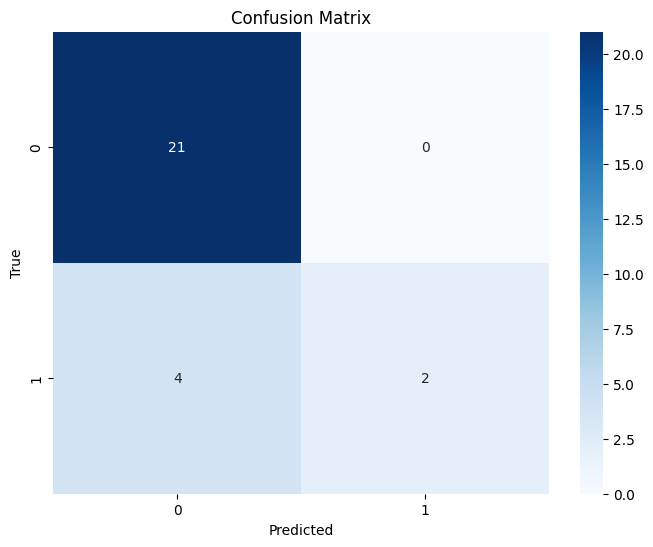

accuracy for class 0: 1.000
accuracy for class 1: 0.333

Evaluating the model on the train set...
auc on train set:  0.7588541666666666
accuracy on train set:  0.8987341772151899
precision on train set:  0.8978902953586498
recall on train set:  0.8987341772151899
f1 score on train set:  0.8883430946533157
balanced accuracy on train set:  0.7588541666666666
logistic loss on train set:  0.6546777635430623
mse on train set:  0.10126582278481013

Scorecard table:
  Feature             Bin    Points
0     At1  [0.204, 0.884[ -0.286491
1     At2  [0.411, 0.964[ -0.276395
2     At5    [0.0, 0.033[  1.095360
3     At5  [0.033, 0.784[ -0.160616
4     At6  [0.506, 0.956[ -0.175063


In [10]:
start_time = time.time()

scorecard = Scorecard()
app_caim_diff_beyondl1_model, app_caim_1ook_beyondl1_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.02520012855529785 seconds

Evaluating the model on the test set...
test predictions:  [ 1.31903206e-01  4.42475363e-01  5.23155700e-02  5.23155700e-02
  1.84218776e-01  5.23155700e-02  8.32667268e-17  5.23155700e-02
  1.81345043e-01  7.96444295e-01  5.23155700e-02  5.23155700e-02
  1.81345043e-01  2.35282625e-02  9.54261076e-01 -2.77555756e-17
  5.23155700e-02  1.81345043e-01  1.14554492e+00  5.23155700e-02
  1.57816781e-01  5.23155700e-02  5.23155700e-02  5.23155700e-02
  5.23155700e-02  5.23155700e-02  5.23155700e-02]
    True Value  Prediction
0            0           0
1            1           0
2            1           0
3            0           0
4            0           0
5            0           0
6            0           0
7            0           0
8            0           0
9            1           1
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0          

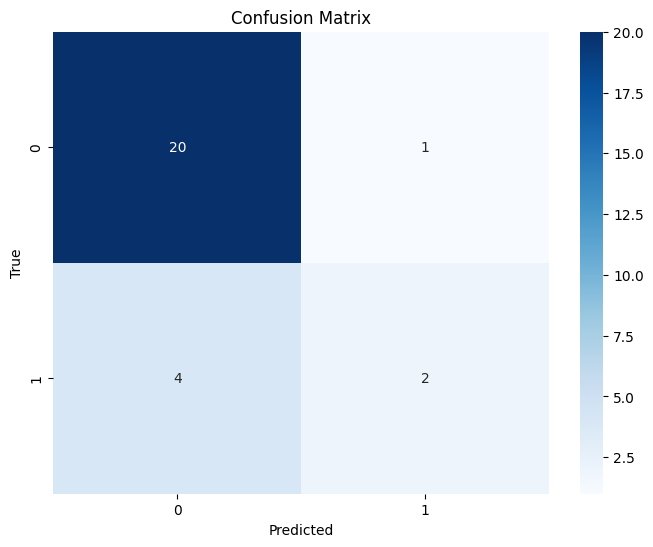

accuracy for class 0: 0.952
accuracy for class 1: 0.333

Evaluating the model on the train set...
auc on train set:  0.7588541666666666
accuracy on train set:  0.8987341772151899
precision on train set:  0.8978902953586498
recall on train set:  0.8987341772151899
f1 score on train set:  0.8883430946533157
balanced accuracy on train set:  0.7588541666666666
logistic loss on train set:  0.6546777635430621
mse on train set:  0.10126582278481013

Scorecard table:
   Feature             Bin    Points
0      At1    [0.0, 0.204[  0.136323
1      At1  [0.204, 0.884[ -0.134095
2      At1    [0.884, inf[ -0.017439
3      At2    [0.0, 0.411[  0.136323
4      At2  [0.411, 0.964[ -0.250853
5      At2    [0.964, inf[ -0.052316
6      At3    [0.0, 0.153[  0.136323
7      At3  [0.153, 0.927[  0.454409
8      At3    [0.927, inf[ -0.017439
9      At4    [0.0, 0.056[  0.136323
10     At4    [0.056, 1.0[ -0.157817
11     At4      [1.0, inf[ -0.052316
12     At5    [0.0, 0.033[  0.136323
13     At5  [0.033

In [11]:
start_time = time.time()

scorecard = Scorecard()
app_caim_diff_adaptivelasso_model, app_caim_1ook_adaptivelasso_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-10})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

Execution time: 0.18825984001159668 seconds

Evaluating the model on the test set...
test predictions:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
    True Value  Prediction
0            0           0
1            1           0
2            1           0
3            0           0
4            0           0
5            0           0
6            0           0
7            0           0
8            0           0
9            1           0
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0           0
16           0           0
17           0           0
18           0           0
19           0           0
20           1           0
21           0           0
22           0           0
23           0           0
24           0           0
25           0           0
26           0           0
auc:  0.5833333333333334
accuracy:  0.8148148148148148
precision:  0.850427350427350

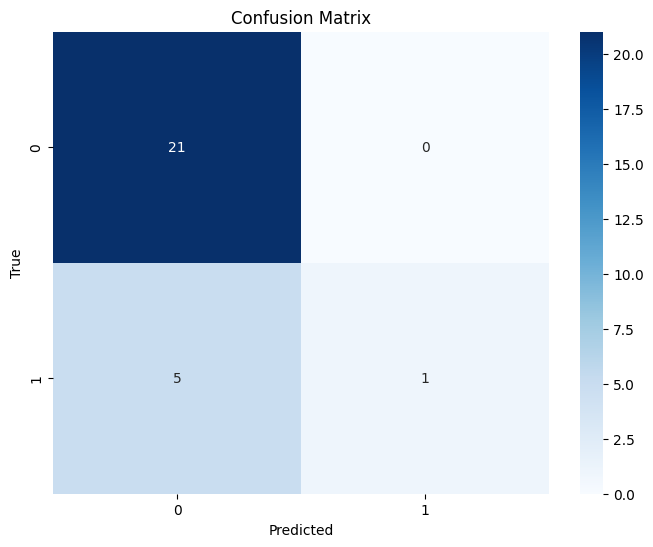

accuracy for class 0: 1.000
accuracy for class 1: 0.167

Evaluating the model on the train set...
auc on train set:  1.0
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.6210170236532891
mse on train set:  0.0

Scorecard table:
    Feature                           Bin    Points
0       At1              [0.0135, 0.0445[ -0.455087
1       At1              [0.0445, 0.0755[  0.754453
2       At1              [0.0755, 0.0935[ -0.212493
3       At1                 [0.0935, 0.1[  2.008241
4       At1                  [0.1, 0.109[ -0.313521
..      ...                           ...       ...
399     At7                [0.65, 0.6905[ -0.428219
400     At7               [0.6905, 0.731[ -0.552891
401     At7               [0.731, 0.7825[ -0.278176
402     At7  [0.7825, 0.8200000000000001[ -0.156582
403     At7     [0.8200000000000001, inf[  2.008241

[404 rows x 3 col

In [12]:
start_time = time.time()
scorecard = Scorecard()
app_infbins_1ook_ml_model, app_infbins_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 1000.0, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.022315025329589844 seconds

Evaluating the model on the test set...
test predictions:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
    True Value  Prediction
0            0           0
1            1           0
2            1           0
3            0           0
4            0           0
5            0           0
6            0           0
7            0           0
8            0           0
9            1           0
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0           0
16           0           0
17           0           0
18           0           0
19           0           0
20           1           0
21           0           0
22           0           0
23           0           0
24           0           0
25           0           0
26           0           0
auc:  0.5833333333333334
accuracy:  0.8148148148148148
precision:  0.85042735042735

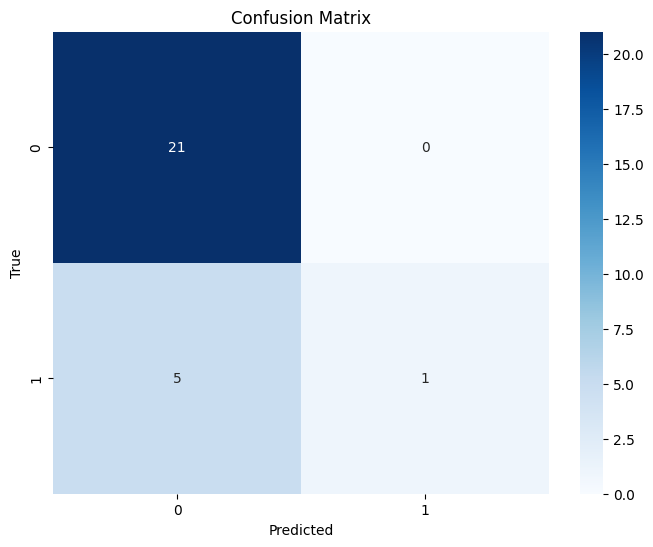

accuracy for class 0: 1.000
accuracy for class 1: 0.167

Evaluating the model on the train set...
auc on train set:  1.0
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.6210170236532891
mse on train set:  0.0

Scorecard table:
    Feature                           Bin    Points
0       At1              [0.0135, 0.0445[ -0.069460
1       At1              [0.0445, 0.0755[  0.096121
2       At1              [0.0755, 0.0935[ -0.030064
3       At1                 [0.0935, 0.1[  0.299103
4       At1                  [0.1, 0.109[ -0.047986
..      ...                           ...       ...
393     At7                [0.65, 0.6905[ -0.064785
394     At7               [0.6905, 0.731[ -0.086440
395     At7               [0.731, 0.7825[ -0.028074
396     At7  [0.7825, 0.8200000000000001[ -0.018161
397     At7     [0.8200000000000001, inf[  0.299103

[398 rows x 3 col

In [13]:
start_time = time.time()

scorecard = Scorecard()
app_infbins_1ook_mm_model, app_infbins_1ook_mm_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params={'C': 1})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.8014481067657471 seconds

Evaluating the model on the test set...
test predictions:  [ 6.05416387e-06  6.05416387e-06  6.05416387e-06  6.05416387e-06
  6.05416387e-06  6.05416387e-06  6.05416387e-06  6.05416387e-06
  6.05416387e-06  9.99996363e-01  6.05416387e-06  6.05416387e-06
 -7.49602241e-01  6.05416387e-06  9.99996363e-01  6.05416387e-06
  6.05416387e-06  6.05416387e-06  9.99996363e-01  6.05416387e-06
  6.05416387e-06  6.05416387e-06  6.05416387e-06  6.05416387e-06
  6.05416387e-06  6.05416387e-06  6.05416387e-06]
    True Value  Prediction
0            0           0
1            1           0
2            1           0
3            0           0
4            0           0
5            0           0
6            0           0
7            0           0
8            0           0
9            1           1
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0           

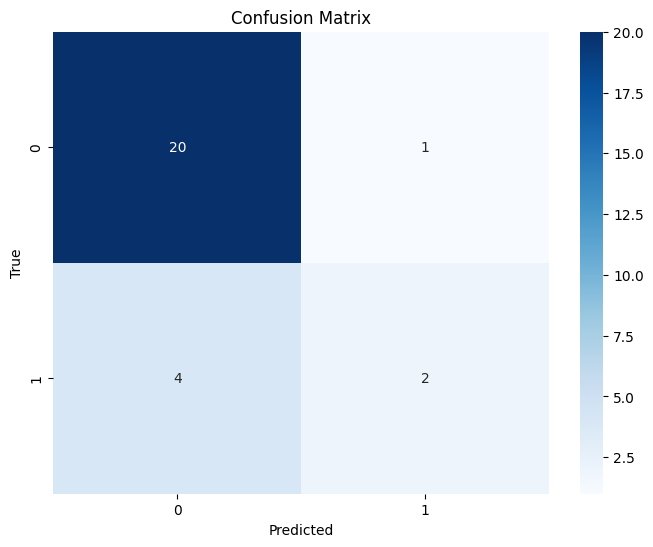

accuracy for class 0: 0.952
accuracy for class 1: 0.333

Evaluating the model on the train set...
auc on train set:  1.0
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.6210170236532891
mse on train set:  0.0

Scorecard table:
   Feature                            Bin    Points
0      At1  [0.2535, 0.27749999999999997[  0.500074
1      At1      [0.8400000000000001, inf[  0.999990
2      At2                 [0.866, 0.884[  0.999990
3      At2                 [0.884, 0.902[  0.999990
4      At2                  [0.902, 0.92[  0.999990
5      At2                 [0.92, 0.9375[  0.999990
6      At3                [0.108, 0.1125[ -0.749608
7      At4   [0.326, 0.33999999999999997[  0.749902
8      At5                [0.0725, 0.075[  0.999990
9      At5                [0.1045, 0.106[  0.999990
10     At5               [0.1855, 0.1905[  0.999755
11     At6   [0.63

In [14]:
start_time = time.time()

scorecard = Scorecard()
app_infbins_1ook_beyondl1_model, app_infbins_1ook_beyondl1_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': SCAD(alpha=1e-2, gamma=3), 'solver': AndersonCD()}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.04234194755554199 seconds

Evaluating the model on the test set...
test predictions:  [ 0.19407317  0.25437716  0.06360229 -0.02049061  0.56786323  0.21056488
 -0.02732835 -0.05966345  0.20470861  0.36660896 -0.07378892 -0.05629141
  0.22642064  0.09059126  0.68450861 -0.00437663  0.20557616 -0.0749147
  0.37437528 -0.04362564  0.06801051  0.0600726  -0.09509642 -0.00296384
 -0.08560282 -0.09759737  0.4242385 ]
    True Value  Prediction
0            0           0
1            1           0
2            1           0
3            0           0
4            0           1
5            0           0
6            0           0
7            0           0
8            0           0
9            1           0
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0           0
16           0           0
17           0           0
18           0           0
19           0           0


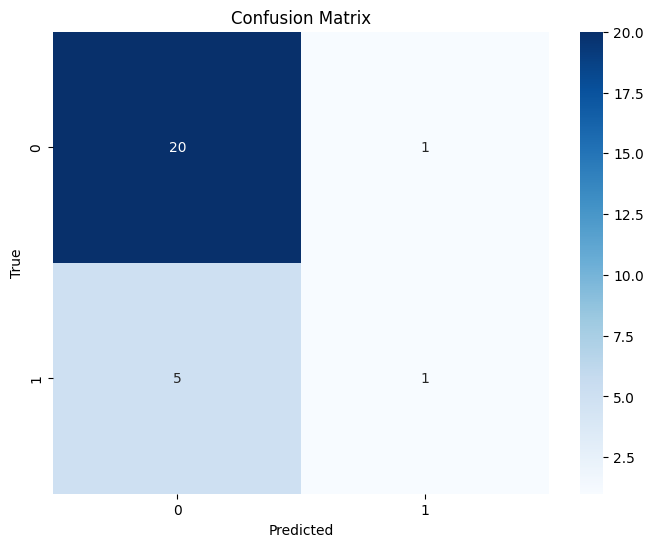

accuracy for class 0: 0.952
accuracy for class 1: 0.167

Evaluating the model on the train set...
auc on train set:  1.0
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.6210170236532891
mse on train set:  0.0

Scorecard table:
    Feature                           Bin    Points
0       At1              [0.0135, 0.0445[ -0.000492
1       At1              [0.0445, 0.0755[  0.071032
2       At1              [0.0755, 0.0935[  0.004298
3       At1                 [0.0935, 0.1[  0.200000
4       At1                  [0.1, 0.109[  0.001495
..      ...                           ...       ...
400     At7                [0.65, 0.6905[ -0.010634
401     At7               [0.6905, 0.731[ -0.012853
402     At7               [0.731, 0.7825[  0.003372
403     At7  [0.7825, 0.8200000000000001[  0.003447
404     At7     [0.8200000000000001, inf[  0.200000

[405 rows x 3 col

In [15]:
start_time = time.time()

scorecard = Scorecard()
app_infbins_1ook_adaptive_lasso_model, app_infbins_1ook_adaptive_lasso_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-10})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

Execution time: 0.3548309803009033 seconds

Evaluating the model on the test set...
test predictions:  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
    True Value  Prediction
0            0           0
1            1           0
2            1           0
3            0           0
4            0           0
5            0           0
6            0           0
7            0           0
8            0           0
9            1           1
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0           0
16           0           0
17           0           0
18           0           1
19           0           0
20           1           0
21           0           0
22           0           0
23           0           0
24           0           0
25           0           0
26           0           0
auc:  0.6428571428571428
accuracy:  0.8148148148148148
precision:  0.7962962962962963

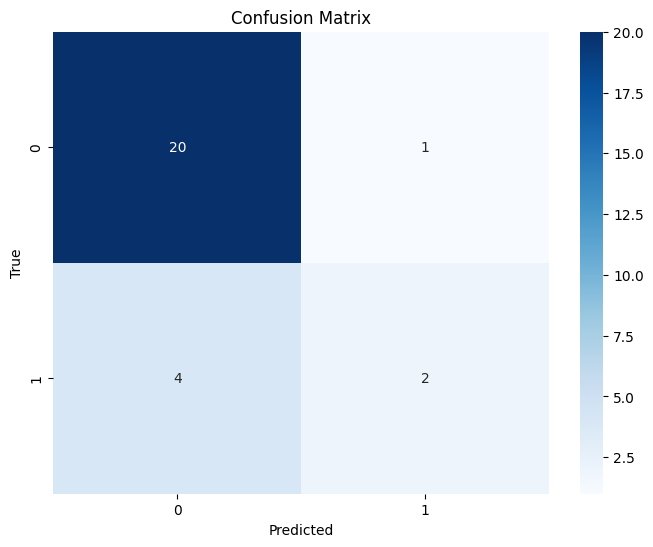

accuracy for class 0: 0.952
accuracy for class 1: 0.333

Evaluating the model on the train set...
auc on train set:  0.8588541666666667
accuracy on train set:  0.9367088607594937
precision on train set:  0.9358114490836955
recall on train set:  0.9367088607594937
f1 score on train set:  0.9339173940584706
balanced accuracy on train set:  0.8588541666666667
logistic loss on train set:  0.6402517321617308
mse on train set:  0.06329113924050633

Scorecard table:
   Feature                                       Bin    Points
0      At1                          [0.2085, 0.2175[ -0.224006
1      At1                          [0.3845, 0.3935[ -0.509427
2      At1                           [0.3935, 0.398[ -0.428556
3      At1              [0.398, 0.40449999999999997[ -0.046532
4      At1                            [0.46, 0.4645[ -0.290018
5      At1                           [0.4645, 0.469[ -0.256579
6      At2             [0.0805, 0.16999999999999998[  0.120232
7      At2                      

In [16]:
start_time = time.time()

scorecard = Scorecard()
app_infbins_diff_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 1/0.99, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.020398855209350586 seconds

Evaluating the model on the test set...
test predictions:  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
    True Value  Prediction
0            0           0
1            1           0
2            1           0
3            0           0
4            0           0
5            0           0
6            0           0
7            0           0
8            0           0
9            1           1
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0           0
16           0           0
17           0           0
18           0           1
19           0           0
20           1           0
21           0           0
22           0           0
23           0           0
24           0           0
25           0           0
26           0           0
auc:  0.6428571428571428
accuracy:  0.8148148148148148
precision:  0.79629629629629

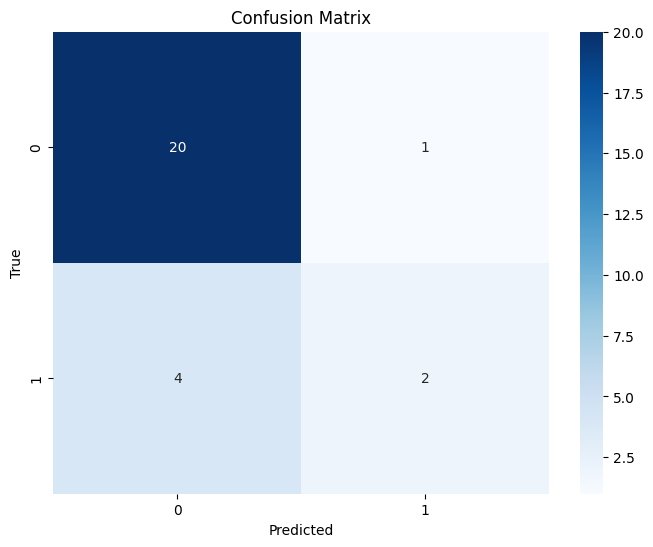

accuracy for class 0: 0.952
accuracy for class 1: 0.333

Evaluating the model on the train set...
auc on train set:  0.8255208333333333
accuracy on train set:  0.9240506329113924
precision on train set:  0.9231706491572464
recall on train set:  0.9240506329113924
f1 score on train set:  0.9193591218907674
balanced accuracy on train set:  0.8255208333333333
logistic loss on train set:  0.6450604092888413
mse on train set:  0.0759493670886076

Scorecard table:
    Feature                           Bin    Points
0       At1              [0.0135, 0.0445[ -0.006626
1       At1              [0.0445, 0.0755[  0.001187
2       At1              [0.0755, 0.0935[  0.008999
3       At1                 [0.0935, 0.1[  0.008999
4       At1                  [0.1, 0.109[  0.001187
..      ...                           ...       ...
354     At7  [0.47150000000000003, 0.482[ -0.006454
355     At7               [0.482, 0.4845[ -0.006454
356     At7              [0.4845, 0.4865[ -0.006454
357     At7      

In [17]:
start_time = time.time()

scorecard = Scorecard()
app_infbins_diff_mm_model, app_caim_1ook_mm_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.0078125})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x17ad3ef10>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x17b5a12d0>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17ad3cc10>}
  fold  1
    score =  0.8125
  fold  2
    score =  0.875
  fold  3
    score =  0.75
  fold  4
    score =  0.875
  fold  5
    score =  0.8
  mean score: 0.8225
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x17ad3ef10>, 'penalty': <skglm.penalties.separable.SCAD object at 0x17ad3f950>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17ad3cc10>}
  fold  1
    score =  0.8125
  fold  2
    score =  0.8125
  fold  3
    score =  0.9375
  fold  4
    score =  1.0
  fold  5
BEYOND_L1 ZeroDivisionError: division by zero
    score =  0.0
  mean score: 0.7125
best parameters:  {'datafit': <skglm.datafits.single_task.Huber object at 0x17ad3ef10>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x17b5a12d0>, 's

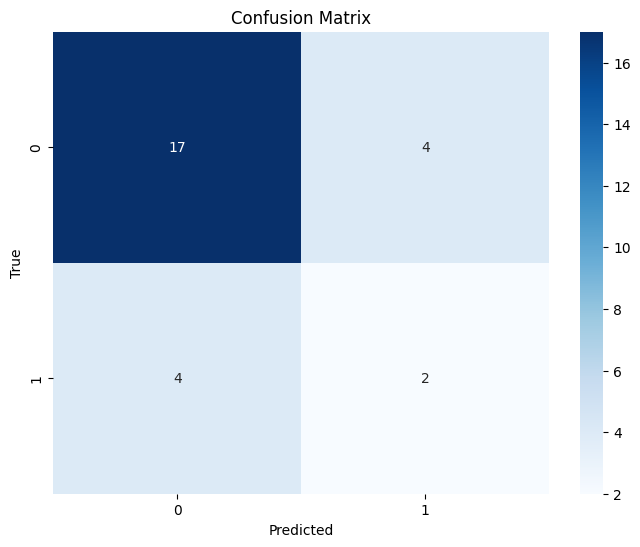

accuracy for class 0: 0.810
accuracy for class 1: 0.333

Evaluating the model on the train set...
auc on train set:  0.9666666666666667
accuracy on train set:  0.9873417721518988
precision on train set:  0.9875365141187926
recall on train set:  0.9873417721518988
f1 score on train set:  0.9871725897428089
balanced accuracy on train set:  0.9666666666666667
logistic loss on train set:  0.6258257007803997
mse on train set:  0.012658227848101266

Scorecard table:
   Feature                            Bin    Points
0      At1                [0.362, 0.3665[  0.069258
1      At1               [0.3845, 0.3935[ -0.902737
2      At2                 [0.741, 0.759[ -0.054418
3      At3                [0.4855, 0.497[ -0.098449
4      At4   [0.33999999999999997, 0.354[ -0.166351
5      At5                 [0.099, 0.103[  0.342829
6      At5  [0.11699999999999999, 0.1235[ -0.408793
7      At5                 [0.28, 0.3035[  0.262595
8      At6  [0.0665, 0.14100000000000001[  1.006351
9      At6     

In [18]:
start_time = time.time()

scorecard = Scorecard()
app_infbins_diff_beyondl1_model, app_caim_1ook_beyondl1_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.0651237964630127 seconds

Evaluating the model on the test set...
test predictions:  [ 0.16306845  0.2104114   0.04481185 -0.17377731  0.40952112  0.31045548
  0.05112201  0.04042469  0.13644401  0.81511201  0.10071265 -0.08136025
  0.33912275 -0.29039019  1.01525264 -0.1140312   0.22789101 -0.15822528
  0.56097018 -0.02756276 -0.11782356  0.00124336 -0.17910444  0.16264124
 -0.03808992  0.07790624  0.05006766]
    True Value  Prediction
0            0           0
1            1           0
2            1           0
3            0           0
4            0           0
5            0           0
6            0           0
7            0           0
8            0           0
9            1           1
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0           0
16           0           0
17           0           0
18           0           1
19           0           0


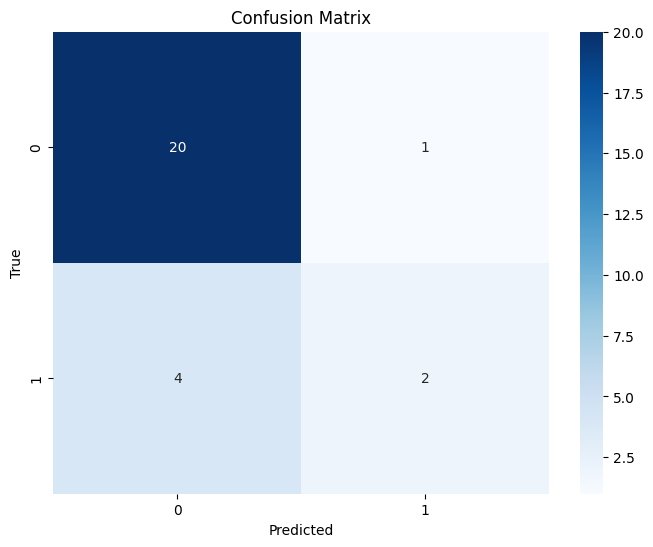

accuracy for class 0: 0.952
accuracy for class 1: 0.333

Evaluating the model on the train set...
auc on train set:  1.0
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.6210170236532891
mse on train set:  0.0

Scorecard table:
    Feature                           Bin    Points
0       At1              [0.0135, 0.0445[ -0.012530
1       At1              [0.0445, 0.0755[ -0.003354
2       At1              [0.0755, 0.0935[  0.062981
3       At1                 [0.0935, 0.1[  0.008311
4       At1                  [0.1, 0.109[ -0.030348
..      ...                           ...       ...
400     At7                [0.65, 0.6905[ -0.028400
401     At7               [0.6905, 0.731[  0.006492
402     At7               [0.731, 0.7825[  0.026706
403     At7  [0.7825, 0.8200000000000001[  0.014390
404     At7     [0.8200000000000001, inf[ -0.014964

[405 rows x 3 col

In [19]:
start_time = time.time()

scorecard = Scorecard()
app_infbins_diff_adaptivelasso_model, app_caim_1ook_adaptivelasso_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-10})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

## mammo
discrimination of benign and malignant mammographic masses based on BI-RADS attributes and the patient's age.

https://archive.ics.uci.edu/dataset/161/mammographic+mass

#### load dataset

In [20]:
# fetch dataset 
mammo_data = fetch_ucirepo(id=161) 
  
# data (as pandas dataframes) 
mammo_X = mammo_data.data.features 
mammo_y = mammo_data.data.targets 

print("num observations: ", mammo_y.count())

# drop rows with nulls
mammo_combined = pd.concat([mammo_X, mammo_y], axis=1)
print("num rows with nulls: ", mammo_combined.isnull().sum().sum())
mammo_combined = mammo_combined.dropna()
mammo_combined = mammo_combined.reset_index(drop=True)
mammo_X = mammo_combined.iloc[:, :-1]
mammo_y = mammo_combined.iloc[:, -1]


# metadata 
# print(mammo_data.metadata) 
  
# variable information 
# print(mammo_data.variables) 

print("num observations without null: ", mammo_y.count())
print("num features: ", len(mammo_X.columns))
print("target distribution: ", mammo_y.value_counts())

mammo_X.describe()

# proportion of positive class
print("Proportion of positive class: ", mammo_y.mean())

num observations:  Severity    961
dtype: int64
num rows with nulls:  162
num observations without null:  830
num features:  5
target distribution:  Severity
0    427
1    403
Name: count, dtype: int64
Proportion of positive class:  0.4855421686746988


In [21]:
categorical_columns = mammo_X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    mammo_X[col] = mammo_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {mammo_X[col].unique()}")

Categorical columns:  []


#### CAIM & 1ook

Execution time: 0.015062093734741211 seconds

Evaluating the model on the test set...
test predictions:  [0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1
 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0
 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0
 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0]
     True Value  Prediction
0             0           0
1             0           0
2             0           1
3             0           0
4             0           0
..          ...         ...
203           1           1
204           0           0
205           1           1
206           1           1
207           0           0

[208 rows x 2 columns]
auc:  0.8475767665556788
accuracy:  0.8461538461538461
precision:  0.8549616108938143
recall:  0.846153846153846

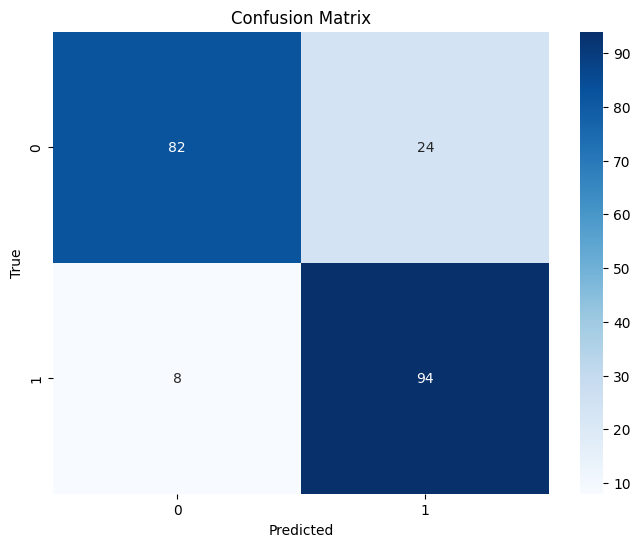

accuracy for class 0: 0.774
accuracy for class 1: 0.922

Evaluating the model on the train set...
auc on train set:  0.8037538423324122
accuracy on train set:  0.8022508038585209
precision on train set:  0.8063510238365713
recall on train set:  0.8022508038585209
f1 score on train set:  0.8020314319563586
balanced accuracy on train set:  0.8037538423324122
logistic loss on train set:  0.536795594999365
mse on train set:  0.1977491961414791

Scorecard table:
    Feature           Bin    Points
0   BI-RADS    [0.0, 4.0[ -0.842863
1   BI-RADS   [4.0, 55.0[  0.121354
2   BI-RADS   [55.0, inf[  0.062117
3       Age  [19.0, 57.0[ -0.878301
4       Age  [57.0, 96.0[  0.127132
5       Age   [96.0, inf[  0.091775
6     Shape    [1.0, 2.0[ -0.068031
7     Shape    [2.0, 4.0[ -0.177090
8     Shape    [4.0, inf[  0.918917
9    Margin    [1.0, 2.0[ -1.527545
10   Margin    [2.0, 5.0[  0.130775
11   Margin    [5.0, inf[  0.737366
12  Density    [1.0, 2.0[  0.943802
13  Density    [2.0, 4.0[ -0.09527

In [22]:
start_time = time.time()

scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 1/0.9, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'})
                
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.022403955459594727 seconds

Evaluating the model on the test set...
test predictions:  [0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1
 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0
 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0
 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0]
     True Value  Prediction
0             0           0
1             0           0
2             0           1
3             0           0
4             0           0
..          ...         ...
203           1           1
204           0           0
205           1           1
206           1           1
207           0           0

[208 rows x 2 columns]
auc:  0.8477617462079171
accuracy:  0.8461538461538461
precision:  0.857298951048951
recall:  0.8461538461538461

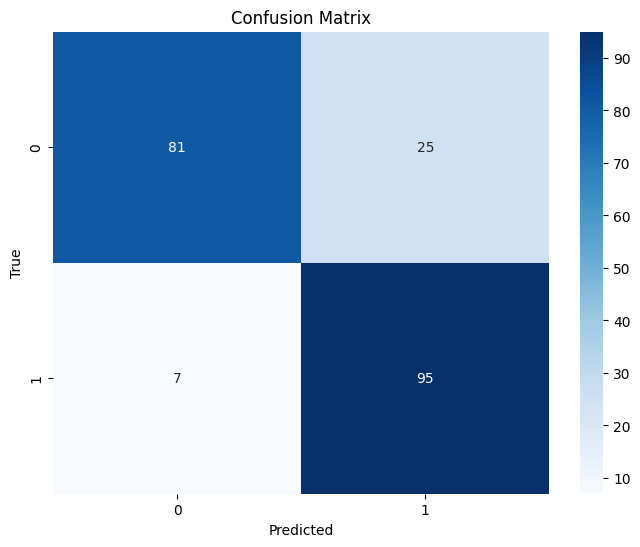

accuracy for class 0: 0.764
accuracy for class 1: 0.931

Evaluating the model on the train set...
auc on train set:  0.7974198155680443
accuracy on train set:  0.7958199356913184
precision on train set:  0.8003346131360601
recall on train set:  0.7958199356913184
f1 score on train set:  0.7955427029519743
balanced accuracy on train set:  0.7974198155680442
logistic loss on train set:  0.537406343380461
mse on train set:  0.20418006430868169

Scorecard table:
    Feature           Bin    Points
0   BI-RADS    [0.0, 4.0[ -0.015625
1   BI-RADS   [4.0, 55.0[  0.011719
2   BI-RADS   [55.0, inf[  0.003906
3       Age  [19.0, 57.0[ -0.279731
4       Age  [57.0, 96.0[  0.275825
5       Age   [96.0, inf[  0.003906
6     Shape    [1.0, 2.0[ -0.237522
7     Shape    [2.0, 4.0[ -0.237522
8     Shape    [4.0, inf[  0.475043
9    Margin    [1.0, 2.0[ -0.482856
10   Margin    [2.0, 5.0[  0.248481
11   Margin    [5.0, inf[  0.234375
12  Density    [1.0, 2.0[  0.003906
13  Density    [2.0, 4.0[ -0.0019

In [23]:
start_time = time.time()

scorecard = Scorecard()
mammo_caim_1ook_mm_model, mammo_caim_1ook_mm_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params={'C': 0.00390625})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.016766071319580078 seconds

Evaluating the model on the test set...
test predictions:  [0.27477923 0.06813987 0.73538093 0.06813987 0.09138719 0.57056492
 0.73538093 0.09138719 0.09138719 0.80445645 0.73538093 0.91877297
 0.73538093 0.57056492 0.91877297 0.09138719 0.91877297 0.4104202
 0.25153191 0.80445645 0.57056492 0.80445645 0.38717288 0.09138719
 0.80445645 0.38717288 0.09138719 0.3020314  0.25153191 0.91877297
 0.09138719 0.80445645 0.62106441 0.80445645 0.06813987 0.80445645
 0.80445645 0.62106441 0.38717288 0.09138719 0.3020314  0.59381224
 0.25153191 0.80445645 0.06813987 0.25153191 0.80445645 0.06813987
 0.57056492 0.25153191 0.57056492 0.57056492 0.73538093 0.73538093
 0.80445645 0.62106441 0.62106441 0.80445645 0.27477923 0.06813987
 0.73538093 0.09138719 0.59381224 0.57056492 0.62106441 0.62106441
 0.57056492 0.27477923 0.09138719 0.06813987 0.62106441 0.57056492
 0.91877297 0.06813987 0.80445645 0.91877297 0.06813987 0.06813987
 0.06813987 0.25153191 0.

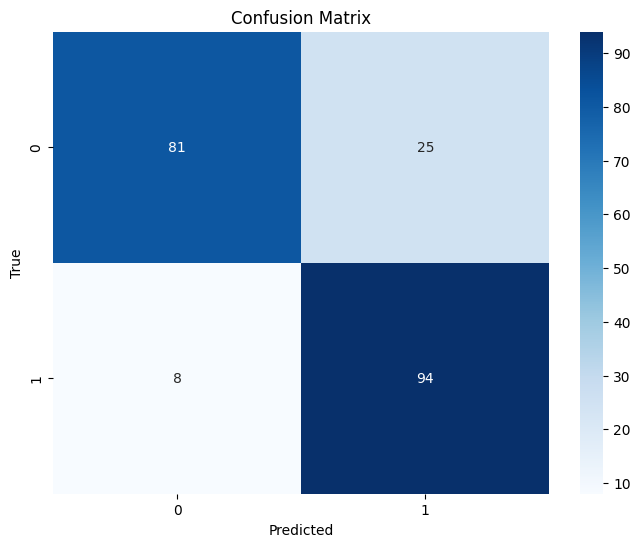

accuracy for class 0: 0.764
accuracy for class 1: 0.922

Evaluating the model on the train set...
auc on train set:  0.800742074704257
accuracy on train set:  0.7990353697749196
precision on train set:  0.8040747098699811
recall on train set:  0.7990353697749196
f1 score on train set:  0.798708395157008
balanced accuracy on train set:  0.8007420747042568
logistic loss on train set:  0.5361848466182689
mse on train set:  0.20096463022508038

Scorecard table:
  Feature           Bin    Points
0     Age  [19.0, 57.0[ -0.183392
1   Shape    [1.0, 2.0[  0.427461
2   Shape    [2.0, 4.0[  0.404214
3   Shape    [4.0, inf[  0.638105
4  Margin    [1.0, 2.0[ -0.131344
5  Margin    [2.0, 5.0[  0.187689
6  Margin    [5.0, inf[  0.302006


In [24]:
start_time = time.time()

scorecard = Scorecard()
mammo_caim_1ook_beyondl1_model, mammo_caim_1ook_beyondl1_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()}
                )
                
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.02730703353881836 seconds

Evaluating the model on the test set...
test predictions:  [ 0.27154989  0.07430542  0.7421555   0.07430542  0.0927349   0.57271217
  0.7421555   0.0927349   0.0927349   0.80490649  0.7421555   0.92097049
  0.7421555   0.57271217  0.92097049  0.0927349   0.92097049  0.41232665
  0.25312042  0.80490649  0.57271217  0.80490649  0.30849583 -0.07311412
  0.80490649  0.39389717  0.0927349   0.58929759  0.25312042  0.92097049
  0.0927349   0.80490649  0.6260915   0.80490649  0.07430542  0.80490649
  0.71950515  0.6260915   0.39389717  0.0927349   0.30649974  0.59114165
  0.25312042  0.80490649 -0.0915436   0.25312042  0.80490649  0.07430542
  0.57271217  0.25312042  0.57271217  0.57271217  0.7421555   0.7421555
  0.80490649  0.6260915   0.6260915   0.80490649  0.27154989  0.07430542
  0.7421555   0.0927349   0.59114165  0.57271217  0.6260915   0.6260915
  0.57271217  0.27154989  0.0927349   0.07430542  0.6260915   0.85551002
  0.92097049  0.074305

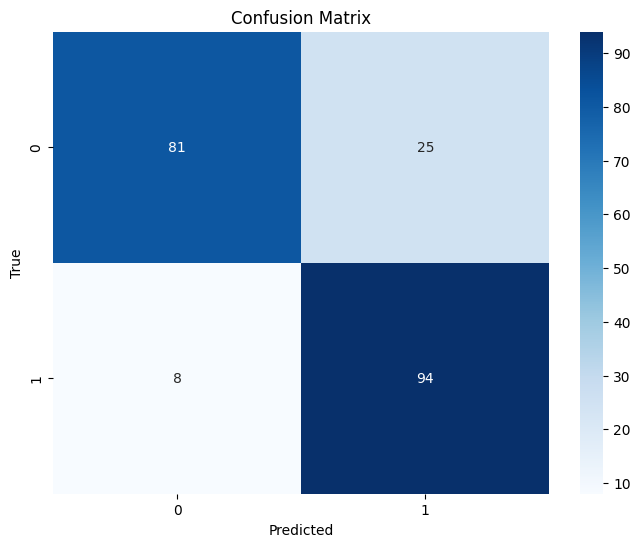

accuracy for class 0: 0.764
accuracy for class 1: 0.922

Evaluating the model on the train set...
auc on train set:  0.803960836671117
accuracy on train set:  0.8022508038585209
precision on train set:  0.8073236073531316
recall on train set:  0.8022508038585209
f1 score on train set:  0.8019290608344958
balanced accuracy on train set:  0.8039608366711171
logistic loss on train set:  0.535574098237173
mse on train set:  0.1977491961414791

Scorecard table:
    Feature           Bin    Points
0   BI-RADS    [0.0, 4.0[ -0.073925
1   BI-RADS   [4.0, 55.0[  0.091924
2   BI-RADS   [55.0, inf[  0.465833
3       Age  [19.0, 57.0[ -0.100362
4       Age  [57.0, 96.0[  0.078453
5       Age   [96.0, inf[  0.505741
6     Shape    [1.0, 2.0[  0.096166
7     Shape    [2.0, 4.0[  0.077736
8     Shape    [4.0, inf[  0.309930
9    Margin    [1.0, 2.0[ -0.090472
10   Margin    [2.0, 5.0[  0.229120
11   Margin    [5.0, inf[  0.345184
12  Density    [1.0, 2.0[  0.378276
13  Density    [2.0, 4.0[  0.095479

In [25]:
start_time = time.time()

scorecard = Scorecard()
mammo_caim_1ook_adaptivelasso_model, mammo_caim_1ook_adaptivelasso_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-10}
                )
                
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

Execution time: 0.012971162796020508 seconds

Evaluating the model on the test set...
test predictions:  [0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1
 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0
 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0
 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0]
     True Value  Prediction
0             0           0
1             0           0
2             0           1
3             0           0
4             0           0
..          ...         ...
203           1           1
204           0           0
205           1           1
206           1           1
207           0           0

[208 rows x 2 columns]
auc:  0.8475767665556788
accuracy:  0.8461538461538461
precision:  0.8549616108938143
recall:  0.846153846153846

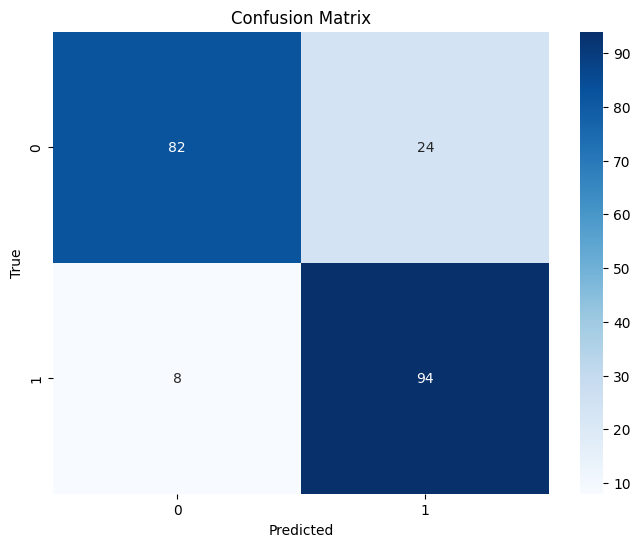

accuracy for class 0: 0.774
accuracy for class 1: 0.922

Evaluating the model on the train set...
auc on train set:  0.8037538423324122
accuracy on train set:  0.8022508038585209
precision on train set:  0.8063510238365713
recall on train set:  0.8022508038585209
f1 score on train set:  0.8020314319563586
balanced accuracy on train set:  0.8037538423324122
logistic loss on train set:  0.536795594999365
mse on train set:  0.1977491961414791

Scorecard table:
   Feature           Bin    Points
0  BI-RADS   [4.0, 55.0[  0.913630
1      Age  [57.0, 96.0[  0.999898
2    Shape    [4.0, inf[  1.065034
3   Margin    [2.0, 5.0[  1.626252
4   Margin    [5.0, inf[  0.599721
5  Density    [2.0, 4.0[ -0.996401


In [26]:
start_time = time.time()

scorecard = Scorecard()
mammo_caim_diff_ml_model, mammo_caim_diff_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 1/0.99, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}
                )
                
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.01611018180847168 seconds

Evaluating the model on the test set...
test predictions:  [0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1
 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0
 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0
 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0]
     True Value  Prediction
0             0           0
1             0           0
2             0           1
3             0           0
4             0           0
..          ...         ...
203           1           1
204           0           0
205           1           1
206           1           1
207           0           0

[208 rows x 2 columns]
auc:  0.8477617462079171
accuracy:  0.8461538461538461
precision:  0.857298951048951
recall:  0.8461538461538461


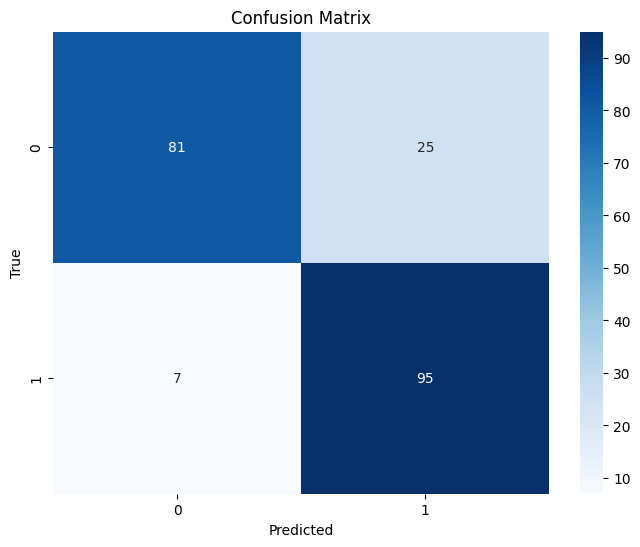

accuracy for class 0: 0.764
accuracy for class 1: 0.931

Evaluating the model on the train set...
auc on train set:  0.800742074704257
accuracy on train set:  0.7990353697749196
precision on train set:  0.8040747098699811
recall on train set:  0.7990353697749196
f1 score on train set:  0.798708395157008
balanced accuracy on train set:  0.8007420747042568
logistic loss on train set:  0.5361848466182689
mse on train set:  0.20096463022508038

Scorecard table:
   Feature           Bin    Points
0  BI-RADS   [4.0, 55.0[  0.085938
1  BI-RADS   [55.0, inf[  0.007812
2      Age  [57.0, 96.0[  0.367188
3      Age   [96.0, inf[  0.007812
4    Shape    [2.0, 4.0[  0.101562
5    Shape    [4.0, inf[  0.757812
6   Margin    [2.0, 5.0[  0.773438
7   Margin    [5.0, inf[  0.125000
8  Density    [2.0, 4.0[ -0.007812


In [27]:
start_time = time.time()

scorecard = Scorecard()
mammo_caim_diff_mm_model, mammo_caim_diff_mm_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.0078125}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.008377790451049805 seconds

Evaluating the model on the test set...
test predictions:  [ 0.27084009  0.09103604  0.74247508  0.09103604  0.09103604  0.5786165
  0.74247508  0.09103604  0.09103604  0.80976647  0.74247508  0.92227913
  0.74247508  0.5786165   0.92227913  0.09103604  0.92227913  0.39881244
  0.27084009  0.80976647  0.5786165   0.80976647  0.39881244 -0.08291851
  0.80976647  0.39881244  0.09103604  0.32218601  0.27084009  0.92227913
  0.09103604  0.80976647  0.62996242  0.80976647  0.09103604  0.80976647
  0.80976647  0.62996242  0.39881244  0.09103604  0.32218601  0.5786165
  0.27084009  0.80976647 -0.08291851  0.27084009  0.80976647  0.09103604
  0.5786165   0.27084009  0.5786165   0.5786165   0.74247508  0.74247508
  0.80976647  0.62996242  0.62996242  0.80976647  0.27084009  0.09103604
  0.74247508  0.09103604  0.5786165   0.5786165   0.62996242  0.62996242
  0.5786165   0.27084009  0.09103604  0.09103604  0.62996242  0.5786165
  0.92227913  0.091036

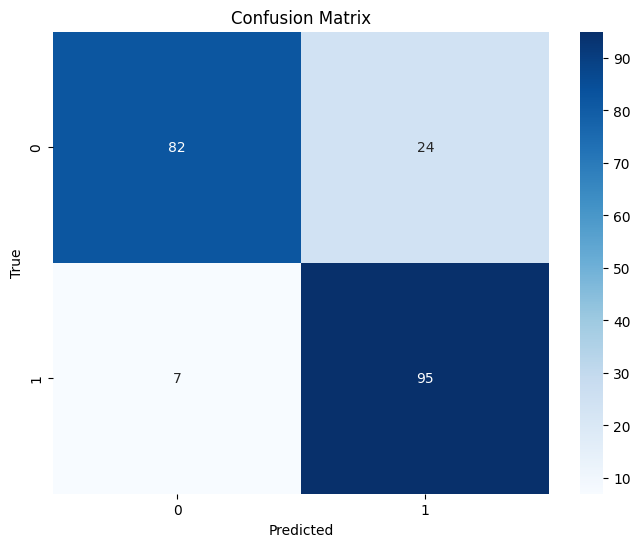

accuracy for class 0: 0.774
accuracy for class 1: 0.931

Evaluating the model on the train set...
auc on train set:  0.8021962099336583
accuracy on train set:  0.8006430868167203
precision on train set:  0.8049628617279736
recall on train set:  0.8006430868167203
f1 score on train set:  0.8003976851216192
balanced accuracy on train set:  0.8021962099336584
logistic loss on train set:  0.536795594999365
mse on train set:  0.19935691318327975

Scorecard table:
   Feature           Bin    Points
0  BI-RADS   [4.0, 55.0[  0.173955
1      Age  [57.0, 96.0[  0.179804
2    Shape    [4.0, inf[  0.231150
3   Margin    [2.0, 5.0[  0.307776
4   Margin    [5.0, inf[  0.112513


In [28]:
start_time = time.time()

scorecard = Scorecard()
mammo_caim_diff_beyondl1_model, mammo_caim_diff_beyondl1_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.03159904479980469 seconds

Evaluating the model on the test set...
test predictions:  [0.20066339 0.04239734 0.64344777 0.04239734 0.04239734 0.62906249
 0.64344777 0.04239734 0.04239734 0.80171382 0.64344777 0.80171382
 0.64344777 0.62906249 0.80171382 0.04239734 0.80171382 0.47079644
 0.20066339 0.80171382 0.62906249 0.80171382 0.47079644 0.
 0.80171382 0.47079644 0.04239734 0.21504867 0.20066339 0.80171382
 0.04239734 0.80171382 0.64344777 0.80171382 0.04239734 0.80171382
 0.80171382 0.64344777 0.47079644 0.04239734 0.21504867 0.62906249
 0.20066339 0.80171382 0.         0.20066339 0.80171382 0.04239734
 0.62906249 0.20066339 0.62906249 0.62906249 0.64344777 0.64344777
 0.80171382 0.64344777 0.64344777 0.80171382 0.20066339 0.04239734
 0.64344777 0.04239734 0.62906249 0.62906249 0.64344777 0.64344777
 0.62906249 0.20066339 0.04239734 0.04239734 0.64344777 0.62906249
 0.80171382 0.04239734 0.80171382 0.80171382 0.04239734 0.04239734
 0.04239734 0.20066339 0.80171382

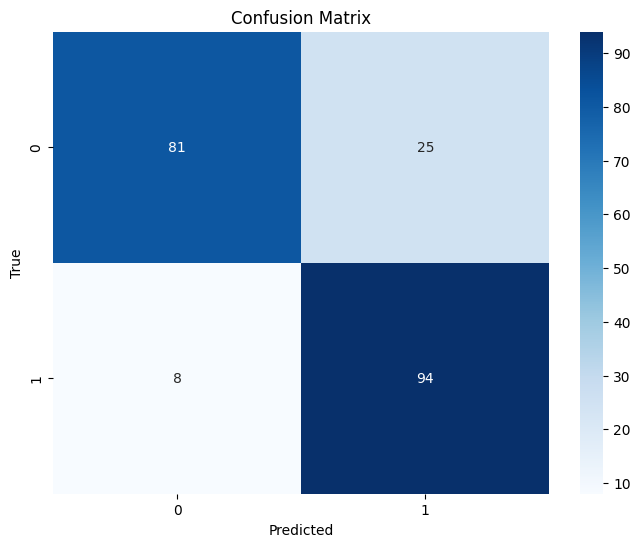

accuracy for class 0: 0.764
accuracy for class 1: 0.922

Evaluating the model on the train set...
auc on train set:  0.7989774479667981
accuracy on train set:  0.797427652733119
precision on train set:  0.801720137673888
recall on train set:  0.797427652733119
f1 score on train set:  0.7971782929461615
balanced accuracy on train set:  0.7989774479667981
logistic loss on train set:  0.537406343380461
mse on train set:  0.20257234726688103

Scorecard table:
   Feature           Bin    Points
0  BI-RADS   [4.0, 55.0[  0.042397
1      Age  [57.0, 96.0[  0.158266
2    Shape    [4.0, inf[  0.172651
3   Margin    [2.0, 5.0[  0.428399


In [29]:
start_time = time.time()

scorecard = Scorecard()
mammo_caim_diff_adaptivelasso_model, mammo_caim_diff_adaptivelasso_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 0.04641588833612782})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

Execution time: 0.04139304161071777 seconds

Evaluating the model on the test set...
test predictions:  [0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0
 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1
 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0
 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0]
     True Value  Prediction
0             0           0
1             0           0
2             0           1
3             0           0
4             0           0
..          ...         ...
203           1           1
204           0           0
205           1           1
206           1           1
207           0           0

[208 rows x 2 columns]
auc:  0.8453570107288199
accuracy:  0.8461538461538461
precision:  0.847991500847044
recall:  0.8461538461538461


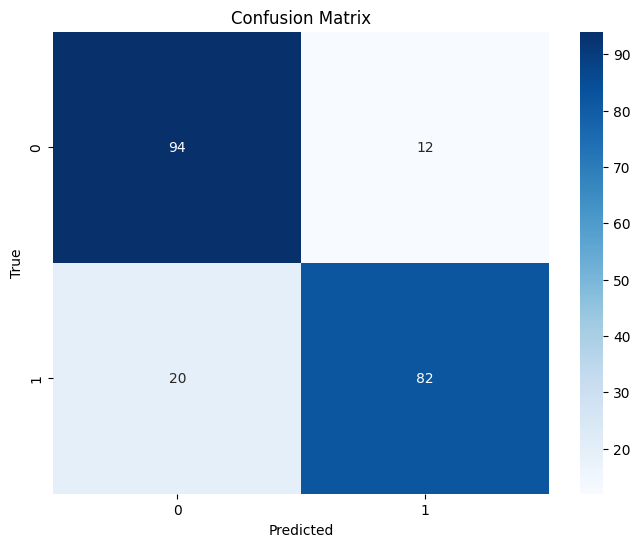

accuracy for class 0: 0.887
accuracy for class 1: 0.804

Evaluating the model on the train set...
auc on train set:  0.8561958580432825
accuracy on train set:  0.8569131832797428
precision on train set:  0.8571982574938852
recall on train set:  0.8569131832797428
f1 score on train set:  0.8567867523479206
balanced accuracy on train set:  0.8561958580432825
logistic loss on train set:  0.5398493369048452
mse on train set:  0.14308681672025725

Scorecard table:
    Feature          Bin    Points
0   BI-RADS   [1.0, 2.5[ -1.326109
1   BI-RADS   [2.5, 3.5[ -0.744159
2   BI-RADS   [3.5, 4.5[ -0.643680
3   BI-RADS   [4.5, 5.5[  2.160282
4   BI-RADS  [5.5, 30.5[  0.732713
..      ...          ...       ...
69   Margin   [2.5, 3.5[  0.494283
70   Margin   [3.5, 4.5[  0.933623
71   Margin   [4.5, inf[  0.919966
72  Density   [1.5, 2.5[ -0.766786
73  Density   [3.5, inf[ -1.218053

[74 rows x 3 columns]


In [30]:
start_time = time.time()

scorecard = Scorecard()
mammo_infbins_1ook_ml_model, mammo_infbins_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 2.5, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.014693737030029297 seconds

Evaluating the model on the test set...
test predictions:  [0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1
 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0
 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0]
     True Value  Prediction
0             0           0
1             0           0
2             0           1
3             0           0
4             0           0
..          ...         ...
203           1           1
204           0           0
205           1           1
206           1           1
207           0           0

[208 rows x 2 columns]
auc:  0.8400850906400296
accuracy:  0.8413461538461539
precision:  0.8464035138688146
recall:  0.841346153846153

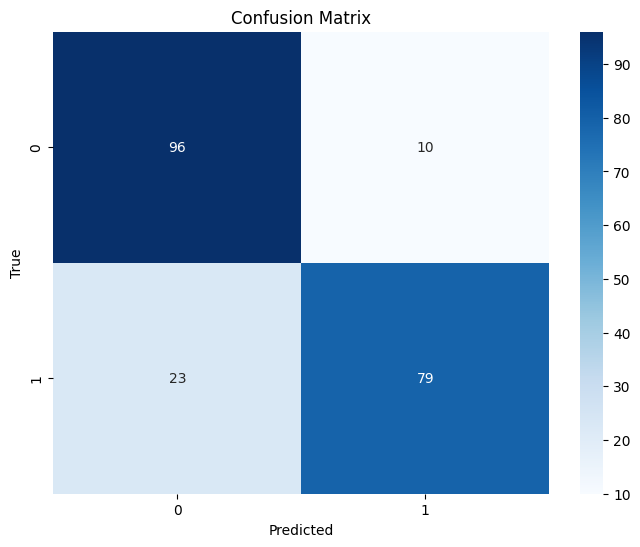

accuracy for class 0: 0.906
accuracy for class 1: 0.775

Evaluating the model on the train set...
auc on train set:  0.8329452189482617
accuracy on train set:  0.8360128617363344
precision on train set:  0.8464270179316195
recall on train set:  0.8360128617363344
f1 score on train set:  0.8341815455203271
balanced accuracy on train set:  0.8329452189482618
logistic loss on train set:  0.5575610399566295
mse on train set:  0.1639871382636656

Scorecard table:
    Feature          Bin    Points
0   BI-RADS   [1.0, 2.5[ -0.650710
1   BI-RADS   [2.5, 3.5[ -0.669523
2   BI-RADS   [3.5, 4.5[ -0.679185
3   BI-RADS   [4.5, 5.5[  1.292613
4   BI-RADS  [5.5, 30.5[  0.456805
..      ...          ...       ...
70   Margin   [3.5, 4.5[  0.036893
71   Margin   [4.5, inf[  0.063531
72  Density   [1.5, 2.5[ -0.061120
73  Density   [2.5, 3.5[ -0.040652
74  Density   [3.5, inf[ -0.061933

[75 rows x 3 columns]


In [31]:
start_time = time.time()

scorecard = Scorecard()
mammo_infbins_1ook_mm_model, mammo_infbins_1ook_mm_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params={'C': 0.25}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.007009029388427734 seconds

Evaluating the model on the test set...
test predictions:  [0.1308895  0.1308895  0.92388465 0.1308895  0.1308895  0.83763264
 0.41944916 0.06361923 0.1308895  0.48363493 0.41944916 0.92388465
 0.92388465 0.19507526 0.92388465 0.1308895  0.92388465 0.19507526
 0.1308895  0.92388465 0.33319715 0.98807041 0.83454814 0.1308895
 0.92388465 0.39738292 0.1308895  0.3521789  0.1308895  0.41944916
 0.1308895  0.92388465 0.41944916 0.92388465 0.1308895  0.92388465
 0.85661439 0.48363493 0.9018184  0.1308895  0.41944916 0.19507526
 0.1308895  0.92388465 0.1308895  0.06361923 0.48363493 0.1308895
 0.9018184  0.83763264 0.69951075 0.33319715 0.92388465 0.92388465
 0.98807041 0.98807041 0.92388465 0.92388465 0.1308895  0.1308895
 0.41944916 0.1308895  0.19507526 0.39738292 0.92080015 0.41944916
 0.9018184  0.1308895  0.1308895  0.1308895  0.48363493 0.63224048
 0.92388465 0.06361923 0.98807041 0.41944916 0.06361923 0.1308895
 0.06361923 0.06361923 0.419

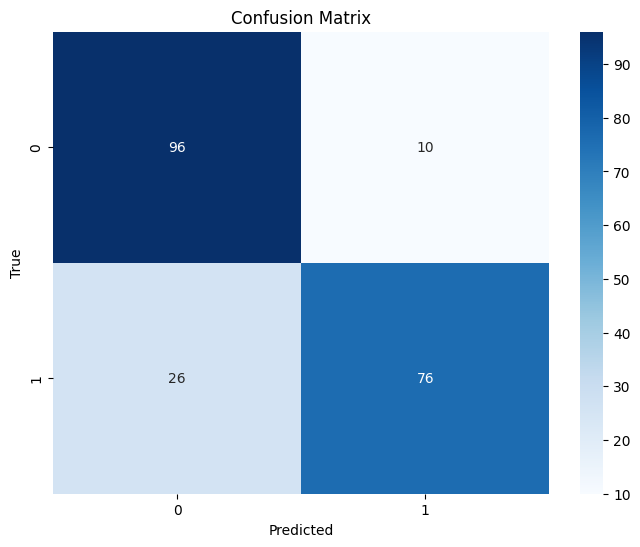

accuracy for class 0: 0.906
accuracy for class 1: 0.745

Evaluating the model on the train set...
auc on train set:  0.8144657993603874
accuracy on train set:  0.8183279742765274
precision on train set:  0.8346955894059007
recall on train set:  0.8183279742765274
f1 score on train set:  0.8152276740723574
balanced accuracy on train set:  0.8144657993603874
logistic loss on train set:  0.5655007689108777
mse on train set:  0.18167202572347266

Scorecard table:
   Feature         Bin    Points
0  BI-RADS  [4.5, 5.5[  0.504435
1    Shape  [2.5, 3.5[  0.202308
2    Shape  [3.5, inf[  0.288560
3   Margin  [3.5, 4.5[  0.064186
4  Density  [2.5, 3.5[  0.067270


In [32]:
start_time = time.time()

scorecard = Scorecard()
mammo_infbins_1ook_beyondl1_model, mammo_infbins_1ook_beyondl1_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.03450489044189453 seconds

Evaluating the model on the test set...
test predictions:  [ 0.19489546  0.04892845  0.84416723  0.04893215  0.03819499  1.23400604
  0.31401498 -0.09373622 -0.02231707  0.42083381  0.42436242  1.04884845
  0.9170795   0.25247991  0.97592636  0.06343054  0.83429918  0.24284844
  0.14301372  0.85087036  0.36172017  1.26181504  0.5004685   0.07608572
  0.74500884  0.29945166  0.14210978  0.23368409  0.26347364  0.67626892
  0.03819499  1.04999118  0.48140703  1.05839653  0.06092105  0.88663602
  0.82414188  0.42416454  0.82960392  0.20338557  0.21728604  0.38447153
  0.04892437  1.17272259 -0.06114881  0.00313843  0.38356022  0.04893213
  0.9821302   1.0936392   0.94069828  0.56016453  0.84416723  0.88737502
  0.81251286  0.84396934  0.68773723  0.74636785  0.10150546  0.163276
  0.48563821  0.10103062  0.24420337  0.4625848   0.69724584  0.282004
  1.09468676  0.19489546 -0.00808327  0.04892845  0.246576    0.82377628
  0.99985022 -0.00932534

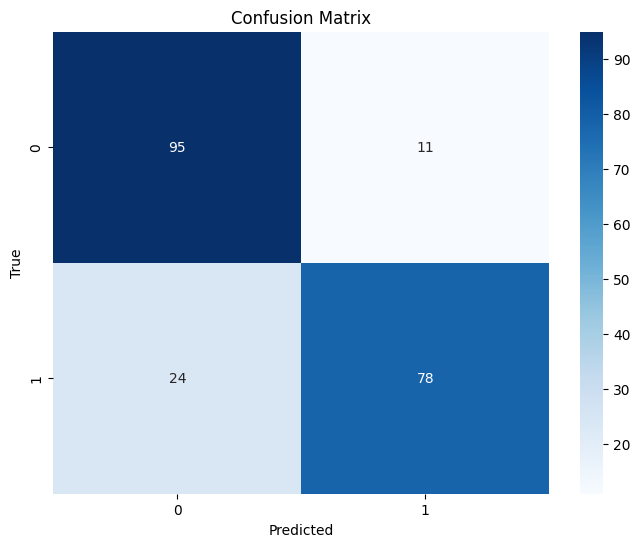

accuracy for class 0: 0.896
accuracy for class 1: 0.765

Evaluating the model on the train set...
auc on train set:  0.8584831454859709
accuracy on train set:  0.860128617363344
precision on train set:  0.8628839268826503
recall on train set:  0.860128617363344
f1 score on train set:  0.8596116706199854
balanced accuracy on train set:  0.8584831454859709
logistic loss on train set:  0.5447353239536132
mse on train set:  0.13987138263665594

Scorecard table:
    Feature          Bin    Points
0   BI-RADS   [1.0, 2.5[ -0.016479
1   BI-RADS   [2.5, 3.5[  0.092487
2   BI-RADS   [3.5, 4.5[  0.105443
3   BI-RADS   [4.5, 5.5[  0.568456
4   BI-RADS  [5.5, 30.5[  0.417080
..      ...          ...       ...
78   Margin   [3.5, 4.5[  0.153810
79   Margin   [4.5, inf[  0.154008
80  Density   [1.5, 2.5[ -0.074659
81  Density   [2.5, 3.5[ -0.016402
82  Density   [3.5, inf[ -0.278397

[83 rows x 3 columns]


In [33]:
start_time = time.time()

scorecard = Scorecard()
mammo_infbins_1ook_adaptivelasso_model, mammo_infbins_1ook_adaptivelasso_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 0.00046415888336127724})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

Execution time: 0.025387048721313477 seconds

Evaluating the model on the test set...
test predictions:  [0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1
 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0
 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0]
     True Value  Prediction
0             0           0
1             0           0
2             0           1
3             0           0
4             0           0
..          ...         ...
203           1           1
204           0           0
205           1           1
206           1           1
207           0           0

[208 rows x 2 columns]
auc:  0.8451720310765816
accuracy:  0.8461538461538461
precision:  0.8491090992965056
recall:  0.846153846153846

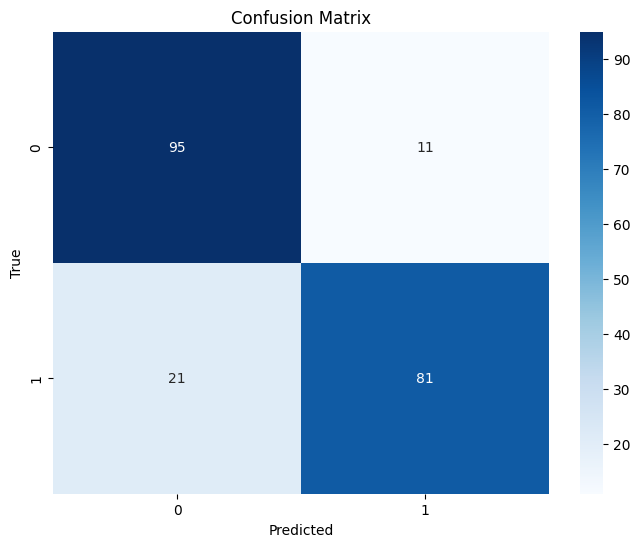

accuracy for class 0: 0.896
accuracy for class 1: 0.794

Evaluating the model on the train set...
auc on train set:  0.8475797186946936
accuracy on train set:  0.8488745980707395
precision on train set:  0.8502916510299943
recall on train set:  0.8488745980707395
f1 score on train set:  0.8485120101205353
balanced accuracy on train set:  0.8475797186946936
logistic loss on train set:  0.5447353239536132
mse on train set:  0.15112540192926044

Scorecard table:
    Feature           Bin    Points
0   BI-RADS    [1.0, 2.5[ -0.270087
1   BI-RADS    [4.5, 5.5[  2.581191
2       Age  [35.5, 36.5[  0.267931
3       Age  [38.5, 39.5[  0.289170
4       Age  [41.5, 42.5[  0.159597
5       Age  [43.5, 44.5[ -0.190235
6       Age  [47.5, 48.5[  0.001700
7       Age  [49.5, 50.5[  0.212455
8       Age  [55.5, 56.5[  0.117854
9       Age  [57.5, 58.5[  0.139491
10      Age  [66.5, 67.5[  0.508031
11      Age  [67.5, 68.5[  0.854569
12      Age  [69.5, 70.5[  0.277119
13      Age  [71.5, 72.5[ -0.558

In [34]:
start_time = time.time()

scorecard = Scorecard()
mammo_infbins_diff_ml_model, mammo_infbins_diff_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 1/0.99, 'penalty': 'l1', 'solver': 'liblinear'}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.02018117904663086 seconds

Evaluating the model on the test set...
test predictions:  [0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1
 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0
 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0]
     True Value  Prediction
0             0           0
1             0           0
2             0           1
3             0           0
4             0           0
..          ...         ...
203           1           1
204           0           0
205           1           1
206           1           1
207           0           0

[208 rows x 2 columns]
auc:  0.8263041065482797
accuracy:  0.8269230769230769
precision:  0.8278245192307693
recall:  0.8269230769230769

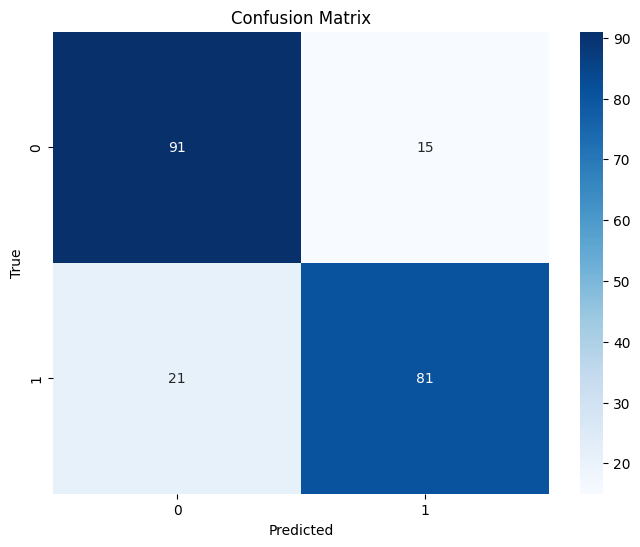

accuracy for class 0: 0.858
accuracy for class 1: 0.794

Evaluating the model on the train set...
auc on train set:  0.8397915567009242
accuracy on train set:  0.8408360128617364
precision on train set:  0.8415802804038599
recall on train set:  0.8408360128617364
f1 score on train set:  0.8405763234906095
balanced accuracy on train set:  0.8397915567009242
logistic loss on train set:  0.5447353239536132
mse on train set:  0.15916398713826366

Scorecard table:
    Feature          Bin    Points
0   BI-RADS   [1.0, 2.5[ -0.103451
1   BI-RADS   [2.5, 3.5[  0.021549
2   BI-RADS   [3.5, 4.5[  0.127778
3   BI-RADS   [4.5, 5.5[  1.583469
4   BI-RADS  [30.5, inf[  0.062500
..      ...          ...       ...
76   Margin   [3.5, 4.5[  0.094250
77   Margin   [4.5, inf[  0.086610
78  Density   [1.5, 2.5[ -0.096523
79  Density   [2.5, 3.5[  0.076260
80  Density   [3.5, inf[ -0.054200

[81 rows x 3 columns]


In [35]:
start_time = time.time()
scorecard = Scorecard()

mammo_infbins_diff_mm_model, mammo_infbins_diff_mm_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.0625}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.012059926986694336 seconds

Evaluating the model on the test set...
test predictions:  [0.14816957 0.07468866 0.82790993 0.00662344 0.07468866 1.07242711
 0.36905502 0.07468866 0.07468866 0.44253593 0.36905502 1.06751641
 0.82790993 0.27534431 0.90139084 0.07468866 0.90139084 0.20186339
 0.14816957 0.90139084 0.39769142 1.06751641 0.78306542 0.07468866
 0.90139084 0.32421051 0.07468866 0.24188029 0.31429514 0.6086615
 0.07468866 1.06751641 0.36905502 1.06751641 0.07468866 0.90139084
 1.06751641 0.36905502 0.78306542 0.07468866 0.24188029 0.27534431
 0.14816957 1.06751641 0.00662344 0.07468866 0.36905502 0.00662344
 0.85654633 0.89549716 0.90032478 0.6135722  0.82790993 0.82790993
 1.06751641 0.82790993 0.82790993 0.90139084 0.07468866 0.07468866
 0.36905502 0.07468866 0.27534431 0.39769142 0.75984471 0.36905502
 1.0226719  0.14816957 0.00662344 0.07468866 0.36905502 0.73419921
 1.06751641 0.07468866 0.90139084 0.44253593 0.07468866 0.07468866
 0.07468866 0.31429514 0.

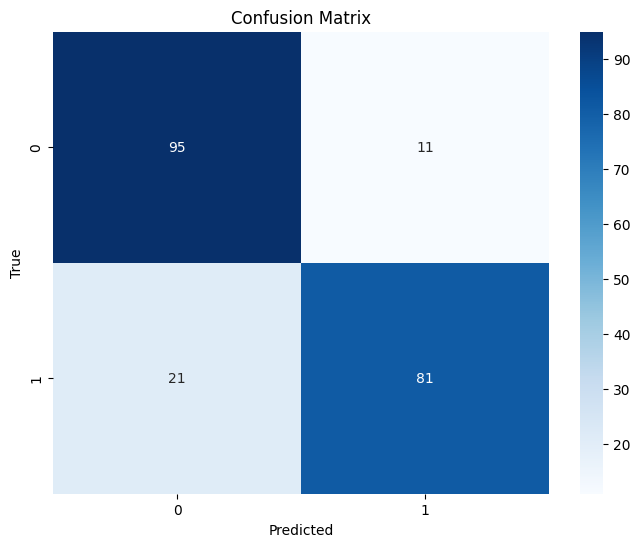

accuracy for class 0: 0.896
accuracy for class 1: 0.794

Evaluating the model on the train set...
auc on train set:  0.848516368077333
accuracy on train set:  0.8504823151125402
precision on train set:  0.8544635777456212
recall on train set:  0.8504823151125402
f1 score on train set:  0.8497325045221715
balanced accuracy on train set:  0.8485163680773331
logistic loss on train set:  0.5483998142401894
mse on train set:  0.1495176848874598

Scorecard table:
   Feature           Bin    Points
0  BI-RADS    [4.5, 5.5[  0.458855
1      Age  [31.5, 32.5[  0.068065
2      Age  [57.5, 58.5[  0.073481
3      Age  [67.5, 68.5[  0.166126
4    Shape    [2.5, 3.5[  0.122347
5    Shape    [3.5, inf[  0.044845
6   Margin    [1.5, 2.5[  0.176930
7   Margin    [2.5, 3.5[ -0.049755


In [36]:
start_time = time.time()

scorecard = Scorecard()
mammo_infbins_diff_beyondl1_model, mammo_infbins_diff_beyondl1_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': SCAD(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()      

Execution time: 0.15030884742736816 seconds

Evaluating the model on the test set...
test predictions:  [1.24524459e-01 8.94459459e-02 8.61497399e-01 0.00000000e+00
 8.94459459e-02 1.01309578e+00 4.04688883e-01 8.94459459e-02
 0.00000000e+00 4.23142518e-01 4.04688883e-01 1.06828125e+00
 8.44872520e-01 2.90279470e-01 9.82244935e-01 8.94459459e-02
 8.79951034e-01 2.55200957e-01 1.24524459e-01 8.24765559e-01
 3.67957043e-01 1.06828125e+00 8.61497399e-01 1.48189405e-15
 8.24765559e-01 4.04688883e-01 1.06070824e-01 2.22308993e-01
 3.12854679e-01 6.11472737e-01 8.94459459e-02 1.01309578e+00
 3.32878530e-01 1.01309578e+00 8.94459459e-02 9.27059460e-01
 1.01309578e+00 4.04688883e-01 8.61497399e-01 1.06070824e-01
 1.32863048e-01 3.92573371e-01 1.24524459e-01 1.01309578e+00
 0.00000000e+00 1.06070824e-01 4.04688883e-01 0.00000000e+00
 8.79951034e-01 9.02526242e-01 9.35418206e-01 5.56287263e-01
 8.61497399e-01 8.61497399e-01 1.06828125e+00 8.61497399e-01
 8.06311924e-01 8.24765559e-01 1.06070824e

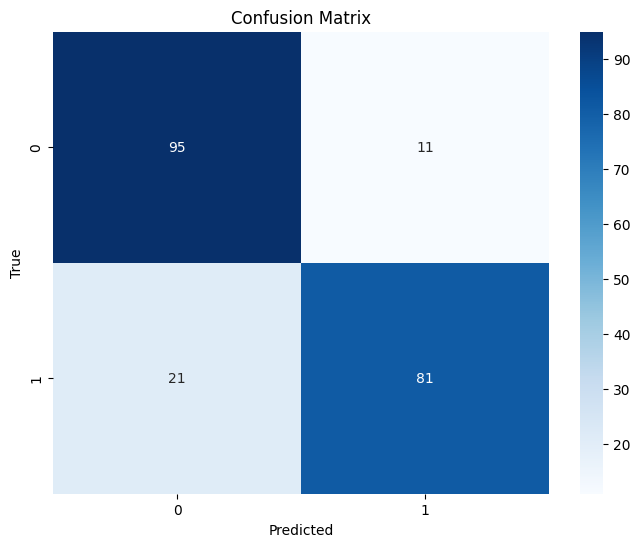

accuracy for class 0: 0.896
accuracy for class 1: 0.794

Evaluating the model on the train set...
auc on train set:  0.847165730017284
accuracy on train set:  0.8488745980707395
precision on train set:  0.8516988904739407
recall on train set:  0.8488745980707395
f1 score on train set:  0.8482848542133109
balanced accuracy on train set:  0.847165730017284
logistic loss on train set:  0.5471783174779973
mse on train set:  0.15112540192926044

Scorecard table:
   Feature           Bin        Points
0  BI-RADS    [4.5, 5.5[  4.568085e-01
1      Age  [36.5, 37.5[  1.481894e-15
2      Age  [39.5, 40.5[  8.944595e-02
3      Age  [49.5, 50.5[  1.662488e-02
4      Age  [57.5, 58.5[  1.845363e-02
5      Age  [66.5, 67.5[  1.022939e-01
6      Age  [67.5, 68.5[  8.603632e-02
7    Shape    [2.5, 3.5[  1.328630e-01
8   Margin    [1.5, 2.5[  1.105695e-01
9   Margin    [3.5, 4.5[  5.518547e-02


In [37]:
start_time = time.time()

scorecard = Scorecard()
mammo_infbins_diff_adaptivelasso_model, mammo_infbins_diff_adaptivelasso_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 0.01}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

## aesthetic evaluation (binary version)

#### load dataset

In [38]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_objective_evaluation = aesthetic_evaluation_data['Objective Evaluation']
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,pBAD Value,pBOD Value,cX2L Value,cX2a Value,cX2b Value,cX2Lab Value,cEMDL Value,cEMDa Value,cEMDb Value,cEMDLab Value
0,Good,1.149009,0.830915,0.107618,0.938534,1.934477,4.885198,17.296370,0.049401,0.033356,...,0.029188,0.103340,0.097502,0.009506,0.217169,0.100670,1.503086,0.030362,0.291363,0.210082
1,Good,2.368824,1.326447,1.599444,0.272997,0.035378,19.932998,68.761479,0.113919,0.058509,...,0.117875,0.406627,0.305692,0.159653,0.193317,0.061736,1.248600,0.206529,0.351693,0.105346
2,Good,1.409939,0.950935,0.278358,1.229293,2.221074,22.277770,38.323430,0.067231,0.038613,...,0.120132,0.206658,0.109386,0.024217,0.280625,0.012974,0.545858,0.075520,0.304185,0.049345
3,Good,2.059918,0.720926,1.786307,1.065381,1.995007,25.163410,31.631070,0.100705,0.032141,...,0.156030,0.196133,0.038581,0.032267,0.026153,0.010779,0.334111,0.105626,0.137693,0.031455
4,Good,2.452595,0.798596,1.868745,1.070148,1.218189,0.395585,31.426783,0.117249,0.035235,...,0.002820,0.224062,0.021259,0.027071,0.029206,0.006495,0.165401,0.081549,0.091768,0.030546


In [39]:
aesthetic_evaluation_y.value_counts()

Subjective Evaluation
Good         595
Fair         353
Excellent    308
Poor         102
Name: count, dtype: int64

In [40]:
# create binary target from aesthetic evaluation, by joining good and excellent, and fair and poor
aesthetic_evaluation_binary_y = aesthetic_evaluation_y.map({'Excellent': 1, 'Good': 1, 'Fair': 0, 'Poor': 0})

# distribution
print(aesthetic_evaluation_binary_y.value_counts())

# proportion of positive class
print("proportion of positive class: ", aesthetic_evaluation_binary_y.mean())

Subjective Evaluation
1    903
0    455
Name: count, dtype: int64
proportion of positive class:  0.6649484536082474


In [41]:
aesthetic_evaluation_objective_binary_y = aesthetic_evaluation_objective_evaluation.map({'Excellent': 1, 'Good': 1, 'Fair': 0, 'Poor': 0})
# accuracy of objective evaluation
acc = accuracy_score(aesthetic_evaluation_objective_binary_y, aesthetic_evaluation_binary_y)
print("Accuracy of objective evaluation: ", acc)

Accuracy of objective evaluation:  0.812960235640648


In [42]:
categorical_columns = aesthetic_evaluation_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_X[col] = aesthetic_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_X[col].unique()}")

K = 2

Categorical columns: []


### all features

#### CAIM & 1ook

Execution time: 0.9382491111755371 seconds

Evaluating the model on the test set...
test predictions:  [0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1
 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0
 1 1 1 1 1 1 1]
     True Value  Prediction
0             0           0
1             0           0
2             1           1
3             1           0
4             1           1
..          ...         ...
335       

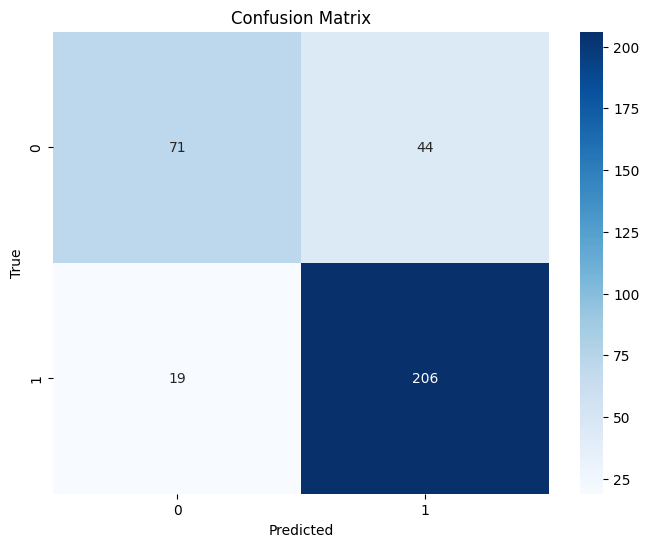

accuracy for class 0: 0.617
accuracy for class 1: 0.916

Evaluating the model on the train set...
auc on train set:  0.7976704841228527
accuracy on train set:  0.8369351669941061
precision on train set:  0.8344525706237498
recall on train set:  0.8369351669941061
f1 score on train set:  0.8331952155639712
balanced accuracy on train set:  0.7976704841228527
logistic loss on train set:  0.4614095664352797
mse on train set:  0.16306483300589392

Scorecard table:
          Feature                                       Bin    Points
0       BRA Value   [0.1623383287101974, 4.028486686743844[  0.006233
1       BRA Value   [4.028486686743844, 24.075530326533293[ -0.137302
2       BRA Value                 [24.075530326533293, inf[ -1.790758
3       LBC Value   [0.0004087089954772, 2.079932905328359[ -0.331475
4       LBC Value    [2.079932905328359, 8.815417698806167[ -0.621962
..            ...                                       ...       ...
61    cEMDb Value   [0.6298054456710815, 4.141

In [43]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_1ook_ml_model, aesthetic_binary_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 1.1345489025115967 seconds

Evaluating the model on the test set...
test predictions:  [0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1
 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0
 1 1 1 1 1 1 1]
     True Value  Prediction
0             0           0
1             0           0
2             1           1
3             1           0
4             1           1
..          ...         ...
335       

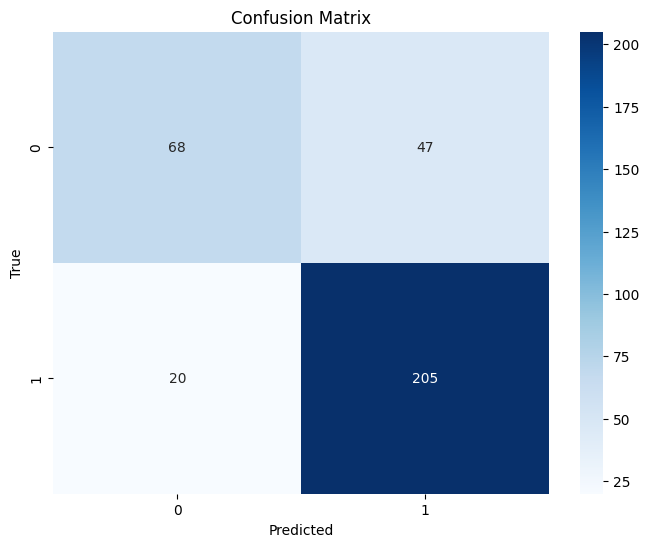

accuracy for class 0: 0.591
accuracy for class 1: 0.911

Evaluating the model on the train set...
auc on train set:  0.7749089016137429
accuracy on train set:  0.8290766208251473
precision on train set:  0.8294192043222004
recall on train set:  0.8290766208251473
f1 score on train set:  0.8213592842030041
balanced accuracy on train set:  0.7749089016137429
logistic loss on train set:  0.4558120395240558
mse on train set:  0.17092337917485265

Scorecard table:
          Feature                                          Bin        Points
0       BRA Value      [0.1623383287101974, 4.028486686743844[  5.618333e-02
1       BRA Value      [4.028486686743844, 24.075530326533293[ -4.837083e-02
2       BRA Value                    [24.075530326533293, inf[ -7.812500e-03
3       UNR Value      [0.002082659100472, 2.2191903172066128[  1.581611e-01
4       UNR Value     [2.2191903172066128, 27.523087361909116[ -1.503486e-01
5       UNR Value                    [27.523087361909116, inf[ -7.812500e-

In [44]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_1ook_mm_model, aesthetic_binary_caim_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params={'C': 0.0078125}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.9932191371917725 seconds

Evaluating the model on the test set...
test predictions:  [ 0.11410934  0.31166284  0.91763874  0.31089513  0.8713379   0.79278818
  0.79278818  0.0678085   0.70903287  0.67818818  0.72008524  0.91763874
  0.66568987  0.91763874  0.91763874  0.11410934  0.72008524  0.91763874
  0.91763874  0.42688976  0.81346419  0.91763874  0.91763874  0.91763874
  0.91763874  0.91763874  0.91763874  0.81346419  0.91763874  0.70762102
  0.0678085   0.72008524  0.91763874  0.59523468  0.72008524  0.91763874
  0.91763874  0.91763874  0.3417226   0.265362    0.91763874  0.91763874
  0.91763874  0.91763874  0.52026871  0.72371359  0.79278818  0.91763874
  0.43510155  0.26690798  0.91763874  0.79278818  0.79278818  0.11410934
  0.91763874 -0.06070167  0.79278818  0.91763874  0.61591069  0.19786464
  0.91763874  0.91763874  0.31166284  0.58052271  0.70903287  0.79278818
  0.72008524  0.8713379   0.91763874  0.86389383  0.24278897  0.91763874
  0.4158374   0.79278

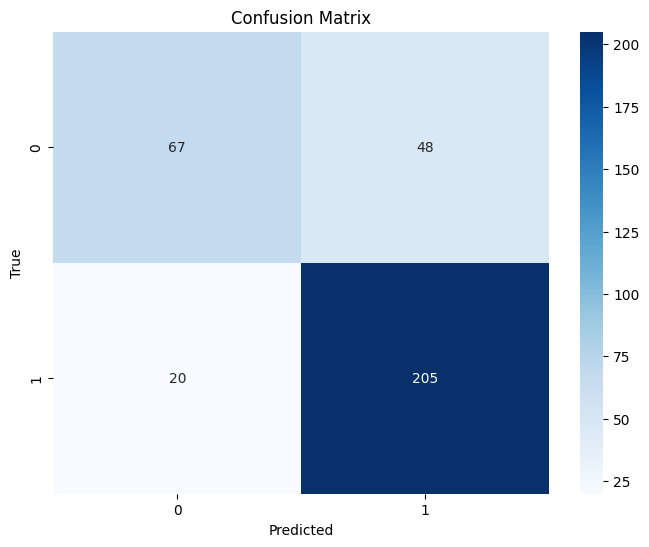

accuracy for class 0: 0.583
accuracy for class 1: 0.911

Evaluating the model on the train set...
auc on train set:  0.7859101162588928
accuracy on train set:  0.8300589390962672
precision on train set:  0.8276260937064926
recall on train set:  0.8300589390962672
f1 score on train set:  0.8251553317420218
balanced accuracy on train set:  0.785910116258893
logistic loss on train set:  0.46066322951378313
mse on train set:  0.16994106090373282

Scorecard table:
       Feature                                       Bin    Points
0    BRA Value   [0.1623383287101974, 4.028486686743844[  0.046301
1    LBC Value   [0.0004087089954772, 2.079932905328359[  0.574059
2    LBC Value    [2.079932905328359, 8.815417698806167[  0.520314
3    LBC Value                  [8.815417698806167, inf[  0.721189
4    UNR Value   [0.002082659100472, 2.2191903172066128[  0.123439
5    BCE Value    [1.786720539932413, 27.26338581203124[ -0.128510
6   pLBC Value  [0.0754687169258525, 0.3166823979957318[ -0.239451


In [45]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_1ook_beyondl1_model, aesthetic_binary_caim_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': SCAD(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 1.1435441970825195 seconds

Evaluating the model on the test set...
test predictions:  [ 0.05600959  0.33964825  0.81808847  0.23636784  0.88434889  0.753513
  0.74914712  0.06746077  0.6585661   0.6731031   0.73723968  0.92678775
  0.65452725  0.92678775  0.91610991  0.01663696  0.77949303  0.92678775
  0.92678775  0.46207618  0.79976056  0.82671448  0.91610991  0.92678775
  0.95269831  0.92678775  0.92678775  0.83152999  0.92678775  0.74829104
  0.12514076  0.74791752  0.91610991  0.63682401  0.75620873  0.92678775
  0.92678775  0.85392868  0.36856851  0.31482875  0.92678775  0.92678775
  0.94575679  0.86460651  0.52920594  0.78918775  0.84716856  0.91610991
  0.50419602  0.26470118  0.949478    0.81569424  0.77258528  0.22894193
  0.92678775 -0.00848253  0.81569424  0.92678775  0.61007257  0.24461205
  0.92678775  0.85392868  0.33964825  0.58712405  0.66924394  0.81569424
  0.74791752  0.85470201  0.93507896  0.88395323  0.31348834  0.92678775
  0.42144393  0.8156942

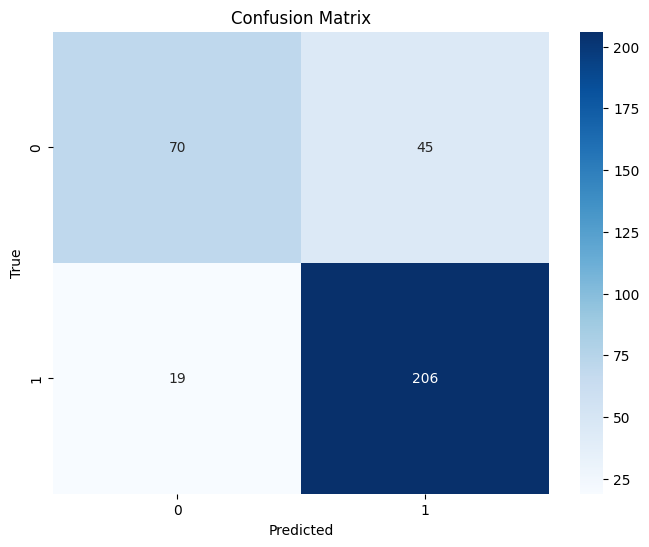

accuracy for class 0: 0.609
accuracy for class 1: 0.916

Evaluating the model on the train set...
auc on train set:  0.7969547110879751
accuracy on train set:  0.8408644400785854
precision on train set:  0.839440922819436
recall on train set:  0.8408644400785854
f1 score on train set:  0.8360045710019711
balanced accuracy on train set:  0.796954711087975
logistic loss on train set:  0.4580510502885453
mse on train set:  0.15913555992141454

Scorecard table:
          Feature                                       Bin    Points
0       BRA Value   [0.1623383287101974, 4.028486686743844[  0.057508
1       BRA Value   [4.028486686743844, 24.075530326533293[  0.058281
2       BRA Value                 [24.075530326533293, inf[ -0.050407
3       LBC Value   [0.0004087089954772, 2.079932905328359[ -0.059011
4       LBC Value    [2.079932905328359, 8.815417698806167[ -0.101845
..            ...                                       ...       ...
61    cEMDb Value   [0.6298054456710815, 4.14158

In [46]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_1ook_adaptivelasso_model, aesthetic_binary_caim_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-10}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

Execution time: 1.167126178741455 seconds

Evaluating the model on the test set...
test predictions:  [0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1
 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0
 1 1 1 1 1 1 1]
     True Value  Prediction
0             0           0
1             0           0
2             1           1
3             1           0
4             1           1
..          ...         ...
335        

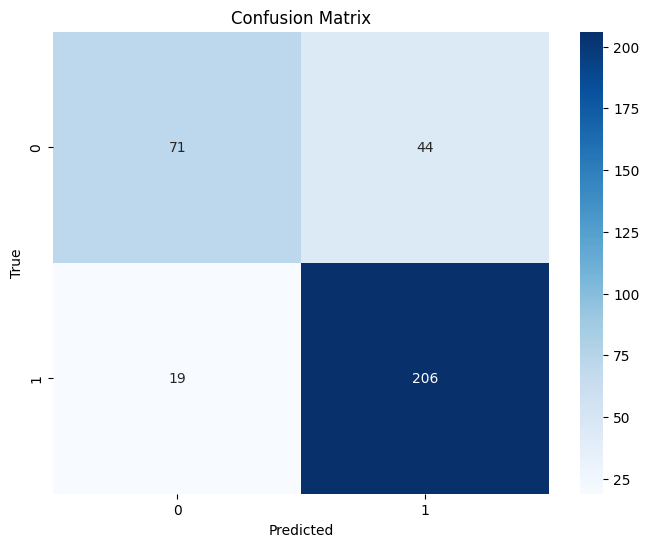

accuracy for class 0: 0.617
accuracy for class 1: 0.916

Evaluating the model on the train set...
auc on train set:  0.7998785354849904
accuracy on train set:  0.8388998035363457
precision on train set:  0.8365245968308649
recall on train set:  0.8388998035363457
f1 score on train set:  0.8352049117619957
balanced accuracy on train set:  0.7998785354849904
logistic loss on train set:  0.4610363979745314
mse on train set:  0.16110019646365423

Scorecard table:
          Feature                                       Bin    Points
0       BRA Value   [4.028486686743844, 24.075530326533293[ -0.149058
1       LBC Value    [2.079932905328359, 8.815417698806167[ -0.333763
2       UNR Value  [2.2191903172066128, 27.523087361909116[ -0.679225
3       BCE Value    [1.786720539932413, 27.26338581203124[ -0.830684
4       BCD Value   [3.502484549081236, 28.071833628579306[  0.128198
5       BAD Value   [42.63704161961118, 222.09042530882667[ -0.275644
6       BOD Value    [68.52658285021543, 317.6

In [47]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_diff_ml_model, aesthetic_binary_caim_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 1/0.6, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 1.1396520137786865 seconds

Evaluating the model on the test set...
test predictions:  [0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1
 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0
 1 1 1 1 1 1 1]
     True Value  Prediction
0             0           0
1             0           0
2             1           1
3             1           0
4             1           1
..          ...         ...
335       

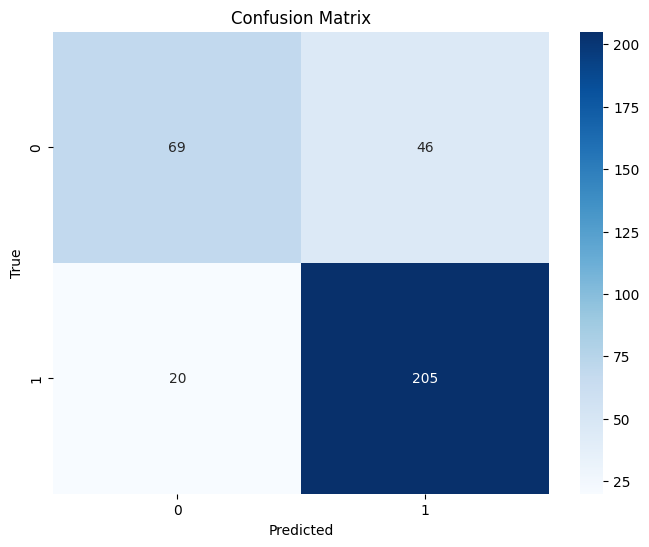

accuracy for class 0: 0.600
accuracy for class 1: 0.911

Evaluating the model on the train set...
auc on train set:  0.776379489849037
accuracy on train set:  0.8300589390962672
precision on train set:  0.8303618388896803
recall on train set:  0.8300589390962672
f1 score on train set:  0.8224965176095786
balanced accuracy on train set:  0.776379489849037
logistic loss on train set:  0.4558120395240558
mse on train set:  0.16994106090373282

Scorecard table:
          Feature                                           Bin        Points
0       BRA Value       [0.1623383287101974, 4.028486686743844[  2.879641e-16
1       BRA Value       [4.028486686743844, 24.075530326533293[ -1.091420e-01
2       BRA Value                     [24.075530326533293, inf[ -1.562500e-02
3       LBC Value       [0.0004087089954772, 2.079932905328359[  2.879641e-16
4       LBC Value        [2.079932905328359, 8.815417698806167[ -4.409859e-01
5       UNR Value       [0.002082659100472, 2.2191903172066128[  2.879

In [48]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_diff_mm_model, aesthetic_binary_caim_diff_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.015625}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.9720261096954346 seconds

Evaluating the model on the test set...
test predictions:  [ 0.11449427  0.30795695  0.83296144  0.48369239  0.83296144  0.81424264
  0.72957364  0.11449427  0.7154754   0.67715507  0.72416776  0.91763044
  0.78547528  0.91763044  0.91763044  0.02982527  0.72416776  0.91763044
  0.91763044  0.41713953  0.81714022  0.91763044  0.91763044  0.91763044
  0.91763044  0.91763044  0.91763044  0.81714022  0.91763044  0.6120876
  0.11449427  0.72416776  0.91763044  0.62077996  0.63949876  0.91763044
  0.91763044  0.91763044  0.21498449  0.30795695  0.91763044  0.91763044
  0.83296144  0.91763044  0.51011199  0.69804934  0.81424264  0.91763044
  0.30795695  0.27456902  0.91763044  0.81424264  0.81424264  0.11449427
  0.91763044 -0.0176609   0.81424264  0.91763044  0.62367754  0.21326151
  0.91763044  0.91763044  0.30795695  0.58332023  0.7154754   0.81424264
  0.72416776  0.91763044  0.83296144  0.85107758  0.23682931  0.91763044
  0.32377817  0.814242

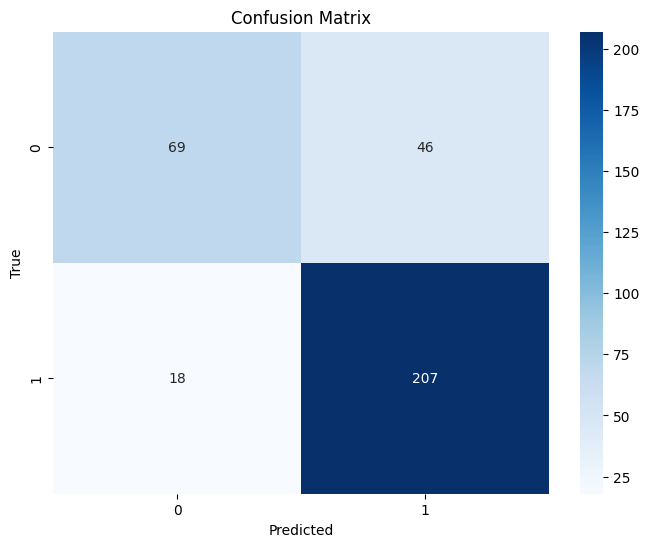

accuracy for class 0: 0.600
accuracy for class 1: 0.920

Evaluating the model on the train set...
auc on train set:  0.7807652264445601
accuracy on train set:  0.8271119842829077
precision on train set:  0.824774698852294
recall on train set:  0.8271119842829077
f1 score on train set:  0.8216350387163394
balanced accuracy on train set:  0.7807652264445601
logistic loss on train set:  0.4602900610530349
mse on train set:  0.17288801571709234

Scorecard table:
         Feature                                          Bin    Points
0      LBC Value       [2.079932905328359, 8.815417698806167[ -0.066553
1      BCE Value       [1.786720539932413, 27.26338581203124[ -0.132155
2     pLBC Value     [0.0754687169258525, 0.3166823979957318[ -0.240475
3     pUNR Value      [0.1200310010222253, 1.999999999999999[ -0.202155
4     pBCE Value     [0.3739177872614725, 1.9451569659865504[ -0.153028
5     pBCD Value      [0.0765612868626487, 0.630700937320437[ -0.193463
6     pBAD Value  [3.720763402591

In [49]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_diff_beyondl1_model, aesthetic_binary_caim_diff_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 1.1601638793945312 seconds

Evaluating the model on the test set...
test predictions:  [ 0.06750285  0.33764285  0.8259298   0.23969666  0.87635354  0.75615264
  0.75961793  0.07336041  0.65539141  0.67084712  0.73564481  0.92471555
  0.6514774   0.92471555  0.91502159  0.02228841  0.77801898  0.92471555
  0.92471555  0.46030259  0.80837437  0.83388093  0.91502159  0.92471555
  0.95300225  0.92471555  0.92471555  0.83110769  0.92471555  0.74720081
  0.12438042  0.74533878  0.91502159  0.63767135  0.7520147   0.92471555
  0.92471555  0.8541261   0.37211546  0.31089161  0.92471555  0.92471555
  0.94108544  0.86382006  0.53454358  0.79468455  0.84870972  0.91502159
  0.50451088  0.27113846  0.88268303  0.81704813  0.77405653  0.22892693
  0.92471555 -0.01027639  0.81704813  0.92471555  0.62186319  0.26082116
  0.92471555  0.8541261   0.33764285  0.58163009  0.66508538  0.81704813
  0.74533878  0.85028969  0.93139147  0.88385382  0.31308404  0.92471555
  0.41432296  0.81704

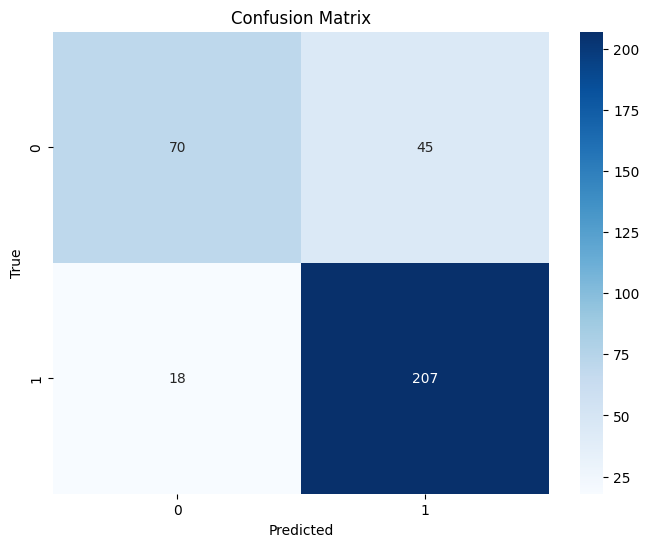

accuracy for class 0: 0.609
accuracy for class 1: 0.920

Evaluating the model on the train set...
auc on train set:  0.7962215859795245
accuracy on train set:  0.8408644400785854
precision on train set:  0.8396194240928699
recall on train set:  0.8408644400785854
f1 score on train set:  0.8358231606366304
balanced accuracy on train set:  0.7962215859795245
logistic loss on train set:  0.45767788182779706
mse on train set:  0.15913555992141454

Scorecard table:
          Feature                                       Bin        Points
0       BRA Value   [0.1623383287101974, 4.028486686743844[  4.203253e-02
1       BRA Value   [4.028486686743844, 24.075530326533293[ -3.836405e-03
2       BRA Value                 [24.075530326533293, inf[ -4.415687e-08
3       LBC Value   [0.0004087089954772, 2.079932905328359[  4.203252e-02
4       LBC Value    [2.079932905328359, 8.815417698806167[ -4.086173e-02
..            ...                                       ...           ...
61    cEMDb Value

In [50]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_diff_adaptivelasso_model, aesthetic_binary_caim_diff_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 0.00046415888336127724}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

Execution time: 107.78467798233032 seconds

Evaluating the model on the test set...
test predictions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1]
     True Value  Prediction
0             0           1
1             0           1
2             1           1
3             1           1
4             1           1
..          ...         ...
335       

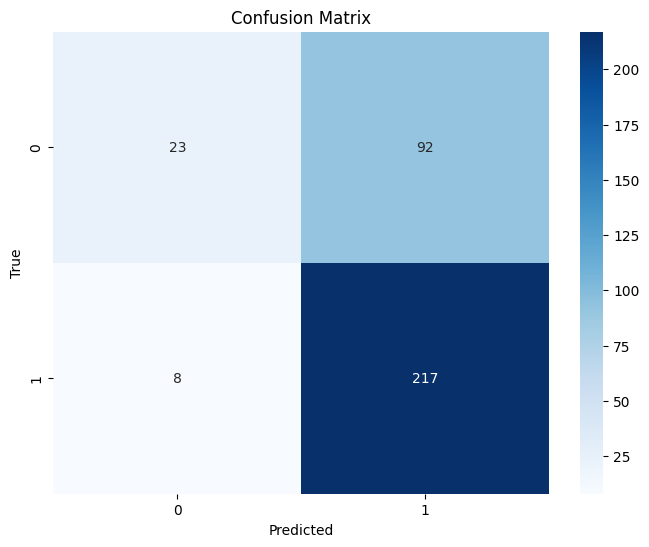

accuracy for class 0: 0.200
accuracy for class 1: 0.964

Evaluating the model on the train set...
auc on train set:  1.0
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.44013896417262915
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  0.206494
1          BRA Value    [0.189619931322902, 0.20154489666341896[  0.206812
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  0.206162
3          BRA Value  [0.20882918670067196, 0.21511673901980122[ -0.438700
4          BRA Value  [0.21511673901980122, 0.23356299924095925[ -0.438970
...              ...                                         ...       ...
22369  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[  0.206304
22370  cEMDLab Value     [0.7891429096576

In [51]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_1ook_ml_model, aesthetic_binary_infbins_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 1000.0, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 4.4550371170043945 seconds

Evaluating the model on the test set...
test predictions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1]
     True Value  Prediction
0             0           1
1             0           1
2             1           1
3             1           1
4             1           1
..          ...         ...
335       

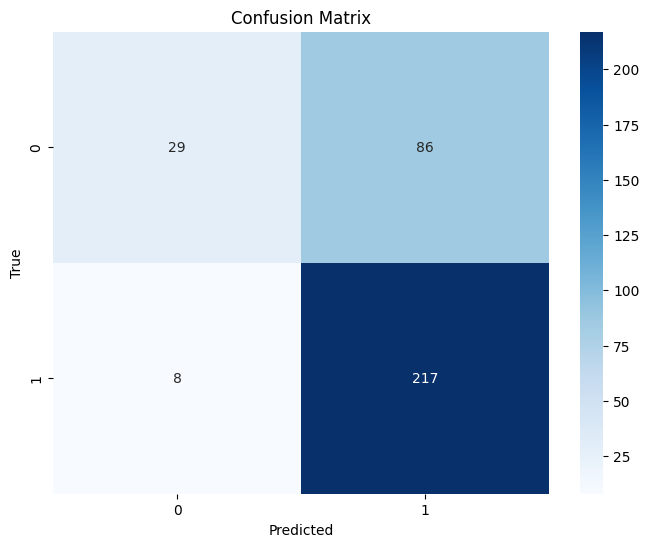

accuracy for class 0: 0.252
accuracy for class 1: 0.964

Evaluating the model on the train set...
auc on train set:  1.0
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.44013896417262915
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  0.030362
1          BRA Value    [0.189619931322902, 0.20154489666341896[  0.030362
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  0.030339
3          BRA Value  [0.20882918670067196, 0.21511673901980122[ -0.060580
4          BRA Value  [0.21511673901980122, 0.23356299924095925[ -0.060570
...              ...                                         ...       ...
22369  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[  0.030362
22370  cEMDLab Value     [0.7891429096576

In [52]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_1ook_mm_model, aesthetic_binary_infbins_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params={'C': 0.125}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.270479679107666 seconds

Evaluating the model on the test set...
test predictions:  [0.66601179 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179
 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179
 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179
 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179
 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179
 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179
 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179
 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179
 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179
 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179
 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179
 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179
 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179 0.66601179
 0.66601179 0.66601179 0.66

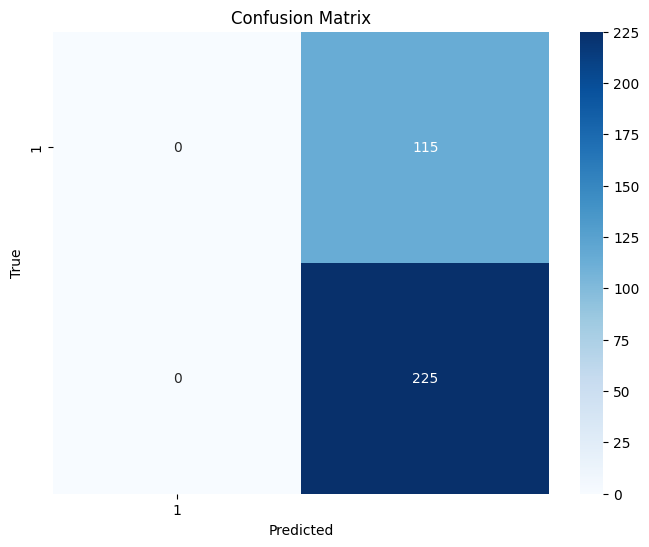

accuracy for class 0: 0.000
accuracy for class 1: 1.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6660117878192534
precision on train set:  0.4435717015141983
recall on train set:  0.6660117878192534
f1 score on train set:  0.5324952737517143
balanced accuracy on train set:  0.5
logistic loss on train set:  0.44013896417262915
mse on train set:  0.33398821218074654

Scorecard table:
Empty DataFrame
Columns: [Feature, Bin, Points]
Index: []


In [53]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_1ook_beyondl1_model, aesthetic_binary_infbins_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


Execution time: 38.02614116668701 seconds

Evaluating the model on the test set...
test predictions:  [0.58803166 0.76896447 0.72589586 0.54279845 0.72373127 0.63326486
 0.76896447 0.58803166 0.63326486 0.76896447 0.76896447 0.81874332
 0.67849806 0.58803166 0.67849806 0.54279845 0.77351011 0.68066266
 0.81419768 0.36186563 0.63975864 0.59019625 0.72373127 0.63326486
 0.67849806 0.81419768 0.67849806 0.58803166 0.72373127 0.72827691
 0.31663243 0.81419768 0.58803166 0.7778393  0.67849806 0.72827691
 0.81419768 0.81419768 0.63326486 0.59019625 0.77545826 0.90466409
 0.72373127 0.76896447 0.40709884 0.72589586 0.67849806 0.63326486
 0.45233204 0.58803166 0.86159548 0.81419768 0.67849806 0.58803166
 0.76896447 0.45233204 0.67849806 0.94989729 0.63326486 0.40926343
 0.72373127 0.76896447 0.72827691 0.54279845 0.77112907 0.63326486
 0.81636227 0.67849806 0.77351011 0.81419768 0.58803166 0.81636227
 0.67849806 0.72373127 0.63326486 0.58803166 0.6378105  0.85943088
 0.63326486 0.81874332 0.40

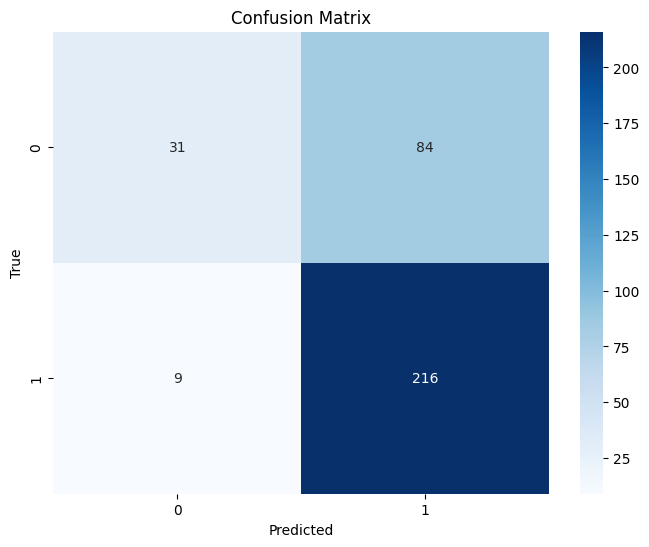

accuracy for class 0: 0.270
accuracy for class 1: 0.960

Evaluating the model on the train set...
auc on train set:  1.0
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.44013896417262915
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  0.045233
1          BRA Value    [0.189619931322902, 0.20154489666341896[  0.045233
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  0.045233
3          BRA Value   [0.3244746116292725, 0.33359830460351236[  0.045233
4          BRA Value  [0.33359830460351236, 0.33569655002749277[  0.045233
...              ...                                         ...       ...
14892  cEMDLab Value    [0.6581204339353381, 0.7048440329659416[  0.045233
14893  cEMDLab Value    [0.73793673866349

In [54]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_1ook_adaptivelasso_model, aesthetic_binary_infbins_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 0.00046415888336127724}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

Execution time: 661.3223631381989 seconds

Evaluating the model on the test set...
test predictions:  [0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1
 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0
 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1
 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1
 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 0 1]
     True Value  Prediction
0             0           0
1             0           1
2             1           1
3             1           0
4             1           1
..          ...         ...
335        

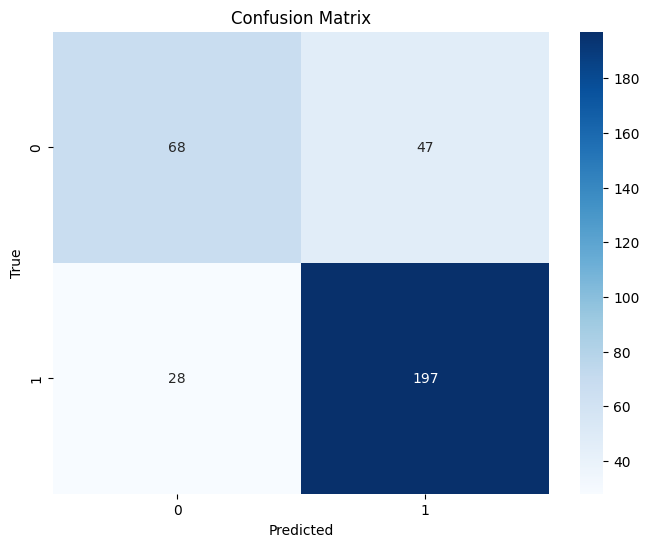

accuracy for class 0: 0.591
accuracy for class 1: 0.876

Evaluating the model on the train set...
auc on train set:  0.9897058823529411
accuracy on train set:  0.9931237721021611
precision on train set:  0.9931940401244749
recall on train set:  0.9931237721021611
f1 score on train set:  0.9931056688551574
balanced accuracy on train set:  0.9897058823529412
logistic loss on train set:  0.44013896417262915
mse on train set:  0.0068762278978389

Scorecard table:
            Feature                                        Bin    Points
0         BRA Value    [0.520378007902174, 0.5243768810667505[  0.051659
1         BRA Value   [0.5243768810667505, 0.5252328762213174[  0.030451
2         BRA Value   [0.5252328762213174, 0.5266390394944898[  0.028080
3         BRA Value   [0.5266390394944898, 0.5276260605099737[  0.017313
4         BRA Value   [0.5276260605099737, 0.5302659953487654[  0.015214
...             ...                                        ...       ...
2798  cEMDLab Value  [0.3

In [55]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_diff_ml_model, aesthetic_binary_infbins_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 1/0.9, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 3.2231879234313965 seconds

Evaluating the model on the test set...
test predictions:  [0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1
 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1
 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1
 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0
 1 1 1 1 1 1 1]
     True Value  Prediction
0             0           0
1             0           1
2             1           1
3             1           0
4             1           1
..          ...         ...
335       

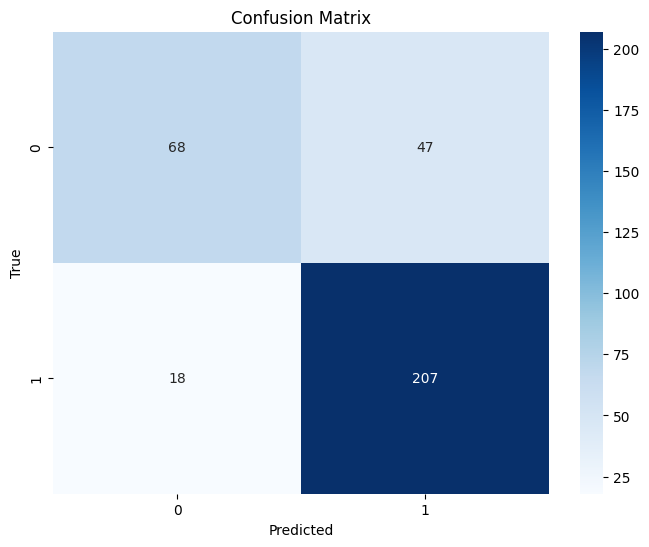

accuracy for class 0: 0.591
accuracy for class 1: 0.920

Evaluating the model on the train set...
auc on train set:  0.8499479437792816
accuracy on train set:  0.888015717092338
precision on train set:  0.8901796159822513
recall on train set:  0.888015717092338
f1 score on train set:  0.8845958092236093
balanced accuracy on train set:  0.8499479437792816
logistic loss on train set:  0.4490950072305872
mse on train set:  0.11198428290766209

Scorecard table:
             Feature                                         Bin        Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[ -3.957338e-17
1          BRA Value    [0.189619931322902, 0.20154489666341896[ -3.957338e-17
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  9.765625e-04
3          BRA Value  [0.20882918670067196, 0.21511673901980122[  9.765625e-04
4          BRA Value  [0.21511673901980122, 0.23356299924095925[  9.765625e-04
...              ...                                         ...

In [56]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_diff_mm_model, aesthetic_binary_infbins_diff_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.0009765625}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 1.0531139373779297 seconds

Evaluating the model on the test set...
test predictions:  [ 0.05297642  0.56852104  0.81462317  0.40960244  0.7219234   0.81402758
  0.81462317  0.05297642  0.61870944  0.67901077  0.6839031   0.99951897
  0.910052    0.77181201  0.91911109 -0.0515115   0.68888767  1.11169395
  0.90622977  0.08287478  0.77398963  0.83142209  0.7233421   0.71835753
  0.81462317  0.82991153  0.99672163  0.7510142   0.81462317  0.71372507
  0.05297642  0.95696075  0.82991153  0.53196464  0.71864802  1.03128607
  1.10599722  0.82608578  0.46895382  0.22935945  1.11169395  0.77266404
  0.82539982  0.73688623  0.62308887  0.64858335  0.89503105  0.92988774
  0.17533861  0.42984347  1.06345347  0.83142209  1.00720603  0.15368878
  0.89503105  0.05297642  0.81462317  1.00602101  0.56142432  0.28424931
  0.98304559  0.81729411  0.30180156  0.60508006  0.59238224  0.73780735
  0.87655287  0.50916966  0.9375748   0.77830444  0.39761109  0.98194098
  0.46403312  0.92679

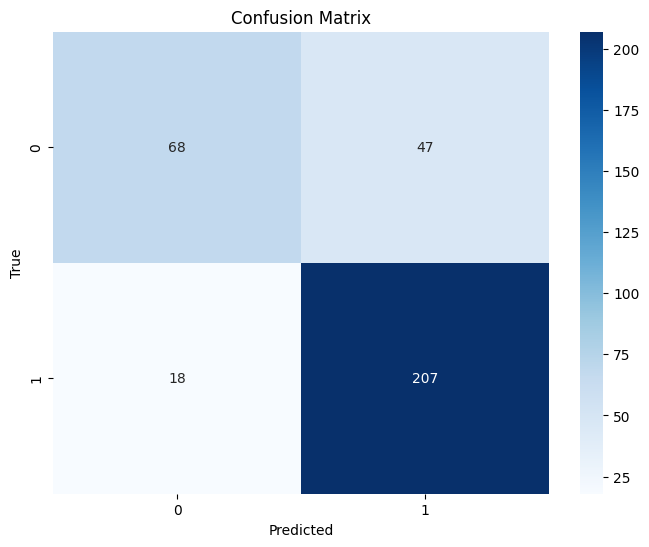

accuracy for class 0: 0.591
accuracy for class 1: 0.920

Evaluating the model on the train set...
auc on train set:  0.8028587541211174
accuracy on train set:  0.849705304518664
precision on train set:  0.8502976439450108
recall on train set:  0.849705304518664
f1 score on train set:  0.8441472990191714
balanced accuracy on train set:  0.8028587541211174
logistic loss on train set:  0.4543193656810628
mse on train set:  0.15029469548133595

Scorecard table:
        Feature                                         Bin    Points
0     BRA Value    [1.6175251746564627, 1.6221069762729003[  0.112175
1     LBC Value      [1.45257388316516, 1.4532499477191012[ -0.150901
2     BCD Value    [1.4950344781117648, 1.4971771552967654[ -0.069631
3     BAD Value      [24.556336882452037, 24.6627575025323[  0.124266
4    pBRA Value    [0.0081901961756122, 0.0085189579098216[  0.105744
5    pBRA Value   [0.1449434181014957, 0.14506710444623505[ -0.100712
6    pLBC Value  [0.01807060342663725, 0.0181921

In [57]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_diff_beyondl1_model, aesthetic_binary_infbins_diff_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


Execution time: 59.99691390991211 seconds

Evaluating the model on the test set...
test predictions:  [ 2.03907927e-01  8.68351049e-01  5.62459657e-01  4.33150100e-01
  7.96767415e-01  9.35221486e-01  4.67815140e-01  1.42891508e-01
  6.18301868e-01  8.82039502e-01  1.22775948e+00  1.27873238e+00
  5.27292371e-01  4.34620333e-01  6.81068441e-01  3.18057466e-02
  8.31135521e-01  9.77807406e-01  8.78422883e-01  4.56384397e-03
  8.83724618e-01  4.28323719e-01  6.08526452e-01  1.30367312e+00
  7.79765548e-01  4.89941963e-01  3.23479120e-01  7.47890725e-01
  1.08331227e+00  1.76298320e+00 -1.83680584e-01  3.02050383e-01
  6.84420433e-01  1.05687777e+00  1.11923718e+00  1.40045269e+00
  1.28930576e+00  1.31030883e+00  6.76764707e-01  4.04373282e-01
  1.54111480e+00  1.69791403e+00  6.15061631e-01  4.91039718e-01
  2.38866202e-01  3.45900454e-01  5.49717575e-01  5.76850944e-01
  5.74666624e-01  4.42551806e-01  1.24334189e+00  8.17435880e-01
  9.78951567e-01  3.39394727e-01  1.18700636e+00 -4.1

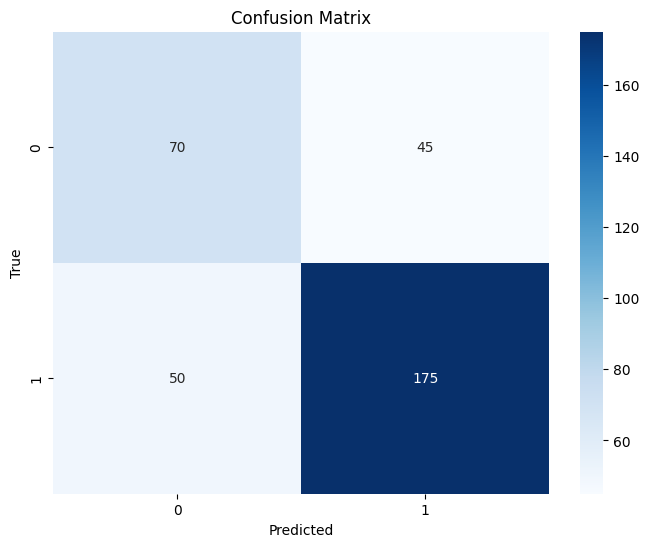

accuracy for class 0: 0.609
accuracy for class 1: 0.778

Evaluating the model on the train set...
auc on train set:  1.0
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.44013896417262915
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  0.005636
1          BRA Value    [0.189619931322902, 0.20154489666341896[  0.003807
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  0.008792
3          BRA Value  [0.20882918670067196, 0.21511673901980122[  0.006024
4          BRA Value  [0.21511673901980122, 0.23356299924095925[  0.007363
...              ...                                         ...       ...
22369  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[  0.010146
22370  cEMDLab Value     [0.7891429096576

In [58]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_diff_adaptivelasso_model, aesthetic_binary_infbins_diff_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-10}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

### selected features by hand

In [60]:
aesthetic_evaluation_X = aesthetic_evaluation_X[['pLBC Value', 'pBCE Value', 'cX2b Value', 'pUNR Value']]

#### CAIM & 1ook

Execution time: 0.17435812950134277 seconds

Evaluating the model on the test set...
test predictions:  [0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1
 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0
 1 1 1 1 1 1 1]
     True Value  Prediction
0             0           0
1             0           0
2             1           1
3             1           0
4             1           1
..          ...         ...
335      

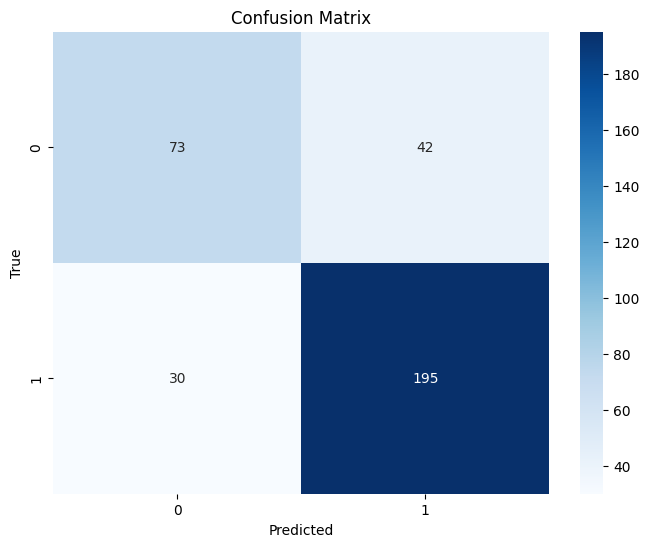

accuracy for class 0: 0.635
accuracy for class 1: 0.867

Evaluating the model on the train set...
auc on train set:  0.782205448551102
accuracy on train set:  0.8212180746561886
precision on train set:  0.817881766346109
recall on train set:  0.8212180746561886
f1 score on train set:  0.8176652367440655
balanced accuracy on train set:  0.7822054485511019
logistic loss on train set:  0.4655144195035104
mse on train set:  0.1787819253438114

Scorecard table:
       Feature                                           Bin    Points
0   pLBC Value  [2.2773158381800327e-05, 0.0754687169258525[  0.653109
1   pLBC Value      [0.0754687169258525, 0.3166823979957318[ -1.523311
2   pLBC Value                     [0.3166823979957318, inf[ -5.995833
3   pBCE Value      [0.0002450886198942, 0.3739177872614725[  0.265610
4   pBCE Value      [0.3739177872614725, 1.9451569659865504[ -1.292274
5   pBCE Value                     [1.9451569659865504, inf[ -7.172634
6   cX2b Value      [0.0036338977515697, 0

In [61]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_1ook_ml_model, aesthetic_binary_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.29794931411743164 seconds

Evaluating the model on the test set...
test predictions:  [0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1
 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0
 1 1 1 1 1 1 1]
     True Value  Prediction
0             0           0
1             0           0
2             1           1
3             1           0
4             1           1
..          ...         ...
335      

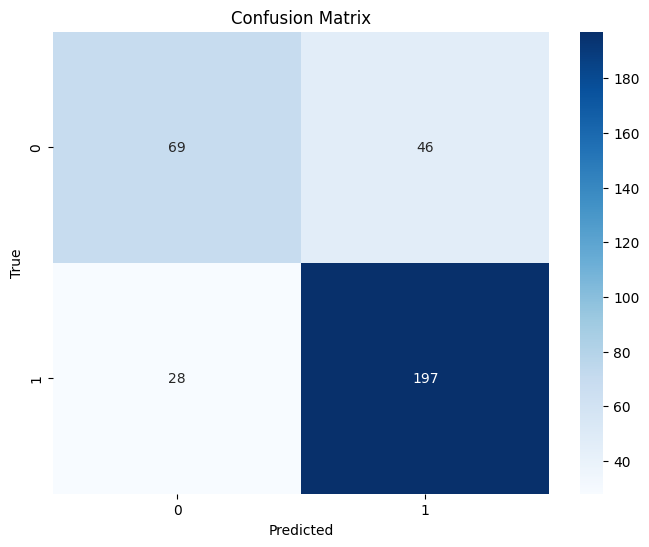

accuracy for class 0: 0.600
accuracy for class 1: 0.876

Evaluating the model on the train set...
auc on train set:  0.7763361096651049
accuracy on train set:  0.8202357563850687
precision on train set:  0.8169634317975177
recall on train set:  0.8202357563850687
f1 score on train set:  0.8154439662390118
balanced accuracy on train set:  0.776336109665105
logistic loss on train set:  0.4632754087390209
mse on train set:  0.17976424361493124

Scorecard table:
       Feature                                           Bin    Points
0   pLBC Value  [2.2773158381800327e-05, 0.0754687169258525[  0.656346
1   pLBC Value      [0.0754687169258525, 0.3166823979957318[ -0.640721
2   pLBC Value                     [0.3166823979957318, inf[ -0.015625
3   pBCE Value      [0.0002450886198942, 0.3739177872614725[  0.312500
4   pBCE Value      [0.3739177872614725, 1.9451569659865504[ -0.296875
5   pBCE Value                     [1.9451569659865504, inf[ -0.015625
6   cX2b Value      [0.0036338977515697,

In [62]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_1ook_mm_model, aesthetic_binary_caim_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params={'C': 0.015625}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.17705583572387695 seconds

Evaluating the model on the test set...
test predictions:  [ 0.20371337  0.20371337  0.87028413  0.45220229  0.87028413  0.73747354
  0.73747354  0.20371337  0.62179521  0.45220229  0.87028413  0.87028413
  0.87028413  0.87028413  0.87028413  0.20371337  0.87028413  0.87028413
  0.87028413  0.45220229  0.87028413  0.87028413  0.87028413  0.87028413
  0.87028413  0.87028413  0.87028413  0.87028413  0.87028413  0.48898462
  0.20371337  0.87028413  0.87028413  0.73747354  0.87028413  0.87028413
  0.87028413  0.87028413  0.20371337  0.20371337  0.87028413  0.87028413
  0.87028413  0.87028413  0.45220229  0.60926559  0.73747354  0.87028413
  0.20371337  0.3193917   0.87028413  0.73747354  0.73747354  0.20371337
  0.87028413  0.20371337  0.73747354  0.87028413  0.87028413  0.3193917
  0.87028413  0.87028413  0.20371337  0.62179521  0.62179521  0.73747354
  0.87028413  0.87028413  0.87028413  0.87028413  0.36077667  0.87028413
  0.20371337  0.73747

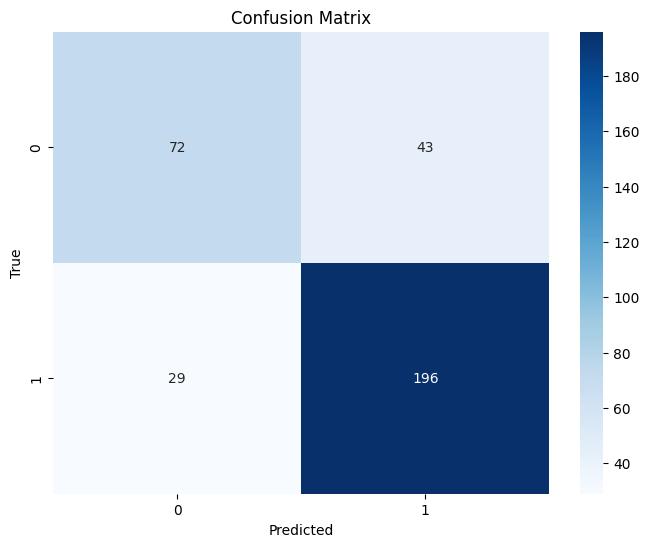

accuracy for class 0: 0.626
accuracy for class 1: 0.871

Evaluating the model on the train set...
auc on train set:  0.7792642720805136
accuracy on train set:  0.8192534381139489
precision on train set:  0.8158068165970752
recall on train set:  0.8192534381139489
f1 score on train set:  0.8154793294431703
balanced accuracy on train set:  0.7792642720805136
logistic loss on train set:  0.4655144195035104
mse on train set:  0.1807465618860511

Scorecard table:
      Feature                                       Bin    Points
0  pLBC Value  [0.0754687169258525, 0.3166823979957318[ -0.418082
1  pBCE Value  [0.0002450886198942, 0.3739177872614725[  0.621795
2  pBCE Value  [0.3739177872614725, 1.9451569659865504[  0.360777
3  cX2b Value  [0.0036338977515697, 0.3200540244579315[  0.132811
4  pUNR Value   [0.1200310010222253, 1.999999999999999[ -0.248489


In [63]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_1ook_beyondl1_model, aesthetic_binary_caim_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.27892494201660156 seconds

Evaluating the model on the test set...
test predictions:  [ 0.20172789  0.20172789  0.87128434  0.44888393  0.87128434  0.74702856
  0.74702856  0.20172789  0.6241283   0.44888393  0.87128434  0.87128434
  0.87128434  0.87128434  0.87128434  0.20172789  0.87128434  0.87128434
  0.87128434  0.44888393  0.87128434  0.87128434  0.87128434  0.87128434
  0.87128434  0.87128434  0.87128434  0.87128434  0.87128434  0.49987252
  0.20172789  0.87128434  0.87128434  0.74702856  0.87128434  0.87128434
  0.87128434  0.87128434  0.20172789  0.20172789  0.87128434  0.87128434
  0.87128434  0.87128434  0.44888393  0.61383046  0.74702856  0.87128434
  0.20172789  0.32462815  0.87128434  0.74702856  0.74702856  0.20172789
  0.87128434  0.20172789  0.74702856  0.87128434  0.87128434  0.32462815
  0.87128434  0.87128434  0.20172789  0.6241283   0.6241283   0.74702856
  0.87128434  0.87128434  0.87128434  0.87128434  0.36667442  0.87128434
  0.20172789  0.7470

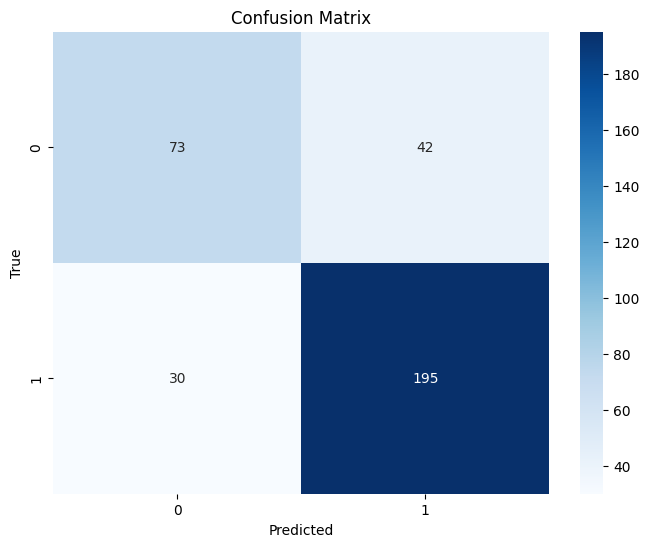

accuracy for class 0: 0.635
accuracy for class 1: 0.867

Evaluating the model on the train set...
auc on train set:  0.782205448551102
accuracy on train set:  0.8212180746561886
precision on train set:  0.817881766346109
recall on train set:  0.8212180746561886
f1 score on train set:  0.8176652367440655
balanced accuracy on train set:  0.7822054485511019
logistic loss on train set:  0.4655144195035104
mse on train set:  0.1787819253438114

Scorecard table:
       Feature                                           Bin    Points
0   pLBC Value  [2.2773158381800327e-05, 0.0754687169258525[  0.220281
1   pLBC Value      [0.0754687169258525, 0.3166823979957318[ -0.202120
2   pLBC Value                     [0.3166823979957318, inf[ -0.279592
3   pBCE Value      [0.0002450886198942, 0.3739177872614725[  0.206592
4   pBCE Value      [0.3739177872614725, 1.9451569659865504[ -0.050862
5   pBCE Value                     [1.9451569659865504, inf[ -0.417537
6   cX2b Value      [0.0036338977515697, 0

In [64]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_1ook_adaptivelasso_model, aesthetic_binary_caim_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-10}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

Execution time: 0.2286391258239746 seconds

Evaluating the model on the test set...
test predictions:  [0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1
 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0
 1 1 1 1 1 1 1]
     True Value  Prediction
0             0           0
1             0           0
2             1           1
3             1           0
4             1           1
..          ...         ...
335       

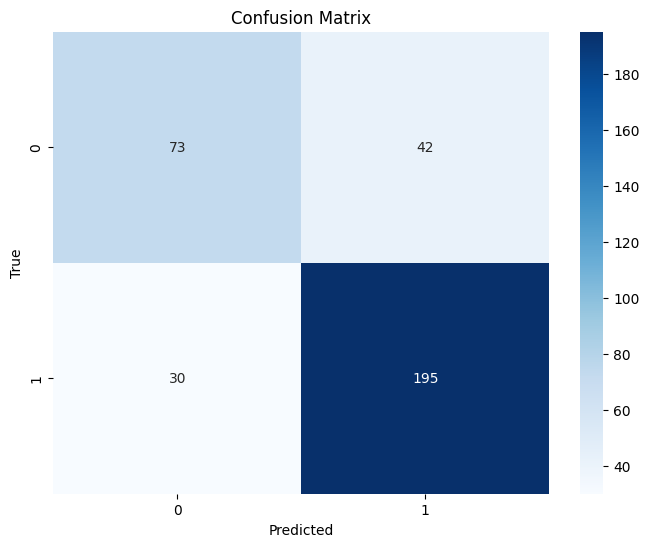

accuracy for class 0: 0.635
accuracy for class 1: 0.867

Evaluating the model on the train set...
auc on train set:  0.782205448551102
accuracy on train set:  0.8212180746561886
precision on train set:  0.817881766346109
recall on train set:  0.8212180746561886
f1 score on train set:  0.8176652367440655
balanced accuracy on train set:  0.7822054485511019
logistic loss on train set:  0.4655144195035104
mse on train set:  0.1787819253438114

Scorecard table:
       Feature                                           Bin    Points
0   pLBC Value  [2.2773158381800327e-05, 0.0754687169258525[  0.059215
1   pLBC Value      [0.0754687169258525, 0.3166823979957318[ -2.176674
2   pLBC Value                     [0.3166823979957318, inf[ -4.499786
3   pBCE Value      [0.0002450886198942, 0.3739177872614725[  0.396833
4   pBCE Value      [0.3739177872614725, 1.9451569659865504[ -1.557931
5   pBCE Value                     [1.9451569659865504, inf[ -6.003230
6   cX2b Value      [0.0036338977515697, 0

In [65]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_diff_ml_model, aesthetic_binary_caim_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.2629971504211426 seconds

Evaluating the model on the test set...
test predictions:  [0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1
 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0
 1 1 1 1 1 1 1]
     True Value  Prediction
0             0           0
1             0           0
2             1           1
3             1           0
4             1           1
..          ...         ...
335       

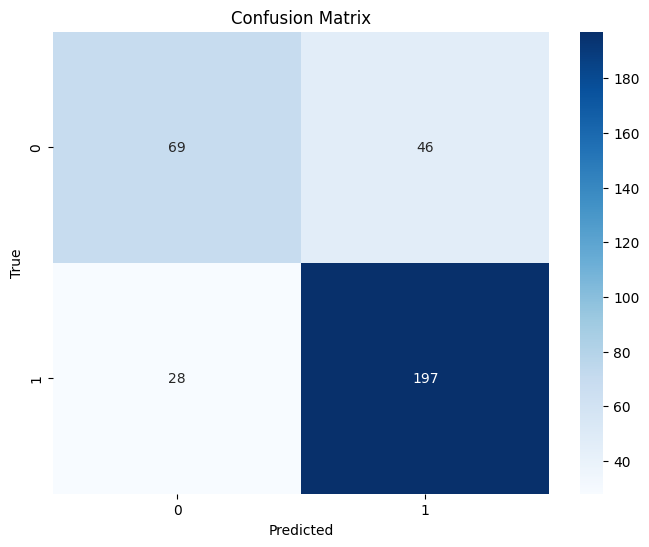

accuracy for class 0: 0.600
accuracy for class 1: 0.876

Evaluating the model on the train set...
auc on train set:  0.777806697900399
accuracy on train set:  0.8212180746561886
precision on train set:  0.8179810890859383
recall on train set:  0.8212180746561886
f1 score on train set:  0.8165492561107103
balanced accuracy on train set:  0.7778066979003991
logistic loss on train set:  0.4632754087390209
mse on train set:  0.1787819253438114

Scorecard table:
      Feature                                       Bin    Points
0  pLBC Value  [0.0754687169258525, 0.3166823979957318[ -1.148193
1  pLBC Value                 [0.3166823979957318, inf[ -0.000732
2  pBCE Value  [0.3739177872614725, 1.9451569659865504[ -0.312500
3  pBCE Value                 [1.9451569659865504, inf[ -0.015625
4  cX2b Value   [0.3200540244579315, 0.992175817489624[  0.000244
5  cX2b Value                  [0.992175817489624, inf[ -0.015625
6  pUNR Value   [0.1200310010222253, 1.999999999999999[ -0.851318
7  pUNR Va

In [66]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_diff_mm_model, aesthetic_binary_caim_diff_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.015625}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.1772608757019043 seconds

Evaluating the model on the test set...
test predictions:  [ 0.20184028  0.20184028  0.8706895   0.45269872  0.8706895   0.74135643
  0.74135643  0.20184028  0.61983106  0.45269872  0.8706895   0.8706895
  0.8706895   0.8706895   0.8706895   0.20184028  0.8706895   0.8706895
  0.8706895   0.45269872  0.8706895   0.8706895   0.8706895   0.8706895
  0.8706895   0.8706895   0.8706895   0.8706895   0.8706895   0.49049799
  0.20184028  0.8706895   0.8706895   0.74135643  0.8706895   0.8706895
  0.8706895   0.8706895   0.20184028  0.20184028  0.8706895   0.8706895
  0.8706895   0.8706895   0.45269872  0.60889242  0.74135643  0.8706895
  0.20184028  0.32336565  0.8706895   0.74135643  0.74135643  0.20184028
  0.8706895   0.20184028  0.74135643  0.8706895   0.8706895   0.32336565
  0.8706895   0.8706895   0.20184028  0.61983106  0.61983106  0.74135643
  0.8706895   0.8706895   0.8706895   0.8706895   0.35803398  0.8706895
  0.20184028  0.74135643  0.

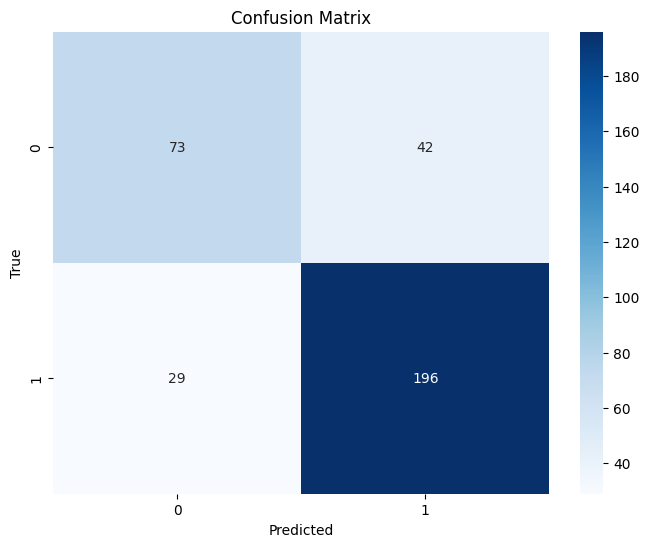

accuracy for class 0: 0.635
accuracy for class 1: 0.871

Evaluating the model on the train set...
auc on train set:  0.7807348603158077
accuracy on train set:  0.8202357563850687
precision on train set:  0.8168441282754828
recall on train set:  0.8202357563850687
f1 score on train set:  0.8165730633877654
balanced accuracy on train set:  0.7807348603158077
logistic loss on train set:  0.4655144195035104
mse on train set:  0.17976424361493124

Scorecard table:
      Feature                                       Bin    Points
0  pLBC Value  [0.0754687169258525, 0.3166823979957318[ -0.417991
1  pBCE Value  [0.0002450886198942, 0.3739177872614725[  0.692312
2  pBCE Value  [0.3739177872614725, 1.9451569659865504[ -0.261797
3  cX2b Value  [0.0036338977515697, 0.3200540244579315[  0.121161
4  cX2b Value   [0.3200540244579315, 0.992175817489624[ -0.129333
5  pUNR Value   [0.1200310010222253, 1.999999999999999[ -0.250858


In [67]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_diff_beyondl1_model, aesthetic_binary_caim_diff_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.2915070056915283 seconds

Evaluating the model on the test set...
test predictions:  [ 0.20042235  0.20042235  0.87116001  0.4520139   0.87116001  0.74752162
  0.74752162  0.20042235  0.61956845  0.4520139   0.87116001  0.87116001
  0.87116001  0.87116001  0.87116001  0.20042235  0.87116001  0.87116001
  0.87116001  0.4520139   0.87116001  0.87116001  0.87116001  0.87116001
  0.87116001  0.87116001  0.87116001  0.87116001  0.87116001  0.49593007
  0.20042235  0.87116001  0.87116001  0.74752162  0.87116001  0.87116001
  0.87116001  0.87116001  0.20042235  0.20042235  0.87116001  0.87116001
  0.87116001  0.87116001  0.4520139   0.60867832  0.74752162  0.87116001
  0.20042235  0.32837552  0.87116001  0.74752162  0.74752162  0.20042235
  0.87116001  0.20042235  0.74752162  0.87116001  0.87116001  0.32837552
  0.87116001  0.87116001  0.20042235  0.61956845  0.61956845  0.74752162
  0.87116001  0.87116001  0.87116001  0.87116001  0.35708677  0.87116001
  0.20042235  0.74752

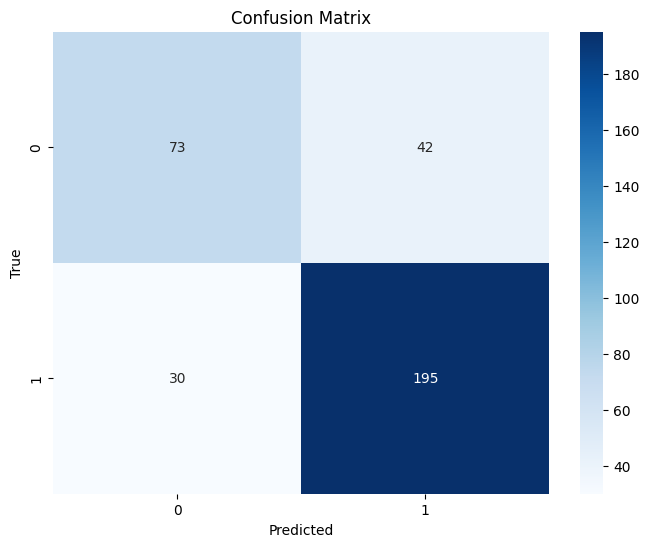

accuracy for class 0: 0.635
accuracy for class 1: 0.867

Evaluating the model on the train set...
auc on train set:  0.782205448551102
accuracy on train set:  0.8212180746561886
precision on train set:  0.817881766346109
recall on train set:  0.8212180746561886
f1 score on train set:  0.8176652367440655
balanced accuracy on train set:  0.7822054485511019
logistic loss on train set:  0.4655144195035104
mse on train set:  0.1787819253438114

Scorecard table:
       Feature                                           Bin        Points
0   pLBC Value  [2.2773158381800327e-05, 0.0754687169258525[  2.177900e-01
1   pLBC Value      [0.0754687169258525, 0.3166823979957318[ -4.191461e-01
2   pLBC Value                     [0.3166823979957318, inf[ -3.696869e-08
3   pBCE Value      [0.0002450886198942, 0.3739177872614725[  2.177900e-01
4   pBCE Value      [0.3739177872614725, 1.9451569659865504[ -2.624817e-01
5   pBCE Value                     [1.9451569659865504, inf[ -8.668817e-07
6   cX2b Value

In [68]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_diff_adaptivelasso_model, aesthetic_binary_caim_diff_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 0.00046415888336127724}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

Execution time: 14.993426322937012 seconds

Evaluating the model on the test set...
test predictions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1]
     True Value  Prediction
0             0           1
1             0           1
2             1           1
3             1           1
4             1           1
..          ...         ...
335       

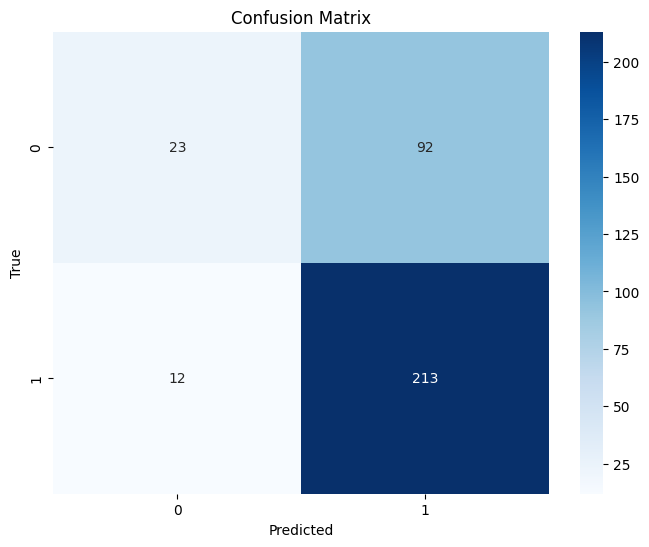

accuracy for class 0: 0.200
accuracy for class 1: 0.947

Evaluating the model on the train set...
auc on train set:  1.0
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.44013896417262915
mse on train set:  0.0

Scorecard table:
         Feature                                             Bin    Points
0     pLBC Value  [3.2239679535846356e-05, 7.14503313927462e-05[ -2.184477
1     pLBC Value  [7.14503313927462e-05, 0.00011612788529674999[  1.040974
2     pLBC Value   [0.00011612788529674999, 0.00019454810607185[  1.039313
3     pLBC Value        [0.00019454810607185, 0.000259873127544[ -2.184467
4     pLBC Value     [0.000259873127544, 0.00027741600466875003[ -2.184460
...          ...                                             ...       ...
4063  pUNR Value        [0.5453701567805891, 0.6071746191272416[ -2.184472
4064  pUNR Value        [0.60717461912724

In [69]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_1ook_ml_model, aesthetic_binary_infbins_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 1000.0, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 1.1626629829406738 seconds

Evaluating the model on the test set...
test predictions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1]
     True Value  Prediction
0             0           1
1             0           1
2             1           1
3             1           1
4             1           1
..          ...         ...
335       

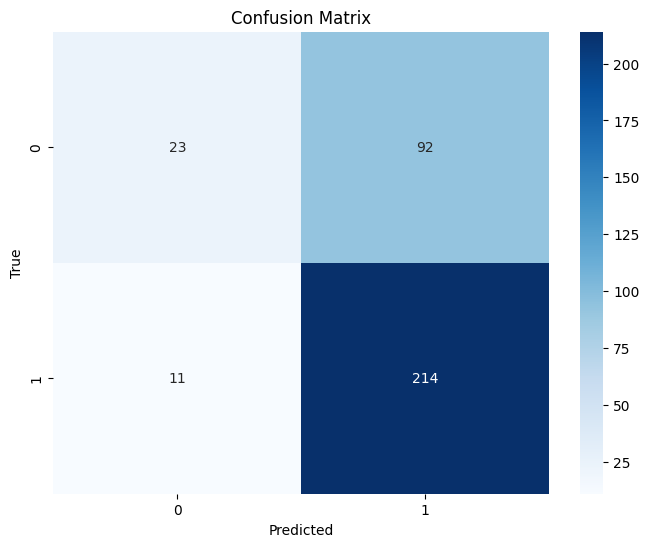

accuracy for class 0: 0.200
accuracy for class 1: 0.951

Evaluating the model on the train set...
auc on train set:  1.0
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.44013896417262915
mse on train set:  0.0

Scorecard table:
         Feature                                             Bin    Points
0     pLBC Value  [3.2239679535846356e-05, 7.14503313927462e-05[ -0.250000
1     pLBC Value  [7.14503313927462e-05, 0.00011612788529674999[  0.125228
2     pLBC Value   [0.00011612788529674999, 0.00019454810607185[  0.125149
3     pLBC Value        [0.00019454810607185, 0.000259873127544[ -0.250000
4     pLBC Value     [0.000259873127544, 0.00027741600466875003[ -0.250000
...          ...                                             ...       ...
4063  pUNR Value        [0.5453701567805891, 0.6071746191272416[ -0.250000
4064  pUNR Value        [0.60717461912724

In [70]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_1ook_mm_model, aesthetic_binary_infbins_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params={'C': 0.25}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.05350184440612793 seconds

Evaluating the model on the test set...
test predictions:  [0.66794844 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844
 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844
 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844
 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844
 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844
 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844
 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844
 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844
 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844
 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844
 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844
 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844
 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844 0.66794844
 0.66794844 0.66794844 0.

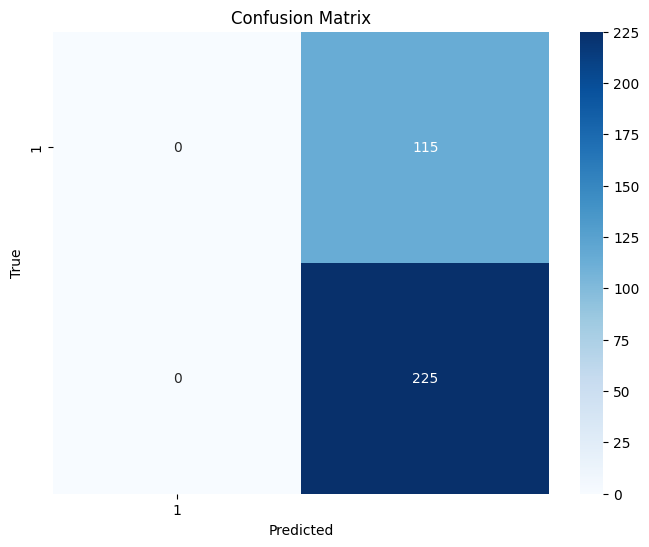

accuracy for class 0: 0.000
accuracy for class 1: 1.000

Evaluating the model on the train set...
auc on train set:  0.5044117647058823
accuracy on train set:  0.668958742632613
precision on train set:  0.7788709630590263
recall on train set:  0.668958742632613
f1 score on train set:  0.5392812160316609
balanced accuracy on train set:  0.5044117647058823
logistic loss on train set:  0.44013896417262915
mse on train set:  0.33104125736738704

Scorecard table:
      Feature                                         Bin    Points
0  pBCE Value    [0.0802092488000813, 0.0802473128307357[ -0.657171
1  pBCE Value  [0.08360432009067531, 0.08400237965172344[ -0.657171
2  pUNR Value                    [1.451889499543949, inf[ -0.657171


In [71]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_1ook_beyondl1_model, aesthetic_binary_infbins_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': SCAD(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 1.2900009155273438 seconds

Evaluating the model on the test set...
test predictions:  [ 5.00000000e-01  7.50000000e-01  7.50000000e-01  5.00000000e-01
  7.50000000e-01  1.00000000e+00  7.50000000e-01  5.00000000e-01
  7.50000000e-01  7.50000000e-01  7.50000000e-01  1.00000000e+00
  5.00000000e-01  5.00000000e-01  5.00000000e-01  7.50000000e-01
  7.50000000e-01  7.50000000e-01  1.00000000e+00  5.00000000e-01
  5.00000000e-01  5.00000000e-01  1.00000000e+00  5.00000000e-01
  7.50000000e-01  1.00000000e+00  1.00000000e+00  5.00000000e-01
  1.00000000e+00  5.00000000e-01  2.50000000e-01  1.00000000e+00
  7.50000000e-01  5.00000000e-01  5.00000000e-01  7.50000000e-01
  5.00000000e-01  7.50000000e-01  7.50000000e-01  2.50000000e-01
  7.50000000e-01  1.00000000e+00  7.50000000e-01  1.00000000e+00
  5.00000000e-01  7.50000000e-01  5.00000000e-01  1.00000000e+00
  5.00000000e-01  5.00000000e-01  1.00000000e+00  1.00000000e+00
  1.00000000e+00  2.50000000e-01  5.00000000e-01  5.

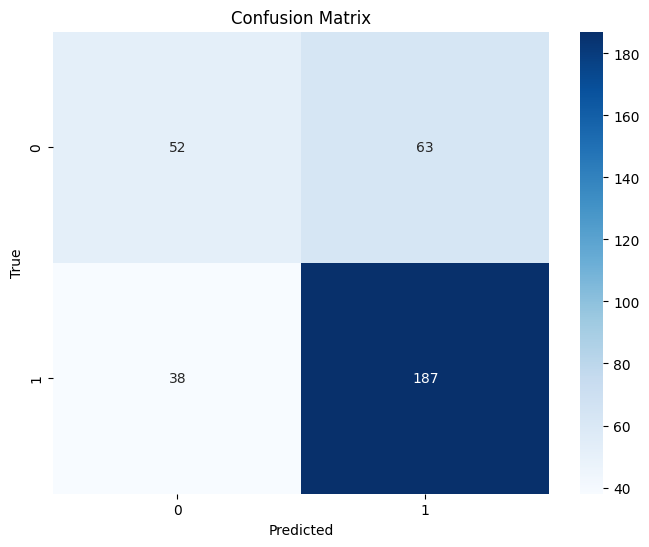

accuracy for class 0: 0.452
accuracy for class 1: 0.831

Evaluating the model on the train set...
auc on train set:  1.0
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.44013896417262915
mse on train set:  0.0

Scorecard table:
         Feature                                             Bin        Points
0     pLBC Value  [3.2239679535846356e-05, 7.14503313927462e-05[ -4.440751e-13
1     pLBC Value  [7.14503313927462e-05, 0.00011612788529674999[  2.500000e-01
2     pLBC Value   [0.00011612788529674999, 0.00019454810607185[  2.500000e-01
3     pLBC Value        [0.00019454810607185, 0.000259873127544[ -4.440751e-13
4     pLBC Value     [0.000259873127544, 0.00027741600466875003[ -4.440751e-13
...          ...                                             ...           ...
4063  pUNR Value        [0.5453701567805891, 0.6071746191272416[  1.480125e-13
4064  pUN

In [72]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_1ook_adaptivelasso_model, aesthetic_binary_infbins_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-10}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7466145078721145
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7535110595962523
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7475949000289772
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7642953733217425
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7809910170964937
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7996571042209986
testing parameters: {'C': 1.010101010101

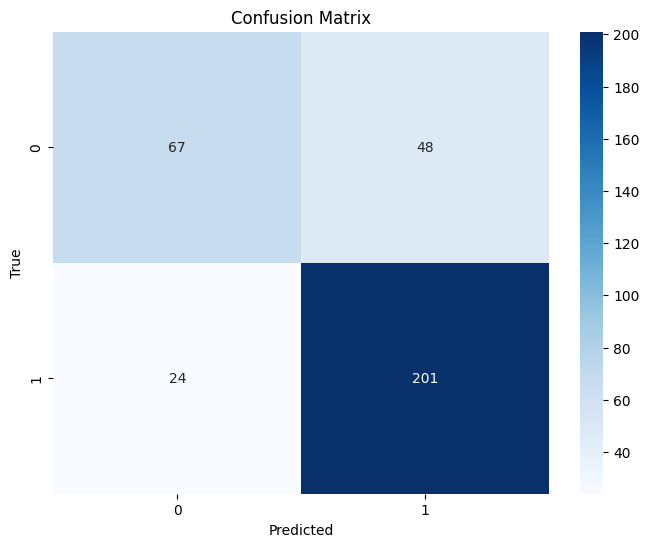

accuracy for class 0: 0.583
accuracy for class 1: 0.893

Evaluating the model on the train set...
auc on train set:  0.8573008849557522
accuracy on train set:  0.8929273084479371
precision on train set:  0.894664957103849
recall on train set:  0.8929273084479371
f1 score on train set:  0.8899561832583279
balanced accuracy on train set:  0.8573008849557522
logistic loss on train set:  0.4490950072305872
mse on train set:  0.10707269155206287

Scorecard table:
        Feature                                             Bin    Points
0    pLBC Value  [7.14503313927462e-05, 0.00011612788529674999[  1.044727
1    pLBC Value   [0.00011612788529674999, 0.00019454810607185[  0.748338
2    pLBC Value        [0.00019454810607185, 0.000259873127544[  0.444308
3    pLBC Value     [0.000259873127544, 0.00027741600466875003[  0.293647
4    pLBC Value     [0.00027741600466875003, 0.000369098864304[  0.008935
..          ...                                             ...       ...
207  pUNR Value    

In [73]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_diff_ml_model, aesthetic_binary_infbins_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8134164010431759
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8134164010431759
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8183280208635179
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8153820148749155
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8153868443929296
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.809499661933739
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.794759972954699
testing parameters: {'C': 0.125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7672462088283589
testing parameters: {'C': 0.25}
  fold  1
  fo

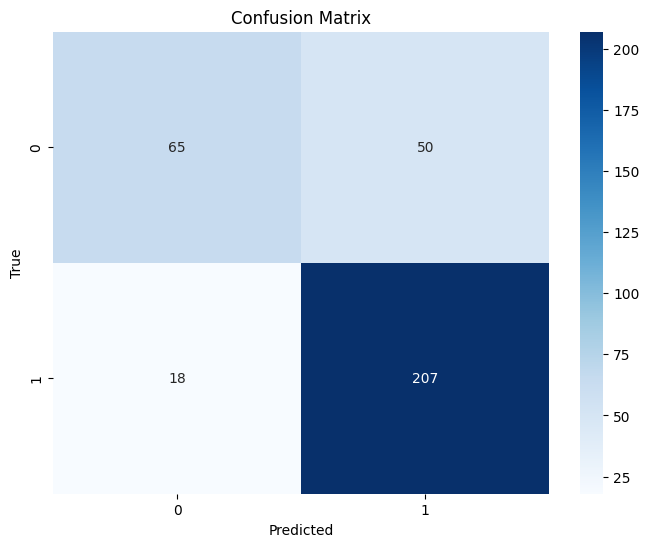

accuracy for class 0: 0.565
accuracy for class 1: 0.920

Evaluating the model on the train set...
auc on train set:  0.7771169529758807
accuracy on train set:  0.831041257367387
precision on train set:  0.8316223600196464
recall on train set:  0.831041257367387
f1 score on train set:  0.8234126257638891
balanced accuracy on train set:  0.7771169529758806
logistic loss on train set:  0.4554388710633076
mse on train set:  0.16895874263261296

Scorecard table:
         Feature                                             Bin        Points
0     pLBC Value  [3.2239679535846356e-05, 7.14503313927462e-05[ -1.387779e-17
1     pLBC Value  [7.14503313927462e-05, 0.00011612788529674999[  3.906250e-03
2     pLBC Value   [0.00011612788529674999, 0.00019454810607185[  3.906250e-03
3     pLBC Value        [0.00019454810607185, 0.000259873127544[  3.906250e-03
4     pLBC Value     [0.000259873127544, 0.00027741600466875003[  3.906250e-03
...          ...                                             ...

In [74]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_diff_mm_model, aesthetic_binary_infbins_diff_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x17b6b5b50>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x17b6b5e10>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17b79f450>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8173476287066551
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x17b6b5b50>, 'penalty': <skglm.penalties.separable.SCAD object at 0x17b4b6750>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17b79f450>}
  fold  1
  fold  2
BEYOND_L1 ZeroDivisionError: division by zero
  fold  3
  fold  4
  fold  5
  mean score: 0.6565584854631508
best parameters:  {'datafit': <skglm.datafits.single_task.Huber object at 0x17b6b5b50>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x17b6b5e10>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17b79f450>}
best score:  0.8173476287066551
Execution time: 3.4024839401245117 seconds

Evaluating the mo

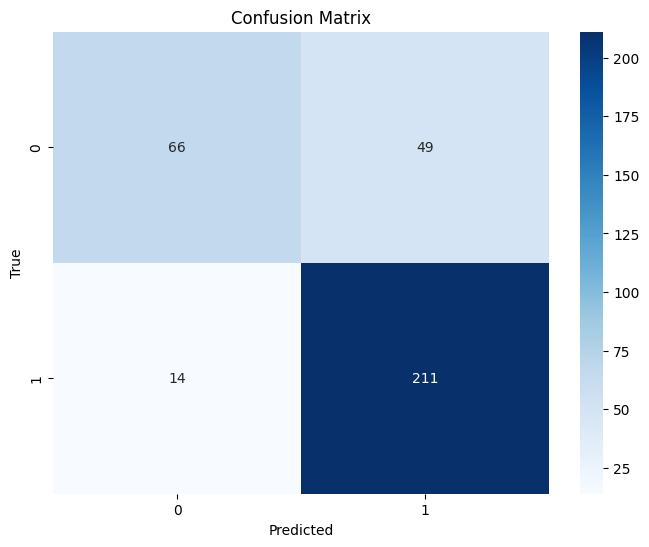

accuracy for class 0: 0.574
accuracy for class 1: 0.938

Evaluating the model on the train set...
auc on train set:  0.7793119902828388
accuracy on train set:  0.8300589390962672
precision on train set:  0.8292409226892868
recall on train set:  0.8300589390962672
f1 score on train set:  0.8233583378087912
balanced accuracy on train set:  0.7793119902828388
logistic loss on train set:  0.45730471336704887
mse on train set:  0.16994106090373282

Scorecard table:
      Feature                                          Bin    Points
0  pLBC Value  [0.01711309255033485, 0.017153809338576298[ -0.107875
1  pLBC Value     [0.0574736184650819, 0.0576304309488336[ -0.169464
2  pLBC Value   [0.09846316767143681, 0.09863952942081425[ -0.304628
3  pLBC Value    [0.09965141204223779, 0.0997189440084791[ -0.086269
4  pBCE Value   [0.27689448311404663, 0.27733586776993985[ -0.184065
5  cX2b Value    [0.14469774067401886, 0.1450453773140907[ -0.061335
6  pUNR Value   [0.11989595980342224, 0.120067301337

In [75]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_diff_beyondl1_model, aesthetic_binary_infbins_diff_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-10}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7171592775041051
testing parameters: {'alpha': 2.1544346900318866e-09}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7171592775041051
testing parameters: {'alpha': 4.641588833612773e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7171592775041051
testing parameters: {'alpha': 1e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7171592775041051
testing parameters: {'alpha': 2.1544346900318823e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7171592775041051
testing parameters: {'alpha': 0.00046415888336127724}
  fold  1
AdaptiveLasso infeasible: minimize 0.0006142506142506142 @ quad_over_lin([[1.00 1.00 ... 0.00 0.00]
 [1.00 1.00 ... 0.00 0.00]
 ...
 [1.00 1.00 ... 0.00 0.00]
 [1.00 1.00 ... 0.00 0.00]] @ var4051 + -[0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 

/opt/homebrew/lib/python3.11/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


  fold  5
  mean score: 0.4938182169419492
testing parameters: {'alpha': 0.21544346900318778}
  fold  1
  fold  2
  fold  3
  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


  mean score: 0.6121269197334106
testing parameters: {'alpha': 4.641588833612772}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3339515116391384
testing parameters: {'alpha': 100.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3339515116391384
best parameters:  {'alpha': 1e-10}
best score:  0.7171592775041051
Execution time: 443.1829402446747 seconds

Evaluating the model on the test set...
test predictions:  [ 2.49521356e-01  8.17257243e-01  9.95299614e-01  2.57470464e-01
  9.84892889e-01  1.18107339e+00  2.20801970e-01  2.75365532e-02
  1.46370125e+00  5.40429930e-01  8.04667221e-01  1.14413876e+00
  6.50774662e-01  6.14560255e-01  7.34780191e-01 -5.58231464e-02
  9.62562984e-01  9.11769064e-01  1.12992998e+00 -1.67893437e-01
  8.15097104e-01  8.75938621e-01  1.22776783e+00  4.23034615e-01
  1.36410762e+00  5.32443325e-01  8.97067373e-01  5.44318415e-01
  1.18015184e+00  3.44131479e-01 -3.99738912e-01  1.27957681e+00
  7.97412443e-01  1.535556

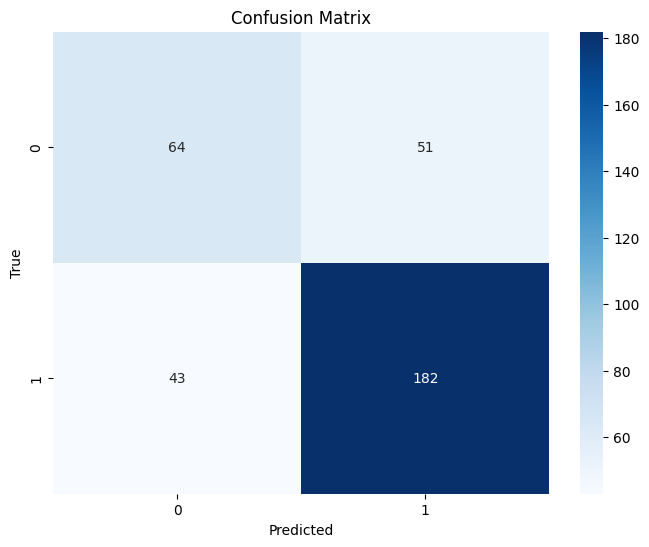

accuracy for class 0: 0.557
accuracy for class 1: 0.809

Evaluating the model on the train set...
auc on train set:  1.0
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.44013896417262915
mse on train set:  0.0

Scorecard table:
         Feature                                             Bin    Points
0     pLBC Value  [3.2239679535846356e-05, 7.14503313927462e-05[  0.024220
1     pLBC Value  [7.14503313927462e-05, 0.00011612788529674999[  0.148755
2     pLBC Value   [0.00011612788529674999, 0.00019454810607185[  0.176086
3     pLBC Value        [0.00019454810607185, 0.000259873127544[  0.041527
4     pLBC Value     [0.000259873127544, 0.00027741600466875003[  0.061359
...          ...                                             ...       ...
4063  pUNR Value        [0.5453701567805891, 0.6071746191272416[ -0.123168
4064  pUNR Value        [0.60717461912724

In [76]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_diff_adaptivelasso_model, aesthetic_binary_infbins_diff_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None #{'alpha': 1e-08}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

### author = cmavioso

#### load dataset

In [11]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_objective = aesthetic_evaluation_data['Objective Evaluation']

# get data from author = cmavioso
aesthetic_evaluation_data_cmavioso = aesthetic_evaluation_data[aesthetic_evaluation_data['Author'] == 'cmavioso']
aesthetic_evaluation_data_cmavioso_objective = aesthetic_evaluation_data_cmavioso['Objective Evaluation']
aesthetic_evaluation_data_cmavioso = aesthetic_evaluation_data_cmavioso.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_data_cmavioso_X = aesthetic_evaluation_data_cmavioso.drop(columns='Subjective Evaluation')
aesthetic_evaluation_data_cmavioso_y = aesthetic_evaluation_data_cmavioso['Subjective Evaluation']

aesthetic_evaluation_data_cmavioso.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,pBAD Value,pBOD Value,cX2L Value,cX2a Value,cX2b Value,cX2Lab Value,cEMDL Value,cEMDa Value,cEMDb Value,cEMDLab Value
191,Fair,3.230112,2.621613,0.129300,2.750914,2.650489,27.764303,70.434258,0.154914,0.111813,...,0.170367,0.432197,0.091925,0.022541,0.148024,0.075360,1.536156,0.085017,0.479079,0.193861
211,Excellent,1.623488,0.061330,0.444349,0.383019,1.035294,3.397046,79.705810,0.079565,0.002832,...,0.019840,0.465520,0.014945,0.033902,0.023078,0.004610,0.228967,0.078385,0.062195,0.027221
213,Good,3.990942,0.485167,0.503200,0.988367,2.610970,74.659366,127.703185,0.131264,0.017337,...,0.248912,0.425759,0.236860,0.048242,0.154148,0.210669,3.494328,0.213126,1.704026,0.526204
215,Good,3.722984,0.963986,0.072948,1.036934,1.415178,39.963683,54.495397,0.145328,0.036005,...,0.169951,0.231748,0.138631,0.028689,0.062934,0.081737,1.033011,0.104326,0.213321,0.156273
218,Excellent,0.535671,0.404757,0.510822,0.106065,2.104842,30.368044,58.971882,0.021603,0.014809,...,0.113466,0.220341,0.124781,0.054135,0.008063,0.042476,0.694389,0.176624,0.042199,0.091022


In [12]:
# select features by hand
aesthetic_evaluation_data_cmavioso_X = aesthetic_evaluation_data_cmavioso_X[['pLBC Value', 'pBCE Value', 'cX2b Value', 'pUNR Value']]

In [13]:
# create binary target from aesthetic evaluation, by joining good and excellent, and fair and poor
aesthetic_evaluation_binary_y = aesthetic_evaluation_data_cmavioso_y.map({'Excellent': 1, 'Good': 1, 'Fair': 0, 'Poor': 0})

# distribution
print(aesthetic_evaluation_binary_y.value_counts())

# proportion of positive class
print("proportion of positive class: ", aesthetic_evaluation_binary_y.mean())

Subjective Evaluation
1    189
0     48
Name: count, dtype: int64
proportion of positive class:  0.7974683544303798


In [14]:
print(f"Number of features: {len(aesthetic_evaluation_data_cmavioso.columns)}")

print(f"Number of observations for cmavioso: {len(aesthetic_evaluation_data_cmavioso)}")

print("\ncmavioso target variable distribution:  ", aesthetic_evaluation_data_cmavioso_y.value_counts())

acc_cmavioso = accuracy_score(aesthetic_evaluation_data_cmavioso_y, aesthetic_evaluation_data_cmavioso_objective)
print(f'Accuracy of objective evaluation for cmavioso: {acc_cmavioso}') 


Number of features: 23
Number of observations for cmavioso: 237

cmavioso target variable distribution:   Subjective Evaluation
Good         108
Excellent     81
Fair          36
Poor          12
Name: count, dtype: int64
Accuracy of objective evaluation for cmavioso: 0.679324894514768


In [15]:
# get categorical columns
categorical_columns = aesthetic_evaluation_data_cmavioso_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_data_cmavioso_X[col] = aesthetic_evaluation_data_cmavioso_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_data_cmavioso_X[col].unique()}")

Categorical columns: []


#### CAIM & 1ook

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1


  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8814285714285715
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8757142857142858
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8812698412698413
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8812698412698413
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8812698412698413
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.86984126984127
testing parameters: {'C': 1.0101010101010102, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4


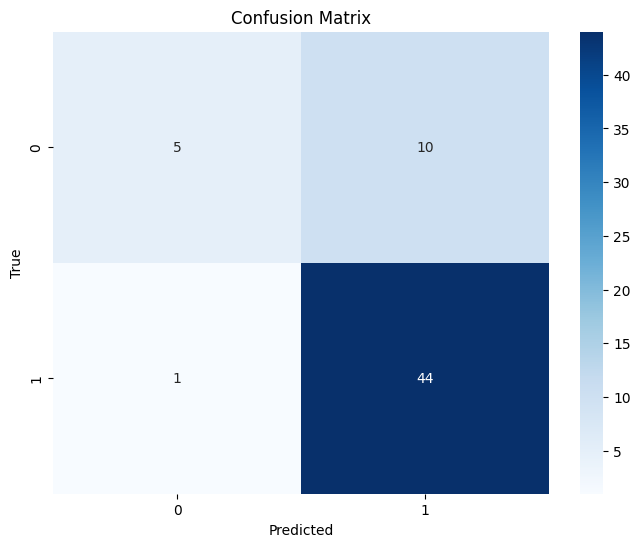

accuracy for class 0: 0.333
accuracy for class 1: 0.978

Evaluating the model on the train set...
auc on train set:  0.7436868686868687
accuracy on train set:  0.8870056497175142
precision on train set:  0.8810455081641523
recall on train set:  0.8870056497175142
f1 score on train set:  0.8767106089139988
balanced accuracy on train set:  0.7436868686868687
logistic loss on train set:  0.3926727792840067
mse on train set:  0.11299435028248588

Scorecard table:
       Feature                                           Bin    Points
0   pLBC Value  [2.2773158381800327e-05, 0.0981386095126271[  0.815724
1   pLBC Value      [0.0981386095126271, 0.3087053362016711[ -1.597547
2   pLBC Value                     [0.3087053362016711, inf[ -3.465802
3   pBCE Value      [0.0008385739212827, 0.3542441933765806[  0.405431
4   pBCE Value      [0.3542441933765806, 1.4011041290620987[ -1.712667
5   pBCE Value                     [1.4011041290620987, inf[ -2.337409
6   cX2b Value        [0.00365925533697

In [82]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_1ook_ml_model, aesthetic_binary_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params=None,
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8641269841269843
testing parameters: {'C': 0.125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8417460317460318
testing parameters: {'C': 0.25}
  fold  1
  

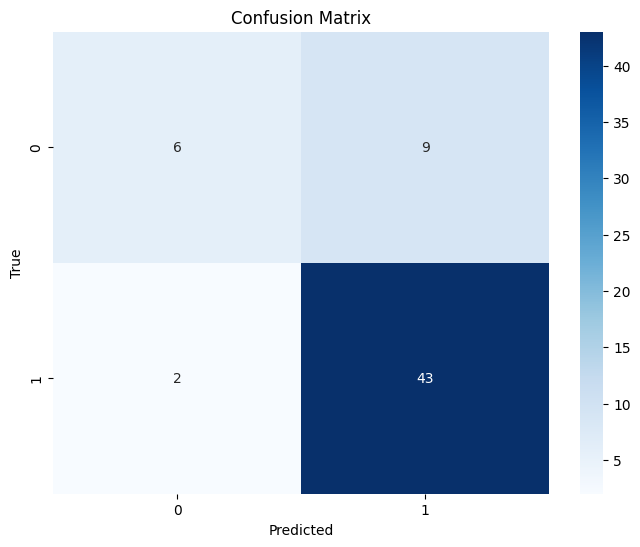

accuracy for class 0: 0.400
accuracy for class 1: 0.956

Evaluating the model on the train set...
auc on train set:  0.8055555555555556
accuracy on train set:  0.8926553672316384
precision on train set:  0.8894038971520811
recall on train set:  0.8926553672316384
f1 score on train set:  0.8906528654912369
balanced accuracy on train set:  0.8055555555555556
logistic loss on train set:  0.40125776217760495
mse on train set:  0.10734463276836158

Scorecard table:
Empty DataFrame
Columns: [Feature, Bin, Points]
Index: []


In [83]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_1ook_mm_model, aesthetic_binary_caim_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params=None
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x17b875f50>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x178207710>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17b7b1590>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8644444444444446
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x17b875f50>, 'penalty': <skglm.penalties.separable.SCAD object at 0x178205cd0>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17b7b1590>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8755555555555556
best parameters:  {'datafit': <skglm.datafits.single_task.Huber object at 0x17b875f50>, 'penalty': <skglm.penalties.separable.SCAD object at 0x178205cd0>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17b7b1590>}
best score:  0.8755555555555556
Execution time: 0.25650572776794434 seconds

Evaluating the model on the test set...
test predictions:  [ 0.9484

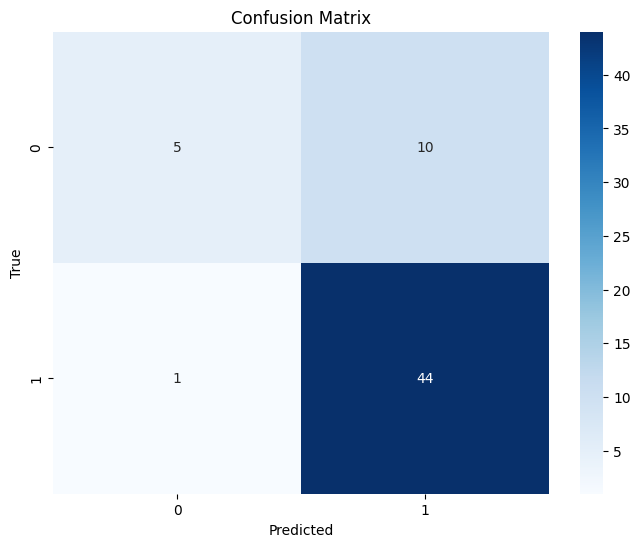

accuracy for class 0: 0.333
accuracy for class 1: 0.978

Evaluating the model on the train set...
auc on train set:  0.7436868686868687
accuracy on train set:  0.8870056497175142
precision on train set:  0.8810455081641523
recall on train set:  0.8870056497175142
f1 score on train set:  0.8767106089139988
balanced accuracy on train set:  0.7436868686868687
logistic loss on train set:  0.3926727792840067
mse on train set:  0.11299435028248588

Scorecard table:
      Feature                                       Bin    Points
0  pLBC Value  [0.0981386095126271, 0.3087053362016711[ -0.395572
1  pBCE Value  [0.0008385739212827, 0.3542441933765806[  0.833874
2  pBCE Value  [0.3542441933765806, 1.4011041290620987[  0.507544
3  cX2b Value    [0.00365925533697, 0.3176750540733337[  0.081468
4  cX2b Value   [0.3176750540733337, 0.635047435760498[ -0.115091
5  cX2b Value                  [0.635047435760498, inf[  0.457755
6  pUNR Value  [0.0006986937099631, 0.1515441341165825[  0.033098
7  pUNR 

In [84]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_1ook_beyondl1_model, aesthetic_binary_caim_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params=None)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-10}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8757142857142858
testing parameters: {'alpha': 2.1544346900318866e-09}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8757142857142858
testing parameters: {'alpha': 4.641588833612773e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8757142857142858
testing parameters: {'alpha': 1e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8757142857142858
testing parameters: {'alpha': 2.1544346900318823e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8757142857142858
testing parameters: {'alpha': 0.00046415888336127724}
  fold  1
AdaptiveLasso infeasible: minimize 0.0035460992907801418 @ quad_over_lin([[1.00 0.00 ... 0.00 0.00]
 [1.00 0.00 ... 0.00 0.00]
 ...
 [1.00 0.00 ... 0.00 0.00]
 [1.00 0.00 ... 0.00 0.00]] @ var6346 + -[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 

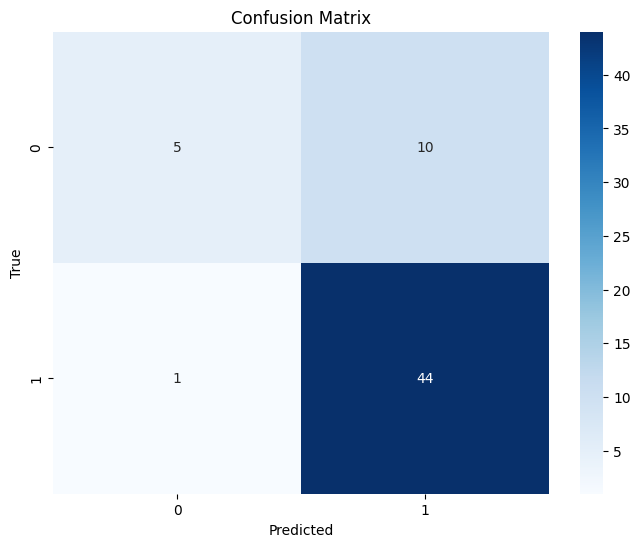

accuracy for class 0: 0.333
accuracy for class 1: 0.978

Evaluating the model on the train set...
auc on train set:  0.7436868686868687
accuracy on train set:  0.8870056497175142
precision on train set:  0.8810455081641523
recall on train set:  0.8870056497175142
f1 score on train set:  0.8767106089139988
balanced accuracy on train set:  0.7436868686868687
logistic loss on train set:  0.3926727792840067
mse on train set:  0.11299435028248588

Scorecard table:
       Feature                                           Bin    Points
0   pLBC Value  [2.2773158381800327e-05, 0.0981386095126271[  0.300536
1   pLBC Value      [0.0981386095126271, 0.3087053362016711[ -0.099287
2   pLBC Value                     [0.3087053362016711, inf[  0.174192
3   pBCE Value      [0.0008385739212827, 0.3542441933765806[  0.292600
4   pBCE Value      [0.3542441933765806, 1.4011041290620987[ -0.027055
5   pBCE Value                     [1.4011041290620987, inf[  0.109896
6   cX2b Value        [0.00365925533697

In [85]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_1ook_adaptivelasso_model, aesthetic_binary_caim_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params=None
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.886984126984127
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8699999999999999
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8812698412698413
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8755555555555556
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8698412698412697
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8698412698412697
testing parameters: {'C': 1.0101010101010

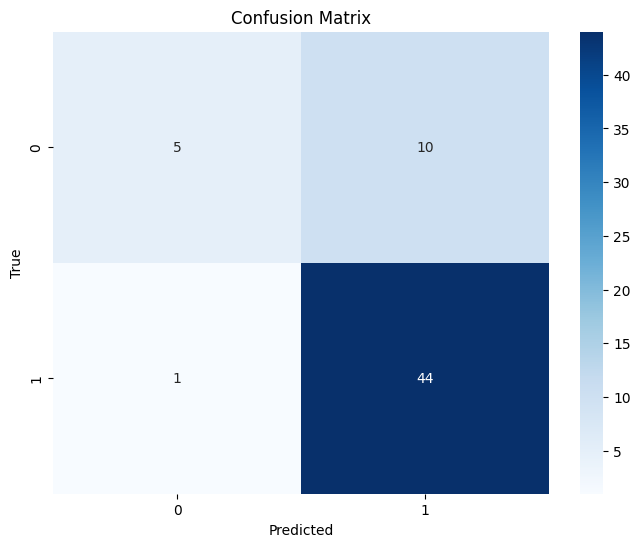

accuracy for class 0: 0.333
accuracy for class 1: 0.978

Evaluating the model on the train set...
auc on train set:  0.7436868686868687
accuracy on train set:  0.8870056497175142
precision on train set:  0.8810455081641523
recall on train set:  0.8870056497175142
f1 score on train set:  0.8767106089139988
balanced accuracy on train set:  0.7436868686868687
logistic loss on train set:  0.3926727792840067
mse on train set:  0.11299435028248588

Scorecard table:
       Feature                                           Bin    Points
0   pLBC Value  [2.2773158381800327e-05, 0.0981386095126271[  0.428939
1   pLBC Value      [0.0981386095126271, 0.3087053362016711[ -2.414155
2   pLBC Value                     [0.3087053362016711, inf[ -0.179280
3   pBCE Value      [0.0008385739212827, 0.3542441933765806[  0.428939
4   pBCE Value      [0.3542441933765806, 1.4011041290620987[ -2.115060
5   pBCE Value                     [1.4011041290620987, inf[ -0.156812
6   cX2b Value        [0.00365925533697

In [16]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_diff_ml_model, aesthetic_binary_caim_diff_ml_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8753968253968253
testing parameters: {'C': 0.25}
  fold  1
  

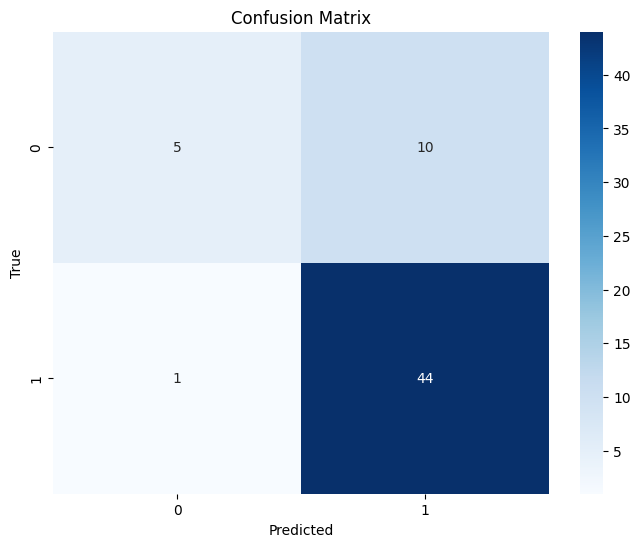

accuracy for class 0: 0.333
accuracy for class 1: 0.978

Evaluating the model on the train set...
auc on train set:  0.7285353535353536
accuracy on train set:  0.8813559322033898
precision on train set:  0.8746194537406888
recall on train set:  0.8813559322033898
f1 score on train set:  0.869367325841694
balanced accuracy on train set:  0.7285353535353536
logistic loss on train set:  0.3926727792840067
mse on train set:  0.11864406779661017

Scorecard table:
       Feature                                           Bin        Points
0   pLBC Value  [2.2773158381800327e-05, 0.0981386095126271[ -3.330669e-16
1   pLBC Value      [0.0981386095126271, 0.3087053362016711[ -9.581020e-01
2   pLBC Value                     [0.3087053362016711, inf[ -8.869485e-04
3   pBCE Value      [0.0008385739212827, 0.3542441933765806[ -3.330669e-16
4   pBCE Value      [0.3542441933765806, 1.4011041290620987[ -2.081020e-01
5   pBCE Value                     [1.4011041290620987, inf[ -5.398817e-04
6   cX2b Val

In [17]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_diff_mm_model, aesthetic_binary_caim_diff_mm_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x158417d50>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x10765d090>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x1583b6d90>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8641269841269841
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x158417d50>, 'penalty': <skglm.penalties.separable.SCAD object at 0x14ffbd310>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x1583b6d90>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.86984126984127
best parameters:  {'datafit': <skglm.datafits.single_task.Huber object at 0x158417d50>, 'penalty': <skglm.penalties.separable.SCAD object at 0x14ffbd310>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x1583b6d90>}
best score:  0.86984126984127
Execution time: 0.25339484214782715 seconds

Evaluating the model on the test set...
test predictions:  [ 0.94776278

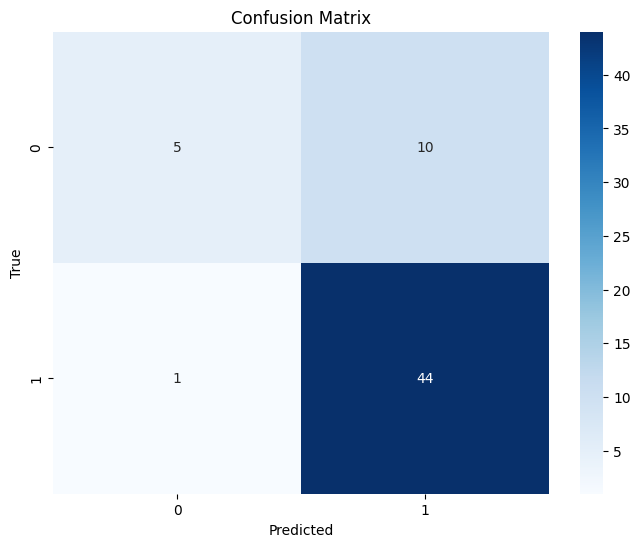

accuracy for class 0: 0.333
accuracy for class 1: 0.978

Evaluating the model on the train set...
auc on train set:  0.7436868686868687
accuracy on train set:  0.8870056497175142
precision on train set:  0.8810455081641523
recall on train set:  0.8870056497175142
f1 score on train set:  0.8767106089139988
balanced accuracy on train set:  0.7436868686868687
logistic loss on train set:  0.3926727792840067
mse on train set:  0.11299435028248588

Scorecard table:
      Feature                                       Bin    Points
0  pLBC Value  [0.0981386095126271, 0.3087053362016711[ -0.399823
1  pLBC Value                 [0.3087053362016711, inf[  0.273480
2  pBCE Value  [0.0008385739212827, 0.3542441933765806[  0.807953
3  pBCE Value  [0.3542441933765806, 1.4011041290620987[ -0.319656
4  cX2b Value    [0.00365925533697, 0.3176750540733337[  0.089907
5  cX2b Value   [0.3176750540733337, 0.635047435760498[ -0.182956
6  cX2b Value                  [0.635047435760498, inf[  0.554000
7  pUNR 

In [18]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_diff_beyondl1_model, aesthetic_binary_caim_diff_beyondl1_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-10}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8699999999999999
testing parameters: {'alpha': 2.1544346900318866e-09}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8699999999999999
testing parameters: {'alpha': 4.641588833612773e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8699999999999999
testing parameters: {'alpha': 1e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8699999999999999
testing parameters: {'alpha': 2.1544346900318823e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8699999999999999
testing parameters: {'alpha': 0.00046415888336127724}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8699999999999999
testing parameters: {'alpha': 0.01}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8585714285714285
testing parameters: {'alpha': 0.21544346900318778}
  fold  1
  fold  2
  fold  3
  fold  4
  f

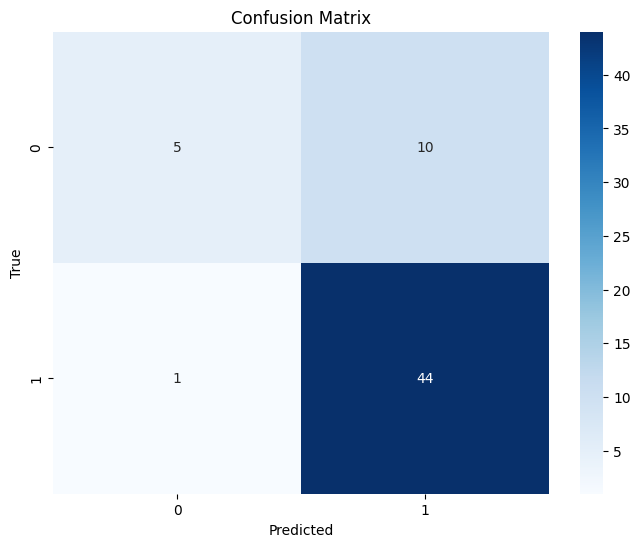

accuracy for class 0: 0.333
accuracy for class 1: 0.978

Evaluating the model on the train set...
auc on train set:  0.7436868686868687
accuracy on train set:  0.8870056497175142
precision on train set:  0.8810455081641523
recall on train set:  0.8870056497175142
f1 score on train set:  0.8767106089139988
balanced accuracy on train set:  0.7436868686868687
logistic loss on train set:  0.3926727792840067
mse on train set:  0.11299435028248588

Scorecard table:
       Feature                                           Bin    Points
0   pLBC Value  [2.2773158381800327e-05, 0.0981386095126271[  0.236941
1   pLBC Value      [0.0981386095126271, 0.3087053362016711[ -0.399822
2   pLBC Value                     [0.3087053362016711, inf[  0.273479
3   pBCE Value      [0.0008385739212827, 0.3542441933765806[  0.236941
4   pBCE Value      [0.3542441933765806, 1.4011041290620987[ -0.319655
5   pBCE Value                     [1.4011041290620987, inf[  0.136739
6   cX2b Value        [0.00365925533697

In [19]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_diff_adaptivelasso_model, aesthetic_binary_caim_diff_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7907936507936508
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7742857142857142
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.773809523809524
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8128571428571428
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8076190476190476
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 1.0101010101010

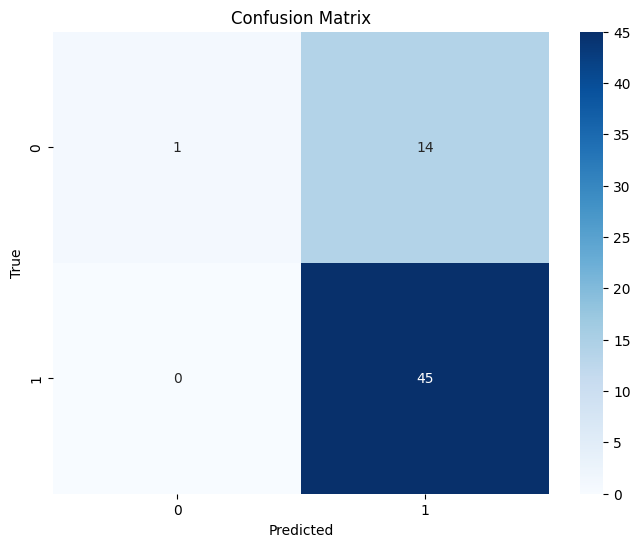

accuracy for class 0: 0.067
accuracy for class 1: 1.000

Evaluating the model on the train set...
auc on train set:  1.0
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.38408779639040835
mse on train set:  0.0

Scorecard table:
        Feature                                           Bin    Points
0    pLBC Value  [9.937413370440016e-05, 0.00031052608986985[  0.117378
1    pLBC Value     [0.00031052608986985, 0.0007852672828238[  0.117486
2    pLBC Value   [0.0007852672828238, 0.0011387378848024998[  0.117385
3    pLBC Value  [0.0011387378848024998, 0.00129282644691335[  0.117376
4    pLBC Value    [0.00129282644691335, 0.00163561965673815[  0.117328
..          ...                                           ...       ...
699  pUNR Value      [0.2327464503736309, 0.2668599298159203[  0.117511
700  pUNR Value      [0.2668599298159203, 0.2847193509169301[  0.

In [90]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_1ook_ml_model, aesthetic_binary_infbins_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params=None
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.25}
  fold  1
  

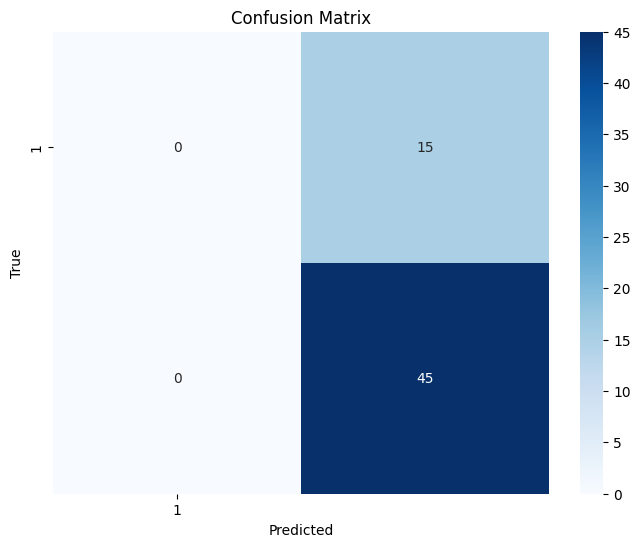

accuracy for class 0: 0.000
accuracy for class 1: 1.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.8135593220338984
precision on train set:  0.6618787704682563
recall on train set:  0.8135593220338984
f1 score on train set:  0.7299223823855535
balanced accuracy on train set:  0.5
logistic loss on train set:  0.38408779639040835
mse on train set:  0.1864406779661017

Scorecard table:
        Feature                                           Bin    Points
0    pLBC Value  [9.937413370440016e-05, 0.00031052608986985[  0.000244
1    pLBC Value     [0.00031052608986985, 0.0007852672828238[  0.000244
2    pLBC Value   [0.0007852672828238, 0.0011387378848024998[  0.000244
3    pLBC Value  [0.0011387378848024998, 0.00129282644691335[  0.000244
4    pLBC Value    [0.00129282644691335, 0.00163561965673815[  0.000244
..          ...                                           ...       ...
651  pUNR Value      [0.2327464503736309, 0.2668599298159203[ 

In [91]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_1ook_mm_model, aesthetic_binary_infbins_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params=None
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x17b0c7110>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x17b0c5f50>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17b4bf450>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x17b0c7110>, 'penalty': <skglm.penalties.separable.SCAD object at 0x17b0c45d0>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17b4bf450>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7965079365079365
best parameters:  {'datafit': <skglm.datafits.single_task.Huber object at 0x17b0c7110>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x17b0c5f50>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17b4bf450>}
best score:  0.8133333333333332
Execution time: 0.5230000019073486 seconds

Evaluating the model on the test set...
test predictions:  [0.8

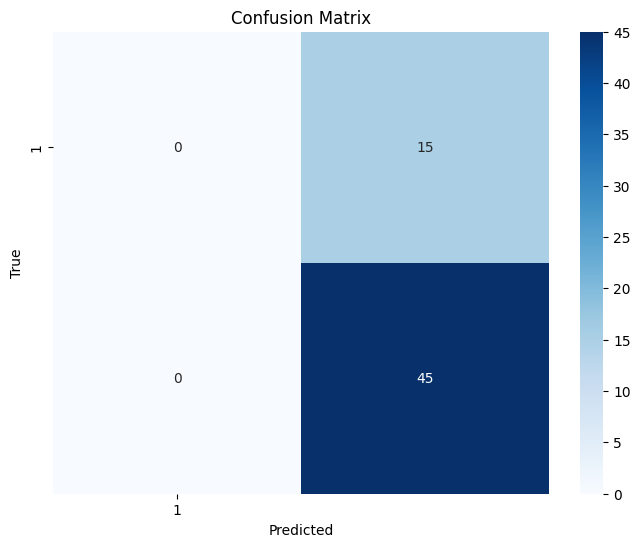

accuracy for class 0: 0.000
accuracy for class 1: 1.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.8135593220338984
precision on train set:  0.6618787704682563
recall on train set:  0.8135593220338984
f1 score on train set:  0.7299223823855535
balanced accuracy on train set:  0.5
logistic loss on train set:  0.38408779639040835
mse on train set:  0.1864406779661017

Scorecard table:
Empty DataFrame
Columns: [Feature, Bin, Points]
Index: []


In [92]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_1ook_beyondl1_model, aesthetic_binary_infbins_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params=None)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-10}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'alpha': 2.1544346900318866e-09}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'alpha': 4.641588833612773e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'alpha': 1e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7404761904761905
testing parameters: {'alpha': 2.1544346900318823e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7517460317460318
testing parameters: {'alpha': 0.00046415888336127724}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
AdaptiveLasso infeasible: minimize 0.0035211267605633804 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]] @ var11116 + -[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.

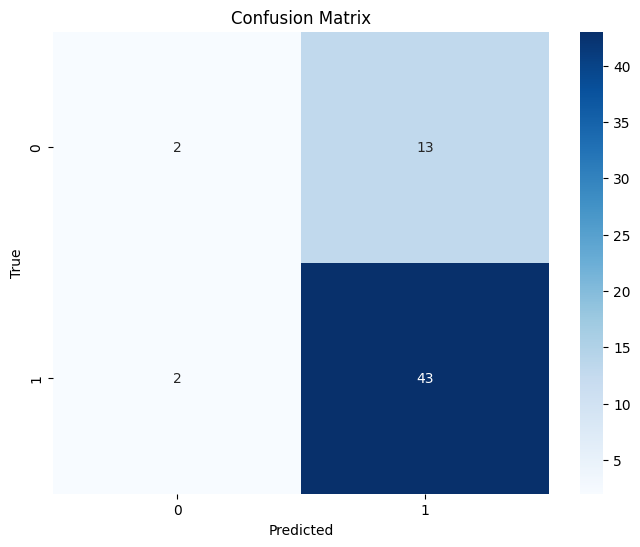

accuracy for class 0: 0.133
accuracy for class 1: 0.956

Evaluating the model on the train set...
auc on train set:  1.0
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.38408779639040835
mse on train set:  0.0

Scorecard table:
        Feature                                           Bin        Points
0    pLBC Value  [9.937413370440016e-05, 0.00031052608986985[  2.500000e-01
1    pLBC Value     [0.00031052608986985, 0.0007852672828238[  2.500000e-01
2    pLBC Value   [0.0007852672828238, 0.0011387378848024998[  2.500000e-01
3    pLBC Value  [0.0011387378848024998, 0.00129282644691335[  2.500000e-01
4    pLBC Value    [0.00129282644691335, 0.00163561965673815[  2.500000e-01
..          ...                                           ...           ...
699  pUNR Value      [0.2327464503736309, 0.2668599298159203[  2.500000e-01
700  pUNR Value      [0.266859929

In [93]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_1ook_adaptivelasso_model, aesthetic_binary_infbins_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params=None
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8082539682539682
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8136507936507937
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.824920634920635
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8476190476190476
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8588888888888888
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8587301587301587
testing parameters: {'C': 1.0101010101010

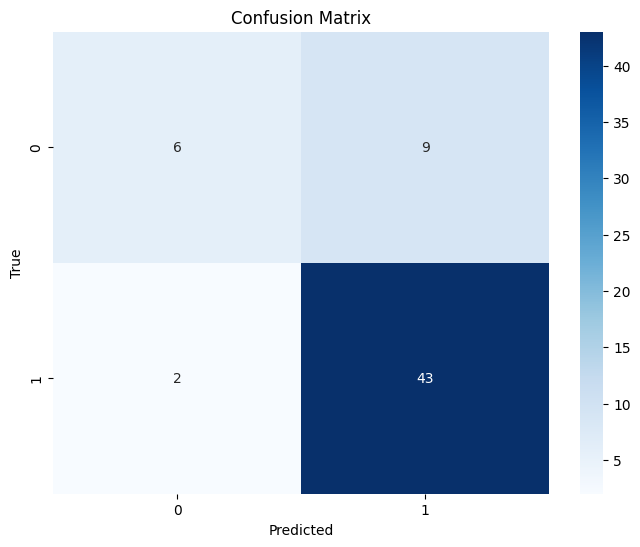

accuracy for class 0: 0.400
accuracy for class 1: 0.956

Evaluating the model on the train set...
auc on train set:  0.9289772727272727
accuracy on train set:  0.96045197740113
precision on train set:  0.9600781706604326
recall on train set:  0.96045197740113
f1 score on train set:  0.9602161840271041
balanced accuracy on train set:  0.9289772727272727
logistic loss on train set:  0.3905265335606071
mse on train set:  0.03954802259887006

Scorecard table:
       Feature                                           Bin    Points
0   pLBC Value   [0.02240998411399725, 0.022855768112764352[ -0.668487
1   pLBC Value  [0.022855768112764352, 0.023860438270569502[ -0.647848
2   pLBC Value      [0.0434975770614454, 0.0443261419544049[  0.025441
3   pLBC Value    [0.07951980980974975, 0.08132698993207771[ -1.643916
4   pLBC Value    [0.08722209931813735, 0.08862512094293165[ -0.143143
5   pLBC Value    [0.10000774461953775, 0.10196628741165575[ -1.219258
6   pLBC Value     [0.1060030259200575, 0.1

In [94]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_diff_ml_model, aesthetic_binary_infbins_diff_ml_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8133333333333332
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.819047619047619
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8361904761904763
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8419047619047619
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8642857142857142
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8587301587301587
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8646031746031746
testing parameters: {'C': 0.125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8533333333333333
testing parameters: {'C': 0.25}
  fold  1
  f

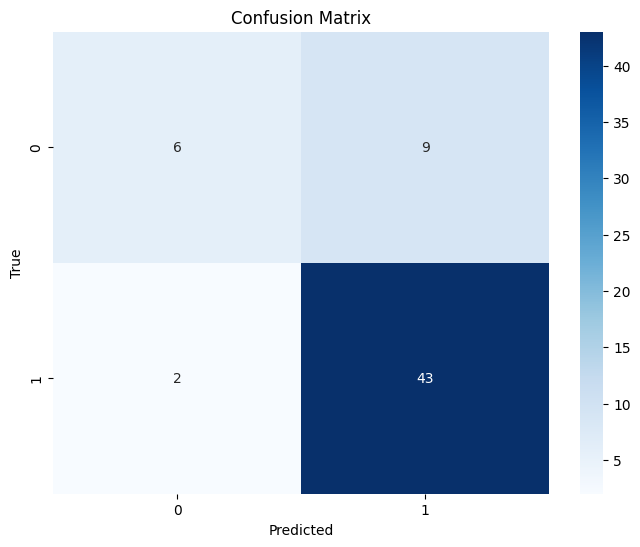

accuracy for class 0: 0.400
accuracy for class 1: 0.956

Evaluating the model on the train set...
auc on train set:  0.9021464646464646
accuracy on train set:  0.9548022598870056
precision on train set:  0.9541598875321844
recall on train set:  0.9548022598870056
f1 score on train set:  0.9536538418328753
balanced accuracy on train set:  0.9021464646464648
logistic loss on train set:  0.3883802878372075
mse on train set:  0.04519774011299435

Scorecard table:
        Feature                                           Bin        Points
0    pLBC Value  [9.937413370440016e-05, 0.00031052608986985[  4.683753e-16
1    pLBC Value     [0.00031052608986985, 0.0007852672828238[  4.683753e-16
2    pLBC Value   [0.0007852672828238, 0.0011387378848024998[  4.683753e-16
3    pLBC Value  [0.0011387378848024998, 0.00129282644691335[  4.683753e-16
4    pLBC Value    [0.00129282644691335, 0.00163561965673815[  4.683753e-16
..          ...                                           ...           ...
694 

In [95]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_diff_mm_model, aesthetic_binary_infbins_diff_mm_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x17b1da090>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x17b036890>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17b037c90>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8306349206349207
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x17b1da090>, 'penalty': <skglm.penalties.separable.SCAD object at 0x17b035990>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17b037c90>}
  fold  1
  fold  2
  fold  3
  fold  4
BEYOND_L1 ZeroDivisionError: division by zero
  fold  5
  mean score: 0.6701587301587302
best parameters:  {'datafit': <skglm.datafits.single_task.Huber object at 0x17b1da090>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x17b036890>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17b037c90>}
best score:  0.8306349206349207
Execution time: 0.6733787059783936 seconds

Evaluating the mo

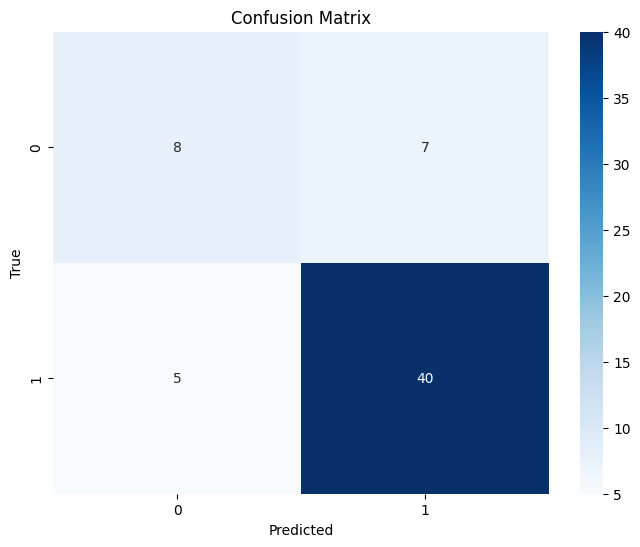

accuracy for class 0: 0.533
accuracy for class 1: 0.889

Evaluating the model on the train set...
auc on train set:  0.8276515151515152
accuracy on train set:  0.9096045197740112
precision on train set:  0.9064558421659532
recall on train set:  0.9096045197740112
f1 score on train set:  0.9073076836657505
balanced accuracy on train set:  0.8276515151515151
logistic loss on train set:  0.3969652707308059
mse on train set:  0.0903954802259887

Scorecard table:
       Feature                                          Bin    Points
0   pLBC Value   [0.07696541090187385, 0.07739030064622271[  0.280034
1   pLBC Value   [0.07951980980974975, 0.08132698993207771[ -0.532126
2   pLBC Value    [0.10196628741165575, 0.1044185171440622[ -0.221805
3   pBCE Value   [0.00341961307801965, 0.00373059014157855[ -0.264033
4   pBCE Value  [0.03219244869361155, 0.033677732360978596[ -0.448785
5   pBCE Value   [0.04054355829834885, 0.04146452769582535[  0.494667
6   pBCE Value   [0.09767510563647636, 0.098210

In [96]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_diff_beyondl1_model, aesthetic_binary_infbins_diff_beyondl1_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-10}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8480952380952381
testing parameters: {'alpha': 2.1544346900318866e-09}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8480952380952381
testing parameters: {'alpha': 4.641588833612773e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8480952380952381
testing parameters: {'alpha': 1e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8480952380952381
testing parameters: {'alpha': 2.1544346900318823e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8480952380952381
testing parameters: {'alpha': 0.00046415888336127724}
  fold  1
AdaptiveLasso infeasible: minimize 0.0035460992907801418 @ quad_over_lin([[1.00 1.00 ... 0.00 0.00]
 [1.00 1.00 ... 0.00 0.00]
 ...
 [1.00 1.00 ... 0.00 0.00]
 [1.00 1.00 ... 0.00 0.00]] @ var13231 + -[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 1.

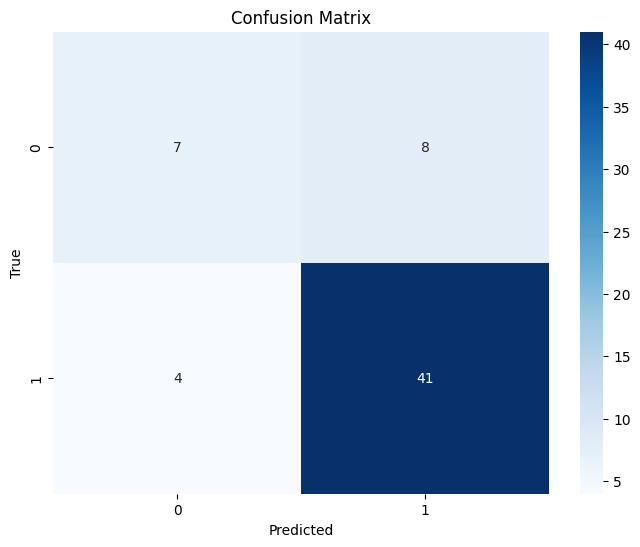

accuracy for class 0: 0.467
accuracy for class 1: 0.911

Evaluating the model on the train set...
auc on train set:  0.8428030303030303
accuracy on train set:  0.9152542372881356
precision on train set:  0.9129021099965411
recall on train set:  0.9152542372881356
f1 score on train set:  0.9136733148615028
balanced accuracy on train set:  0.8428030303030303
logistic loss on train set:  0.3969652707308058
mse on train set:  0.0847457627118644

Scorecard table:
      Feature                                         Bin    Points
0  pLBC Value  [0.07951980980974975, 0.08132698993207771[ -0.190062
1  pLBC Value  [0.10000774461953775, 0.10196628741165575[ -0.308313
2  pBCE Value  [0.04054355829834885, 0.04146452769582535[  0.069297
3  pBCE Value     [0.271667171841165, 0.2757473064105709[ -0.071908
4  pBCE Value    [0.3759113983334986, 0.4089133336714238[ -0.284240
5  cX2b Value   [0.08897355943918225, 0.0904607623815536[ -0.067643
6  pUNR Value  [0.0017746421772149002, 0.003022274703352[  0.

In [97]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_diff_adaptivelasso_model, aesthetic_binary_infbins_diff_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None #{'alpha': 1e-08}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

## income
predict whether annual income of an individual exceeds $50K/yr based on census data

https://archive.ics.uci.edu/dataset/2/adult

#### load dataset

num rows with nulls:  22746
num observations:  30162
num features:  14
target distribution:  income
0    22654
1     7508
Name: count, dtype: int64


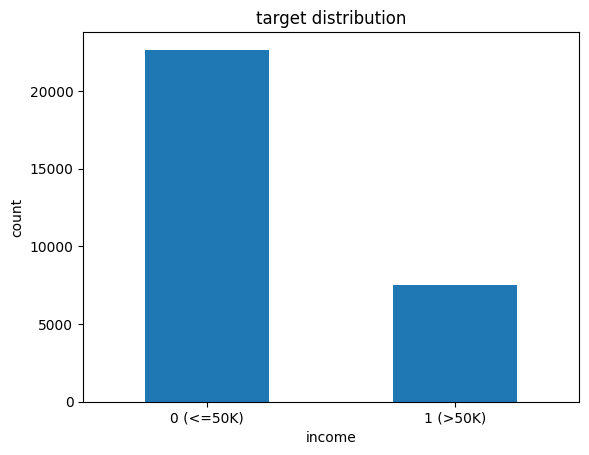

Proportion of positive class:  0.24892248524633645


In [2]:
# fetch dataset 
adult_data = fetch_ucirepo(id=2) 
  
# check for nulls

# data (as pandas dataframes) 
adult_X = adult_data.data.features 
adult_y = adult_data.data.targets
adult_y.loc[:,'income'] = adult_y['income'].map({'>50K': 1, '<=50K': 0})


# substitute '?' with NaN
adult_X = adult_X.replace('?', pd.NA)
adult_y = adult_y.replace('?', pd.NA)

# drop rows with nulls
adult_combined = pd.concat([adult_X, adult_y], axis=1)
print("num rows with nulls: ", adult_combined.isnull().sum().sum())
adult_combined = adult_combined.dropna()
adult_combined = adult_combined.reset_index(drop=True)
adult_X = adult_combined.iloc[:, :-1]
adult_y = adult_combined.iloc[:, -1]

# metadata 
# print(adult_data.metadata) 
  
# variable information 
# print(adult_data.variables) 

# make y be int
adult_y = adult_y.astype(int)

print("num observations: ", adult_y.count())
print("num features: ", adult_X.shape[1])
print("target distribution: ", adult_y.value_counts())
adult_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('income')
plt.ylabel('count')
plt.xticks([0, 1], ['0 (<=50K)', '1 (>50K)'], rotation=0)
plt.show()

# proportion of positive class
print("Proportion of positive class: ", adult_y.mean())

In [3]:
# get type of each column
print("types: ", adult_X.dtypes)

# show categorical columns
print("\nobject columns: ", adult_X.select_dtypes(include=['object']).columns)
categorical_columns = adult_X.select_dtypes(include=['object']).columns

# show number of unique values in each categorical column
print("\nnumber of unique values in each categorical column: ", adult_X.select_dtypes(include=['object']).nunique())

# show values of all categorical columns
print("\nvalues of all categorical columns: ", adult_X.select_dtypes(include=['object']).apply(lambda x: x.unique()))

types:  age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

object columns:  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

number of unique values in each categorical column:  workclass          7
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
dtype: int64

values of all categorical columns:  workclass         [State-gov, Self-emp-not-inc, Private, Federal...
education         [Bachelors, HS-grad, 11th, Masters, 9th, Some-...
marital-status    [Never-married, Married-civ-spouse, Divo

In [4]:
categorical_columns = adult_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    adult_X[col] = adult_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {adult_X[col].unique()}")

categorical columns:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
Column workclass encoded as: [5 4 2 0 1 3 6]
Column education encoded as: [ 9 11  1 12  6 15  7  5 10  8 14  4  0 13  2  3]
Column marital-status encoded as: [4 2 0 3 5 1 6]
Column occupation encoded as: [ 0  3  5  9  7 11 13  4  6 12  2 10  1  8]
Column relationship encoded as: [1 0 5 3 4 2]
Column race encoded as: [4 2 1 0 3]
Column sex encoded as: [1 0]
Column native-country encoded as: [38  4 22 18 25 32 15  8  1 10 19 29 30  3  0 36  6 24 35 13 31  5  7  9
 12 21  2 34 23 40 28 27 33 37 11 26 39 16 20 17 14]


#### CAIM & 1ook

Execution time: 5.702037811279297 seconds

Evaluating the model on the test set...
test predictions:  [0 0 0 ... 0 0 0]
      True Value  Prediction
0              1           0
1              0           0
2              1           0
3              0           0
4              0           0
...          ...         ...
7536           0           0
7537           0           0
7538           0           0
7539           0           0
7540           0           0

[7541 rows x 2 columns]
auc:  0.7042095431312528
accuracy:  0.8273438536003183
precision:  0.8186640171393378
recall:  0.8273438536003183
f1 score:  0.8117023421779668
balanced accuracy:  0.704209543131253
logistic loss:  0.6497230597534256
mse:  0.17265614639968174
number of features:  116
number of non-zero weights:  26
model size (non-zero weights / all weights):  0.22413793103448276


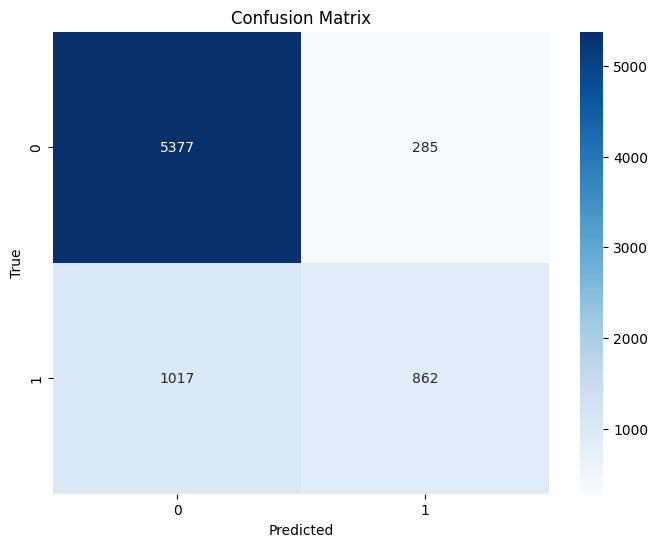

accuracy for class 0: 0.950
accuracy for class 1: 0.459

Evaluating the model on the train set...
auc on train set:  0.6973184678633214
accuracy on train set:  0.824322532160382
precision on train set:  0.8151852773007553
recall on train set:  0.824322532160382
f1 score on train set:  0.8075381452573491
balanced accuracy on train set:  0.6973184678633215
logistic loss on train set:  0.6511298734740345
mse on train set:  0.17567746783961805

Scorecard table:
           Feature                    Bin    Points
0              age           [17.0, 31.0[ -2.031843
1              age           [31.0, 90.0[ -0.272543
2              age            [90.0, inf[ -1.664708
3        workclass                      0  0.002124
4           fnlwgt    [14878.0, 209280.0[ -0.027648
5           fnlwgt  [209280.0, 1484705.0[ -0.011197
6           fnlwgt       [1484705.0, inf[ -3.450671
7        education                      0  0.011736
8    education-num            [1.0, 13.0[ -0.341975
9    education-num

In [5]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 10.598027229309082 seconds

Evaluating the model on the test set...
test predictions:  [0 0 0 ... 0 0 0]
      True Value  Prediction
0              1           0
1              0           0
2              1           0
3              0           0
4              0           0
...          ...         ...
7536           0           0
7537           0           0
7538           0           0
7539           0           0
7540           0           0

[7541 rows x 2 columns]
auc:  0.6448884555524453
accuracy:  0.8135525792335234
precision:  0.8188913243930879
recall:  0.8135525792335234
f1 score:  0.7791252356447166
balanced accuracy:  0.6448884555524453
logistic loss:  0.6639290946344448
mse:  0.1864474207664766
number of features:  116
number of non-zero weights:  22
model size (non-zero weights / all weights):  0.1896551724137931


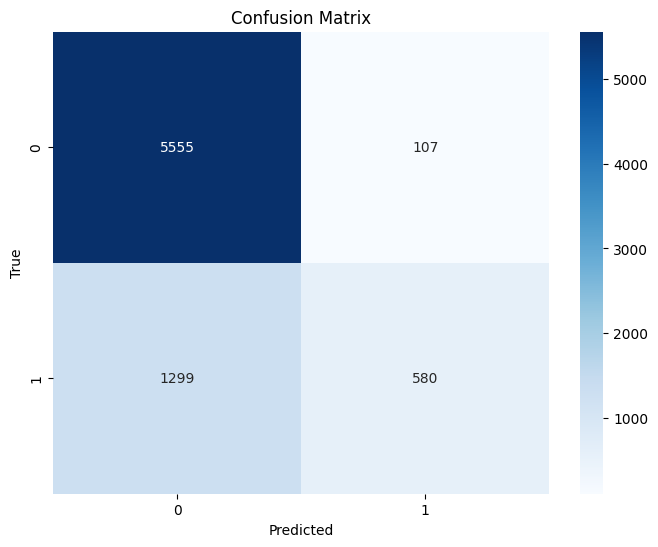

accuracy for class 0: 0.981
accuracy for class 1: 0.309

Evaluating the model on the train set...
auc on train set:  0.6411445039794259
accuracy on train set:  0.8117678263560408
precision on train set:  0.816509539886145
recall on train set:  0.8117678263560408
f1 score on train set:  0.7764442163650662
balanced accuracy on train set:  0.6411445039794259
logistic loss on train set:  0.6646486313493974
mse on train set:  0.18823217364395917

Scorecard table:
           Feature                  Bin        Points
0              age         [17.0, 31.0[ -1.428922e-04
1              age         [31.0, 90.0[  1.428922e-04
2        workclass                    0 -1.243450e-14
3           fnlwgt  [14878.0, 209280.0[ -8.881784e-16
4        education                    0 -1.243450e-14
5    education-num          [1.0, 13.0[ -6.665236e-01
6    education-num         [13.0, 16.0[ -6.665105e-01
7    education-num          [16.0, inf[  1.333034e+00
8   marital-status                    0 -1.243450e-

In [6]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_mm_model, adult_caim_1ook_mm_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params={'C': 0.03125})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 7.115278959274292 seconds

Evaluating the model on the test set...
test predictions:  [ 0.31447439  0.18156344  0.30717526 ...  0.18156344  0.18156344
 -0.00752073]
      True Value  Prediction
0              1           0
1              0           0
2              1           0
3              0           0
4              0           0
...          ...         ...
7536           0           0
7537           0           0
7538           0           0
7539           0           0
7540           0           0

[7541 rows x 2 columns]
auc:  0.6961312158458517
accuracy:  0.8248242938602307
precision:  0.8163256830068021
recall:  0.8248242938602307
f1 score:  0.8073754586783176
balanced accuracy:  0.6961312158458517
logistic loss:  0.6515365961212154
mse:  0.17517570613976927
number of features:  116
number of non-zero weights:  5
model size (non-zero weights / all weights):  0.04310344827586207


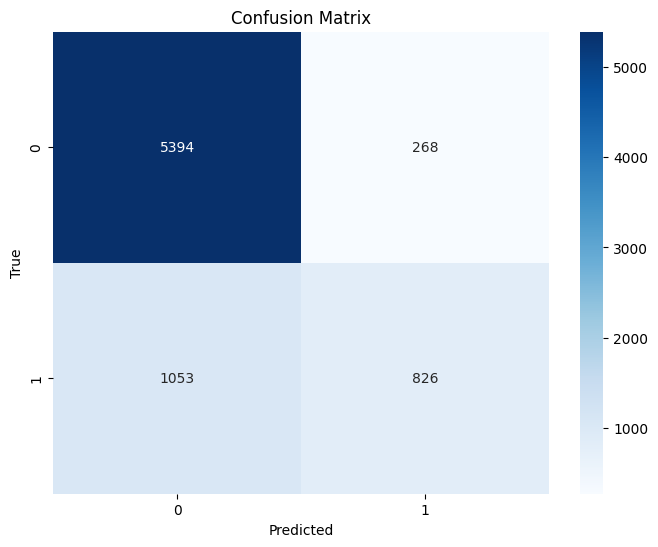

accuracy for class 0: 0.953
accuracy for class 1: 0.440

Evaluating the model on the train set...
auc on train set:  0.6881617338697671
accuracy on train set:  0.821007028866982
precision on train set:  0.811799038057174
recall on train set:  0.821007028866982
f1 score on train set:  0.8022486741523635
balanced accuracy on train set:  0.6881617338697671
logistic loss on train set:  0.6530947115751742
mse on train set:  0.178992971133018

Scorecard table:
          Feature               Bin    Points
0             age      [31.0, 90.0[  0.189084
1   education-num      [13.0, 16.0[  0.196383
2    capital-gain     [0.0, 5060.0[ -0.613367
3    capital-loss  [1816.0, 4356.0[  0.417612
4  hours-per-week      [41.0, 99.0[  0.125612


In [7]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_beyondl1_model, adult_caim_1ook_beyondl1_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 5.676227807998657 seconds

Evaluating the model on the test set...
test predictions:  [ 0.31587646  0.17469688  0.29908428 ...  0.17827223  0.17469688
 -0.00984467]
      True Value  Prediction
0              1           0
1              0           0
2              1           0
3              0           0
4              0           0
...          ...         ...
7536           0           0
7537           0           0
7538           0           0
7539           0           0
7540           0           0

[7541 rows x 2 columns]
auc:  0.7058967949500033
accuracy:  0.8277416788224373
precision:  0.8189818814437613
recall:  0.8277416788224373
f1 score:  0.8125064421597609
balanced accuracy:  0.7058967949500032
logistic loss:  0.6493200516716946
mse:  0.17225832117756265
number of features:  116
number of non-zero weights:  26
model size (non-zero weights / all weights):  0.22413793103448276


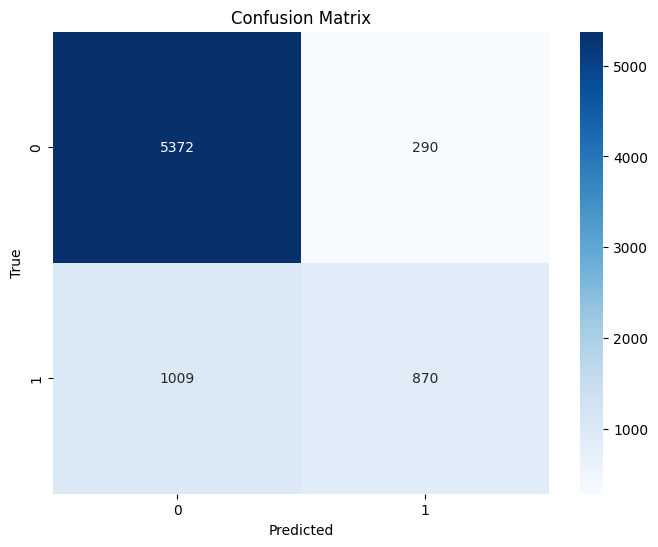

accuracy for class 0: 0.949
accuracy for class 1: 0.463

Evaluating the model on the train set...
auc on train set:  0.6980023924815633
accuracy on train set:  0.824189912028646
precision on train set:  0.8148707129070727
recall on train set:  0.824189912028646
f1 score on train set:  0.8076818305362213
balanced accuracy on train set:  0.6980023924815633
logistic loss on train set:  0.6509115581294633
mse on train set:  0.17581008797135406

Scorecard table:
           Feature                    Bin    Points
0              age           [17.0, 31.0[ -0.042837
1              age           [31.0, 90.0[  0.141705
2              age            [90.0, inf[ -0.020895
3        workclass                      0  0.080797
4           fnlwgt    [14878.0, 209280.0[  0.022146
5           fnlwgt  [209280.0, 1484705.0[  0.025721
6           fnlwgt       [1484705.0, inf[  0.031991
7        education                      0  0.080802
8    education-num            [1.0, 13.0[ -0.166514
9    education-num

In [8]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_adaptivelasso_model, adult_caim_1ook_adaptivelasso_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-10}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

Execution time: 5.512447118759155 seconds

Evaluating the model on the test set...
test predictions:  [0 0 0 ... 0 0 0]
      True Value  Prediction
0              1           0
1              0           0
2              1           0
3              0           0
4              0           0
...          ...         ...
7536           0           0
7537           0           0
7538           0           0
7539           0           0
7540           0           0

[7541 rows x 2 columns]
auc:  0.7042095431312528
accuracy:  0.8273438536003183
precision:  0.8186640171393378
recall:  0.8273438536003183
f1 score:  0.8117023421779668
balanced accuracy:  0.704209543131253
logistic loss:  0.6497230597534256
mse:  0.17265614639968174
number of features:  108
number of non-zero weights:  17
model size (non-zero weights / all weights):  0.1574074074074074


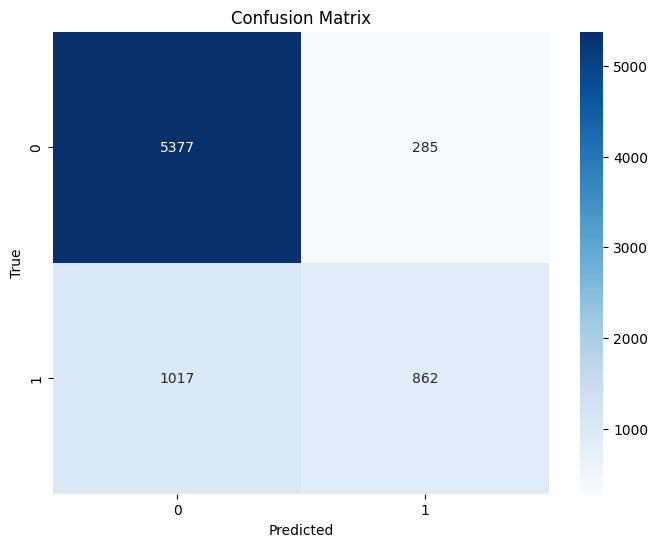

accuracy for class 0: 0.950
accuracy for class 1: 0.459

Evaluating the model on the train set...
auc on train set:  0.6973184678633214
accuracy on train set:  0.824322532160382
precision on train set:  0.8151852773007553
recall on train set:  0.824322532160382
f1 score on train set:  0.8075381452573491
balanced accuracy on train set:  0.6973184678633215
logistic loss on train set:  0.6511298734740345
mse on train set:  0.17567746783961805

Scorecard table:
           Feature                    Bin    Points
0              age           [17.0, 31.0[ -0.859348
1              age           [31.0, 90.0[  1.753398
2              age            [90.0, inf[ -1.225016
3           fnlwgt    [14878.0, 209280.0[ -0.175531
4           fnlwgt  [209280.0, 1484705.0[  0.015655
5        education                      9 -0.151450
6    education-num            [1.0, 13.0[ -0.151450
7    education-num           [13.0, 16.0[  1.276097
8    education-num            [16.0, inf[  0.785416
9     capital-gain

In [9]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_diff_ml_model, adult_caim_diff_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params= {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 9.411010026931763 seconds

Evaluating the model on the test set...
test predictions:  [0 0 0 ... 0 0 0]
      True Value  Prediction
0              1           0
1              0           0
2              1           0
3              0           0
4              0           0
...          ...         ...
7536           0           0
7537           0           0
7538           0           0
7539           0           0
7540           0           0

[7541 rows x 2 columns]
auc:  0.6448884555524453
accuracy:  0.8135525792335234
precision:  0.8188913243930879
recall:  0.8135525792335234
f1 score:  0.7791252356447166
balanced accuracy:  0.6448884555524453
logistic loss:  0.6639290946344448
mse:  0.1864474207664766
number of features:  108
number of non-zero weights:  17
model size (non-zero weights / all weights):  0.1574074074074074


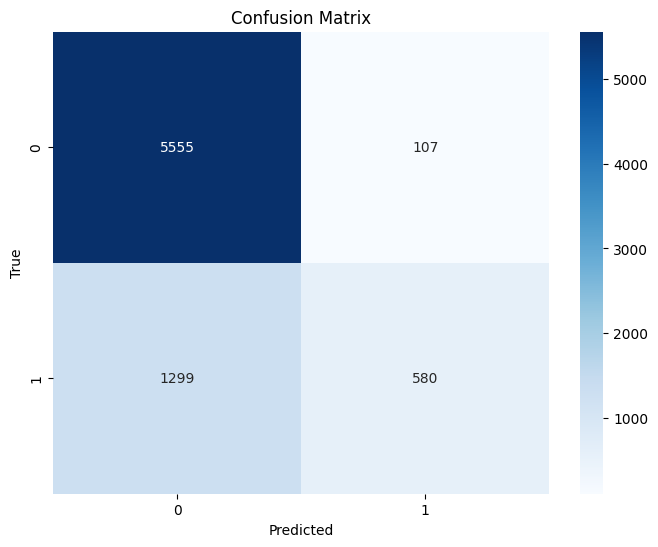

accuracy for class 0: 0.981
accuracy for class 1: 0.309

Evaluating the model on the train set...
auc on train set:  0.6411150783673732
accuracy on train set:  0.8117236196454621
precision on train set:  0.8163994458091907
recall on train set:  0.8117236196454621
f1 score on train set:  0.7764075472480552
balanced accuracy on train set:  0.6411150783673731
logistic loss on train set:  0.6646486313493974
mse on train set:  0.1882763803545378

Scorecard table:
           Feature                    Bin        Points
0              age           [17.0, 31.0[  7.407408e-13
1              age           [31.0, 90.0[  1.974033e-04
2              age            [90.0, inf[ -2.361527e-04
3           fnlwgt    [14878.0, 209280.0[  7.407408e-13
4           fnlwgt  [209280.0, 1484705.0[ -2.279943e-04
5        education                      9  7.407408e-13
6    education-num            [1.0, 13.0[  7.407408e-13
7    education-num           [13.0, 16.0[  2.084955e-04
8    education-num            [16

In [10]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_diff_mm_model, adult_caim_diff_mm_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.5}
                )


end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")  

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 6.113229751586914 seconds

Evaluating the model on the test set...
test predictions:  [ 0.32336389  0.175547    0.29668497 ...  0.175547    0.175547
 -0.0098857 ]
      True Value  Prediction
0              1           0
1              0           0
2              1           0
3              0           0
4              0           0
...          ...         ...
7536           0           0
7537           0           0
7538           0           0
7539           0           0
7540           0           0

[7541 rows x 2 columns]
auc:  0.7026117742645902
accuracy:  0.8268134199708261
precision:  0.8181427110564786
recall:  0.8268134199708261
f1 score:  0.8108346970182151
balanced accuracy:  0.7026117742645902
logistic loss:  0.6500756918249403
mse:  0.17318658002917384
number of features:  108
number of non-zero weights:  5
model size (non-zero weights / all weights):  0.046296296296296294


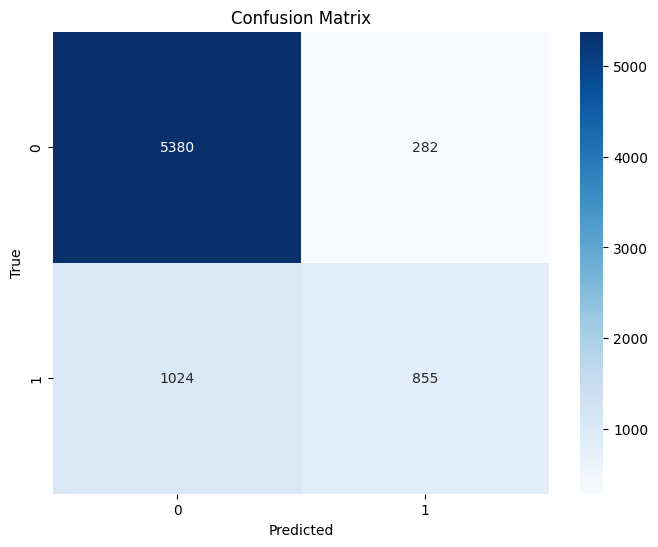

accuracy for class 0: 0.950
accuracy for class 1: 0.455

Evaluating the model on the train set...
auc on train set:  0.6936766131822057
accuracy on train set:  0.8225100570266567
precision on train set:  0.8130693440103139
recall on train set:  0.8225100570266567
f1 score on train set:  0.8051358994204175
balanced accuracy on train set:  0.6936766131822059
logistic loss on train set:  0.6518184064838356
mse on train set:  0.17748994297334336

Scorecard table:
          Feature                Bin    Points
0             age       [31.0, 90.0[  0.185433
1   education-num       [13.0, 16.0[  0.212112
2    capital-gain  [5060.0, 99999.0[  0.603673
3    capital-loss   [1816.0, 4356.0[  0.406344
4  hours-per-week       [41.0, 99.0[  0.121138


In [11]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_diff_beyondl1_model, adult_caim_diff_beyondl1_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': SCAD(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 5.501108884811401 seconds

Evaluating the model on the test set...
test predictions:  [ 0.31587646  0.17469688  0.29908428 ...  0.17827223  0.17469688
 -0.00984467]
      True Value  Prediction
0              1           0
1              0           0
2              1           0
3              0           0
4              0           0
...          ...         ...
7536           0           0
7537           0           0
7538           0           0
7539           0           0
7540           0           0

[7541 rows x 2 columns]
auc:  0.7058967949500033
accuracy:  0.8277416788224373
precision:  0.8189818814437613
recall:  0.8277416788224373
f1 score:  0.8125064421597609
balanced accuracy:  0.7058967949500032
logistic loss:  0.6493200516716946
mse:  0.17225832117756265
number of features:  108
number of non-zero weights:  18
model size (non-zero weights / all weights):  0.16666666666666666


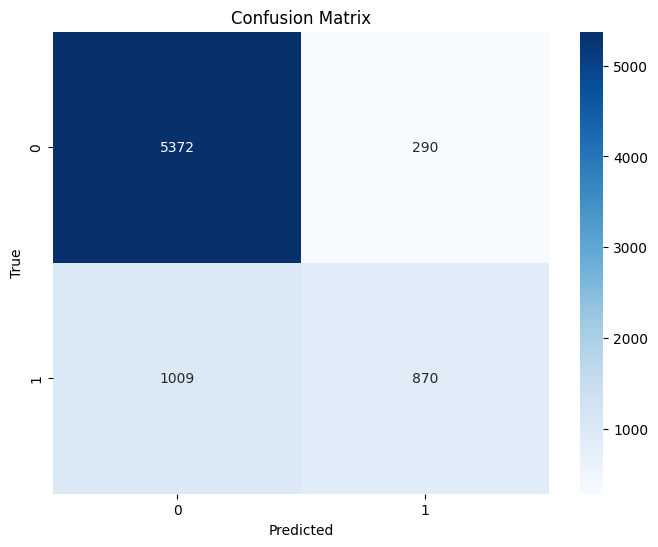

accuracy for class 0: 0.949
accuracy for class 1: 0.463

Evaluating the model on the train set...
auc on train set:  0.6980023924815633
accuracy on train set:  0.824189912028646
precision on train set:  0.8148707129070727
recall on train set:  0.824189912028646
f1 score on train set:  0.8076818305362213
balanced accuracy on train set:  0.6980023924815633
logistic loss on train set:  0.6509115581294633
mse on train set:  0.17581008797135406

Scorecard table:
           Feature                    Bin    Points
0              age           [17.0, 31.0[ -0.001641
1              age           [31.0, 90.0[  0.184542
2              age            [90.0, inf[ -0.162600
3           fnlwgt    [14878.0, 209280.0[ -0.001641
4           fnlwgt  [209280.0, 1484705.0[  0.003575
5           fnlwgt       [1484705.0, inf[  0.006269
6        education                      9 -0.001641
7    education-num            [1.0, 13.0[ -0.001641
8    education-num           [13.0, 16.0[  0.204909
9    education-num

In [12]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_diff_adaptivelasso_model, adult_caim_diff_adaptivelasso_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-10}
                )

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_1ook_ml_model, adult_infbins_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 1/0.99, 'penalty': 'l1', 'solver': 'liblinear'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7718495146816733
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7787896986483384
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7975776094103393
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8222891002437583
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8309978457435114
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8371425570682571
testing parameters: {'C': 1.010101010101

testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7511603284630528
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7511603284630528
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7626540244539863
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.793775693538696
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8077449379857458
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.814376003243597
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8221121678854579
testing parameters: {'C': 0.125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.826444499807045
testing parameters: {'C': 0.25}
  fold  1
  fol

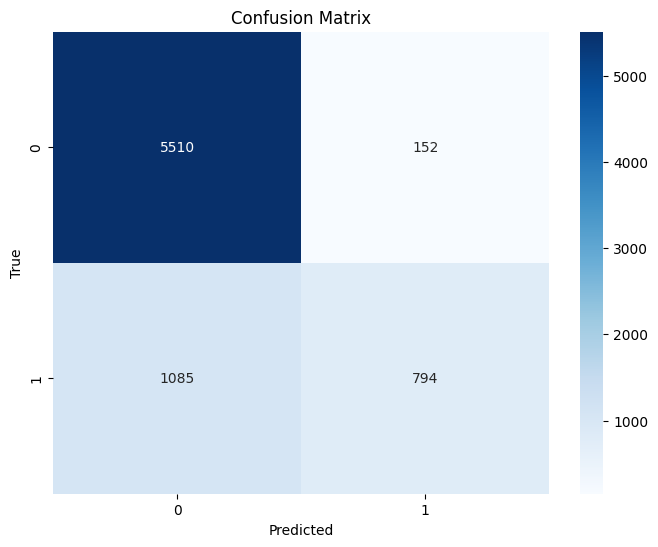

accuracy for class 0: 0.973
accuracy for class 1: 0.423

Evaluating the model on the train set...
accuracy on train set:  0.8779894788028823
precision on train set:  0.8866777790152409
recall on train set:  0.8779894788028823
f1 score on train set:  0.8653116332709289
balanced accuracy on train set:  0.7648202207494883
logistic loss on train set:  0.6421453573705322
mse on train set:  0.12201052119711772

Scorecard table:
             Feature           Bin        Points
0                age  [17.5, 18.5[ -5.000000e-01
1                age  [18.5, 19.5[ -3.128556e-01
2                age  [19.5, 20.5[ -2.099183e-01
3                age  [20.5, 21.5[ -1.236285e-01
4                age  [21.5, 22.5[ -1.254286e-01
...              ...           ...           ...
8975  hours-per-week  [94.5, 95.5[ -2.341114e-01
8976  hours-per-week  [95.5, 97.0[ -2.530039e-01
8977  hours-per-week  [97.0, 98.5[  2.027302e-01
8978  hours-per-week   [98.5, inf[ -8.323044e-02
8979  native-country             0 

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_1ook_mm_model, adult_infbins_1ook_mm_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params={'C': 0.5})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

ola
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x14bd744d0>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x14bd77910>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x14bd74990>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7661906883362398
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x14bd744d0>, 'penalty': <skglm.penalties.separable.SCAD object at 0x14bd74d90>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x14bd74990>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7715841356839641
best parameters:  {'datafit': <skglm.datafits.single_task.Huber object at 0x14bd744d0>, 'penalty': <skglm.penalties.separable.SCAD object at 0x14bd74d90>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x14bd74990>}
best score:  0.7715841356839641
Execution time: 65.26417064666748 seconds

Evaluating the model on the test set...
test predictions:  [0.679

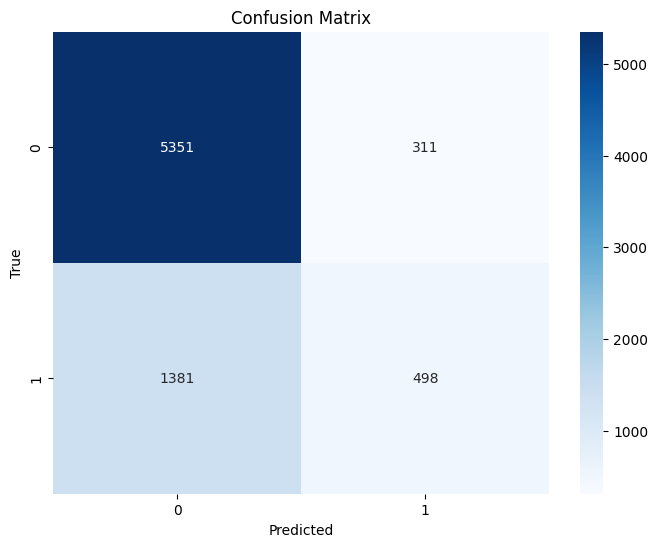

accuracy for class 0: 0.945
accuracy for class 1: 0.265

Evaluating the model on the train set...
accuracy on train set:  0.7711860660448256
precision on train set:  0.7429120633773446
recall on train set:  0.7711860660448256
f1 score on train set:  0.7342897336805262
balanced accuracy on train set:  0.5966681592232048
logistic loss on train set:  0.6695859168343127
mse on train set:  0.2288139339551744

Scorecard table:
          Feature           Bin    Points
0   education-num    [4.5, 5.5[  0.228727
1   education-num    [5.5, 6.5[  0.360483
2   education-num    [6.5, 7.5[  0.521403
3            race             0  0.052893
4  hours-per-week  [44.5, 45.5[  0.179745
5  hours-per-week  [55.5, 56.5[  0.166073


In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_1ook_beyondl1_model, adult_infbins_1ook_beyondl1_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': SCAD(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-10}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.7489501199251627
testing parameters: {'alpha': 2.1544346900318866e-09}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.7489501199251627
testing parameters: {'alpha': 4.641588833612773e-08}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.7489501199251627
testing parameters: {'alpha': 1e-06}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.7489059112602645
testing parameters: {'alpha': 2.1544346900318823e-05}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: minimize 2.7630415561450043e-05 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]] @ var37666 + -[0. 1. 0. ... 1. 1. 0.], 1.0) + norm1(param37668 @ var37666) is infeasible.
  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: minimize 2.762888876609383e-05 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]] @ var37711 + -[1. 0. 0. ... 1. 0. 0.], 1.0) + norm1(param37713 @ var37711) is infeasible.
  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: minimize 2.762888876609383e-05 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]] @ var37756 + -[0. 1. 0. ... 1. 0. 0.], 1.0) + norm1(param37758 @ var37756) is infeasible.
  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: minimize 2.762888876609383e-05 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]] @ var37801 + -[0. 0. 0. ... 1. 0. 0.], 1.0) + norm1(param37803 @ var37801) is infeasible.
  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: minimize 2.762888876609383e-05 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]] @ var37846 + -[0. 1. 0. ... 0. 1. 0.], 1.0) + norm1(param37848 @ var37846) is infeasible.
  mean score: 0.0
testing parameters: {'alpha': 0.00046415888336127724}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: minimize 2.762888876609383e-05 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]] @ var38071 + -[0. 1. 0. ... 0. 1. 0.], 1.0) + norm1(param38073 @ var38071) is infeasible.
  mean score: 0.6630491961838885
testing parameters: {'alpha': 0.01}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.7622564591057638
testing parameters: {'alpha': 0.21544346900318778}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.7511603284630528
testing parameters: {'alpha': 4.641588833612772}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.7511603284630528
testing parameters: {'alpha': 100.0}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.601469789117341
best parameters:  {'alpha': 0.01}
best score:  0.7622564591057638


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


Execution time: 1434.7751500606537 seconds

Evaluating the model on the test set...
test predictions:  [0.17227242 0.17227242 0.35628147 ... 0.17227242 0.17227242 0.17227242]
      True Value  Prediction
0              1           0
1              0           0
2              1           0
3              0           0
4              0           0
...          ...         ...
7536           0           0
7537           0           0
7538           0           0
7539           0           0
7540           0           0

[7541 rows x 2 columns]
accuracy:  0.7650179021349953
precision:  0.7325186653251997
recall:  0.7650179021349953
f1 score:  0.7173942174807394
balanced accuracy:  0.5738092892703737
logistic loss:  0.6749110648616158
mse:  0.23498209786500465
number of features:  16882
number of non-zero weights:  11
model size (non-zero weights / all weights):  0.0006515815661651463


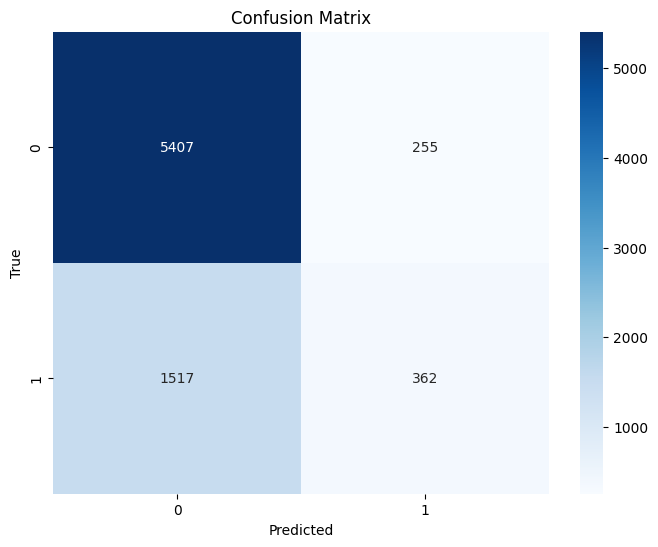

accuracy for class 0: 0.955
accuracy for class 1: 0.193

Evaluating the model on the train set...
accuracy on train set:  0.7610627293223111
precision on train set:  0.7244069431457529
recall on train set:  0.7610627293223111
f1 score on train set:  0.7093531771796211
balanced accuracy on train set:  0.5636748446135311
logistic loss on train set:  0.6770086385497294
mse on train set:  0.23893727067768888

Scorecard table:
           Feature           Bin        Points
0        workclass             0  8.652985e-02
1        education             0  8.574257e-02
2    education-num    [4.5, 5.5[  2.212862e-01
3    education-num    [5.5, 6.5[  3.525045e-01
4   marital-status             0  1.280632e-12
5       occupation             0  1.280628e-12
6     relationship             0  1.280640e-12
7             race             0  1.280636e-12
8              sex             0  1.280632e-12
9   hours-per-week  [44.5, 45.5[  1.840090e-01
10  native-country             0  1.280632e-12


In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_1ook_adaptivelasso_model, adult_infbins_1ook_adaptivelasso_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 0.01})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_diff_ml_model, adult_infbins_diff_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

'''
testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7837850823844346
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7865700817249683
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8001857936310213
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8233500984314472
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8284781179321092
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8318378103765797
testing parameters: {'C': 1.0101010101010102, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8322798774858213
testing parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8325451294752113
testing parameters: {'C': 1000.0, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8173379935616552
testing parameters: {'C': 1000.0, 'l1_ratio': 0.6, 'penalty': 'elasticnet', 'solver': 'saga'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8173379935616552
testing parameters: {'C': 1000.0, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8173379935616552
testing parameters: {'C': 100.0, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8177358813156108
testing parameters: {'C': 100.0, 'l1_ratio': 0.6, 'penalty': 'elasticnet', 'solver': 'saga'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8176916628808417
testing parameters: {'C': 100.0, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8177358715457401
testing parameters: {'C': 10.0, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8188852089042602
testing parameters: {'C': 10.0, 'l1_ratio': 0.6, 'penalty': 'elasticnet', 'solver': 'saga'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8195041009032245
testing parameters: {'C': 10.0, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8200788037770319
testing parameters: {'C': 2.5, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8224217360083241
testing parameters: {'C': 2.5, 'l1_ratio': 0.6, 'penalty': 'elasticnet', 'solver': 'saga'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8236595297761233
testing parameters: {'C': 2.5, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8246320324750501
'''

testing parameters: {'C': 2.5, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8224217360083241
testing parameters: {'C': 2.5, 'l1_ratio': 0.6, 'penalty': 'elasticnet', 'solver': 'saga'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8236595297761233
testing parameters: {'C': 2.5, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8246320324750501
testing parameters: {'C': 1.6666666666666667, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'}
  fold  1


In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_diff_mm_model, adult_infbins_diff_mm_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_diff_beyondl1_model, adult_infbins_diff_beyondl1_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_diff_adaptivelasso_model, adult_infbins_diff_adaptivelasso_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

## (((mushroom)))
mushrooms described in terms of physical characteristics; classification: poisonous or edible

https://archive.ics.uci.edu/dataset/73/mushroom

#### load dataset

num rows with nulls:  2480
num observations:  5644
num features:  22
target distribution:  poisonous
0    3488
1    2156
Name: count, dtype: int64


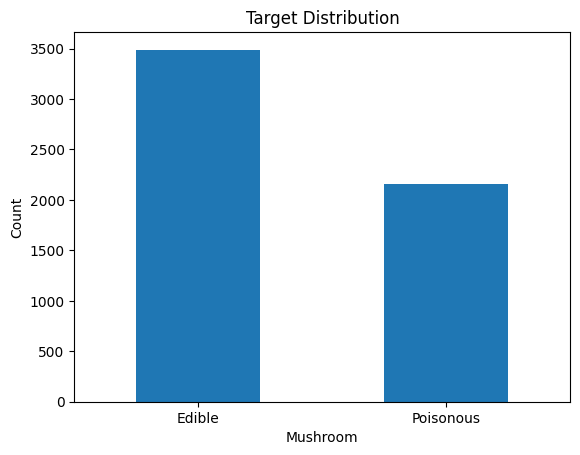

Proportion of positive class:  0.38199858256555635


In [20]:
# fetch dataset 
mushroom_data = fetch_ucirepo(id=73) 

# data (as pandas dataframes) 
mushroom_X = mushroom_data.data.features 
mushroom_y = mushroom_data.data.targets.squeeze().map({'p': 1, 'e': 0}).astype(int)
  
# metadata 
# print(mushroom_data.metadata) 
  
# variable information 
# print(mushroom_data.variables) 

# substitute '?' with NaN and drop rows with nulls
mushroom_combined = pd.concat([mushroom_X, mushroom_y], axis=1)
mushroom_combined = mushroom_combined.replace('?', pd.NA)
print("num rows with nulls: ", mushroom_combined.isnull().sum().sum())
mushroom_combined = mushroom_combined.dropna().reset_index(drop=True)
mushroom_X = mushroom_combined.iloc[:, :-1]
mushroom_y = mushroom_combined.iloc[:, -1]

print("num observations: ", mushroom_y.count())
print("num features: ", mushroom_X.shape[1])
print("target distribution: ", mushroom_y.value_counts())
# show target distribution
mushroom_y.value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Mushroom')
plt.ylabel('Count')
plt.xticks([0, 1], ['Edible', 'Poisonous'], rotation=0)
plt.show()

# proportion of positive class
print("Proportion of positive class: ", mushroom_y.mean())

In [21]:
categorical_columns = mushroom_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    mushroom_X[col] = mushroom_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {mushroom_X[col].unique()}")

categorical columns:  ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
Column cap-shape encoded as: [5 0 4 2 3 1]
Column cap-surface encoded as: [2 3 0 1]
Column cap-color encoded as: [4 7 6 3 2 5 0 1]
Column bruises encoded as: [1 0]
Column odor encoded as: [6 0 3 5 2 1 4]
Column gill-attachment encoded as: [1 0]
Column gill-spacing encoded as: [0 1]
Column gill-size encoded as: [1 0]
Column gill-color encoded as: [2 3 0 4 7 1 6 5 8]
Column stalk-shape encoded as: [0 1]
Column stalk-root encoded as: [2 1 0 3]
Column stalk-surface-above-ring encoded as: [2 0 1 3]
Column stalk-surface-below-ring encoded as: [2 0 3 1]
Column stalk-color-above-ring encoded as: [5 2 4 3 0 1 6]
Column

#### CAIM & 1ook

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 1.010101010101

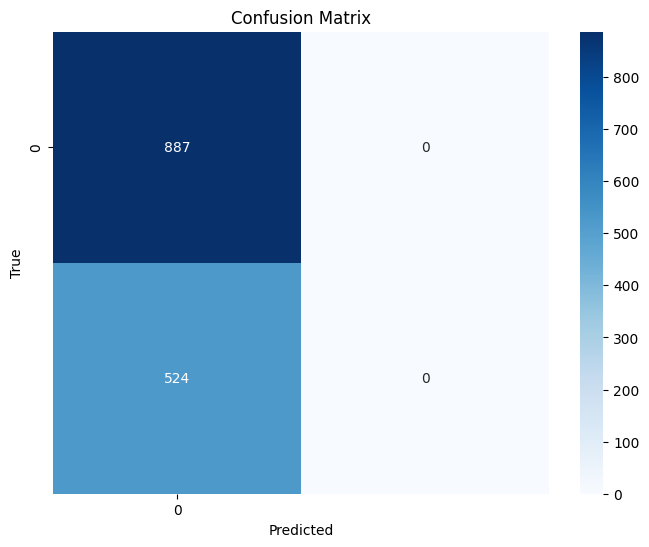

accuracy for class 0: 1.000
accuracy for class 1: 0.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6144578313253012
precision on train set:  0.3775584264769923
recall on train set:  0.6144578313253012
f1 score on train set:  0.4677216327998562
balanced accuracy on train set:  0.5
logistic loss on train set:  0.6931471805599452
mse on train set:  0.3855421686746988
Execution time: 50.66545605659485 seconds


In [22]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_1ook_ml_model, mushroom_caim_1ook_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.25}
  fold  1
  

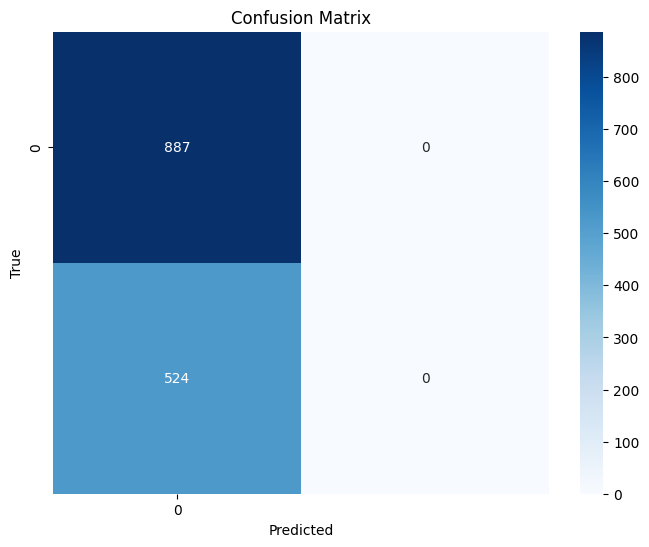

accuracy for class 0: 1.000
accuracy for class 1: 0.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6144578313253012
precision on train set:  0.3775584264769923
recall on train set:  0.6144578313253012
f1 score on train set:  0.4677216327998562
balanced accuracy on train set:  0.5
logistic loss on train set:  0.6931471805599452
mse on train set:  0.3855421686746988
Execution time: 24.903737783432007 seconds


In [23]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_1ook_mm_model, mushroom_caim_1ook_mm_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x1583b02d0>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x1583b0fd0>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x14ecc0b10>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x1583b02d0>, 'penalty': <skglm.penalties.separable.SCAD object at 0x1583b1ed0>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x14ecc0b10>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
best parameters:  {'datafit': <skglm.datafits.single_task.Huber object at 0x1583b02d0>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x1583b0fd0>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x14ecc0b10>}
best score:  0.6144604374778456

Evaluating the model on the test set...
test predictions:  [0.38554217 0.38554217 0.38554217 ... 0.3855421

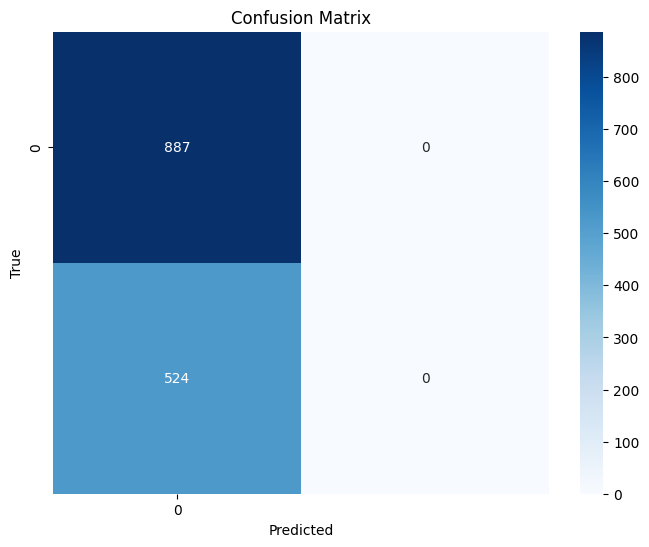

accuracy for class 0: 1.000
accuracy for class 1: 0.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6144578313253012
precision on train set:  0.3775584264769923
recall on train set:  0.6144578313253012
f1 score on train set:  0.4677216327998562
balanced accuracy on train set:  0.5
logistic loss on train set:  0.6931471805599452
mse on train set:  0.3855421686746988
Execution time: 0.930962085723877 seconds


In [24]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_1ook_beyondl1_model, mushroom_caim_1ook_beyondl1_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'alpha': 1e-10}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 2.1544346900318866e-09}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 4.641588833612773e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 1e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 2.1544346900318823e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 0.00046415888336127724}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 0.01}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 0.21544346900318778}
  fold  1
  fold  2
  fold  3
  fold  4
  f

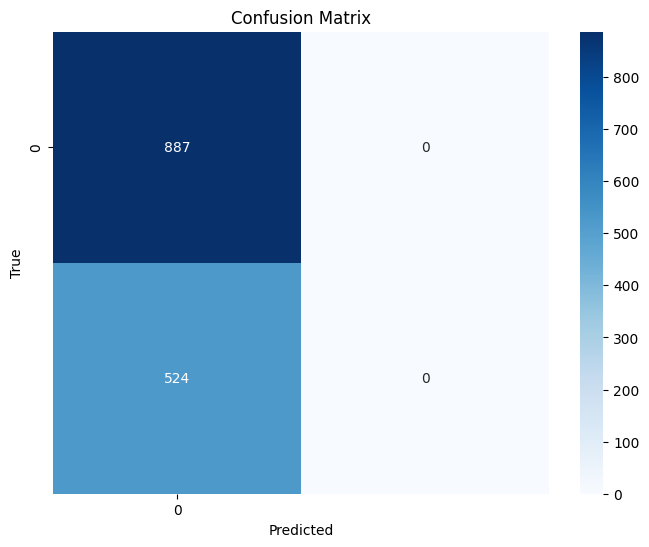

accuracy for class 0: 1.000
accuracy for class 1: 0.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6144578313253012
precision on train set:  0.3775584264769923
recall on train set:  0.6144578313253012
f1 score on train set:  0.4677216327998562
balanced accuracy on train set:  0.5
logistic loss on train set:  0.6931471805599452
mse on train set:  0.3855421686746988
Execution time: 9.059305906295776 seconds


In [25]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_1ook_adaptivelasso_model, mushroom_caim_1ook_adaptivelasso_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### CAIM & Diff Coding

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 1.010101010101

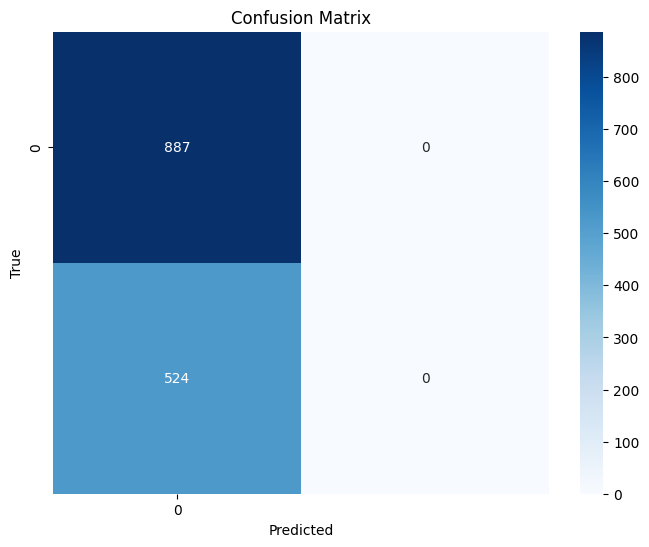

accuracy for class 0: 1.000
accuracy for class 1: 0.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6144578313253012
precision on train set:  0.3775584264769923
recall on train set:  0.6144578313253012
f1 score on train set:  0.4677216327998562
balanced accuracy on train set:  0.5
logistic loss on train set:  0.6931471805599452
mse on train set:  0.3855421686746988
Execution time: 8.543697834014893 seconds


In [26]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_diffcod_ml_model, mushroom_caim_diffcod_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.25}
  fold  1
  

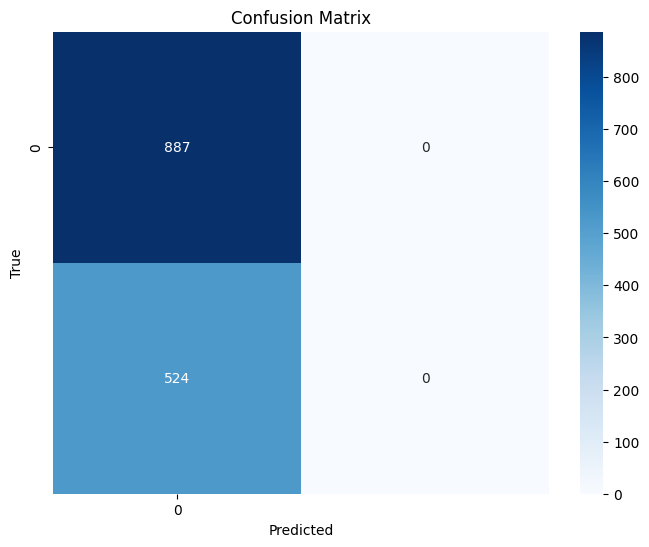

accuracy for class 0: 1.000
accuracy for class 1: 0.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6144578313253012
precision on train set:  0.3775584264769923
recall on train set:  0.6144578313253012
f1 score on train set:  0.4677216327998562
balanced accuracy on train set:  0.5
logistic loss on train set:  0.6931471805599452
mse on train set:  0.3855421686746988
Execution time: 20.365243911743164 seconds


In [27]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_diffcod_mm_model, mushroom_caim_diffcod_mm_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x158421950>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x1584204d0>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x158421c90>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x158421950>, 'penalty': <skglm.penalties.separable.SCAD object at 0x158421ad0>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x158421c90>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
best parameters:  {'datafit': <skglm.datafits.single_task.Huber object at 0x158421950>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x1584204d0>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x158421c90>}
best score:  0.6144604374778456

Evaluating the model on the test set...
test predictions:  [0.38554217 0.38554217 0.38554217 ... 0.3855421

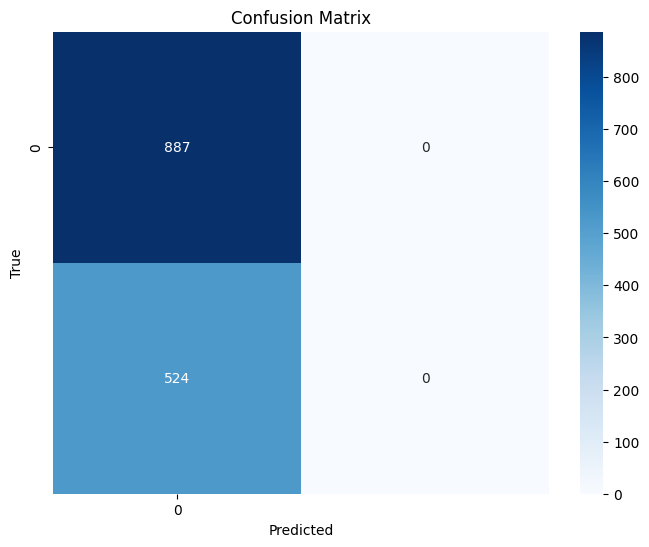

accuracy for class 0: 1.000
accuracy for class 1: 0.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6144578313253012
precision on train set:  0.3775584264769923
recall on train set:  0.6144578313253012
f1 score on train set:  0.4677216327998562
balanced accuracy on train set:  0.5
logistic loss on train set:  0.6931471805599452
mse on train set:  0.3855421686746988
Execution time: 0.8049230575561523 seconds


In [28]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_diffcod_beyondl1_model, mushroom_caim_diffcod_beyondl1_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'alpha': 1e-10}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 2.1544346900318866e-09}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 4.641588833612773e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 1e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 2.1544346900318823e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 0.00046415888336127724}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 0.01}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 0.21544346900318778}
  fold  1
  fold  2
  fold  3
  fold  4
  f

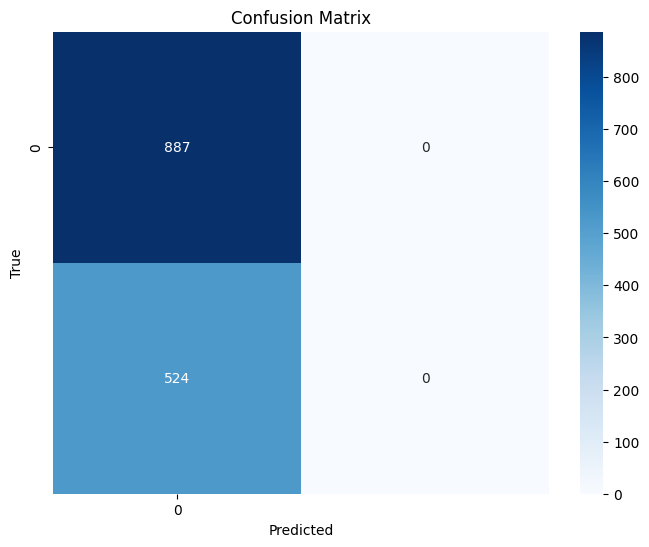

accuracy for class 0: 1.000
accuracy for class 1: 0.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6144578313253012
precision on train set:  0.3775584264769923
recall on train set:  0.6144578313253012
f1 score on train set:  0.4677216327998562
balanced accuracy on train set:  0.5
logistic loss on train set:  0.6931471805599452
mse on train set:  0.3855421686746988
Execution time: 3.843510866165161 seconds


In [29]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_diffcod_adaptivelasso_model, mushroom_caim_diffcod_adaptivelasso_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & 1ook

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 1.010101010101

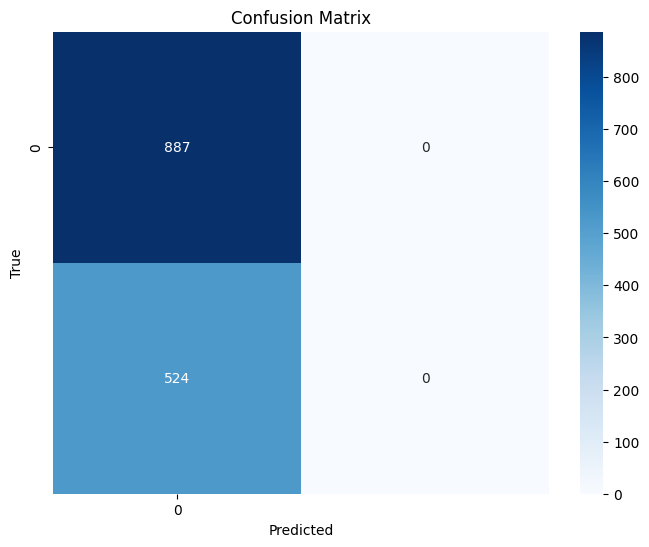

accuracy for class 0: 1.000
accuracy for class 1: 0.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6144578313253012
precision on train set:  0.3775584264769923
recall on train set:  0.6144578313253012
f1 score on train set:  0.4677216327998562
balanced accuracy on train set:  0.5
logistic loss on train set:  0.6931471805599452
mse on train set:  0.3855421686746988
Execution time: 38.49728989601135 seconds


In [30]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_1ook_ml_model, mushroom_infbins_1ook_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.25}
  fold  1
  

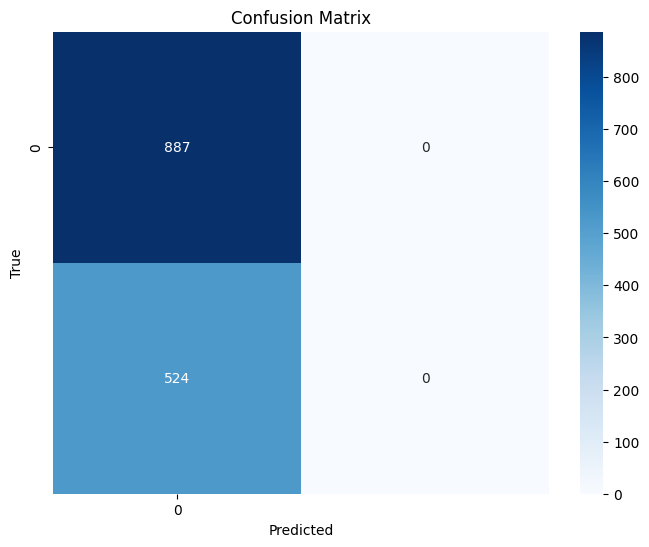

accuracy for class 0: 1.000
accuracy for class 1: 0.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6144578313253012
precision on train set:  0.3775584264769923
recall on train set:  0.6144578313253012
f1 score on train set:  0.4677216327998562
balanced accuracy on train set:  0.5
logistic loss on train set:  0.6931471805599452
mse on train set:  0.3855421686746988
Execution time: 24.676152229309082 seconds


In [31]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_1ook_mm_model, mushroom_infbins_1ook_mm_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x15852b7d0>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x14ffb1390>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x15852b3d0>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x15852b7d0>, 'penalty': <skglm.penalties.separable.SCAD object at 0x15852ad50>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x15852b3d0>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
best parameters:  {'datafit': <skglm.datafits.single_task.Huber object at 0x15852b7d0>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x14ffb1390>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x15852b3d0>}
best score:  0.6144604374778456

Evaluating the model on the test set...
test predictions:  [0.38554217 0.38554217 0.38554217 ... 0.3855421

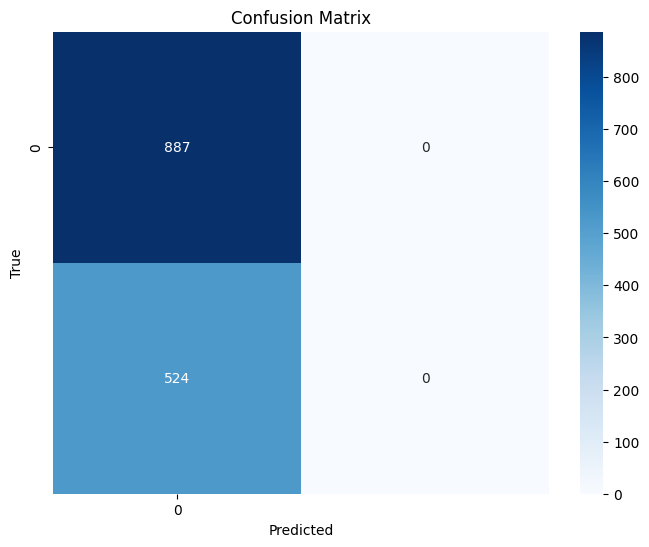

accuracy for class 0: 1.000
accuracy for class 1: 0.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6144578313253012
precision on train set:  0.3775584264769923
recall on train set:  0.6144578313253012
f1 score on train set:  0.4677216327998562
balanced accuracy on train set:  0.5
logistic loss on train set:  0.6931471805599452
mse on train set:  0.3855421686746988
Execution time: 1.046510934829712 seconds


In [32]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_1ook_beyondl1_model, mushroom_infbins_1ook_beyondl1_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'alpha': 1e-10}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 2.1544346900318866e-09}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 4.641588833612773e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 1e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 2.1544346900318823e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 0.00046415888336127724}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 0.01}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 0.21544346900318778}
  fold  1
  fold  2
  fold  3
  fold  4
  f

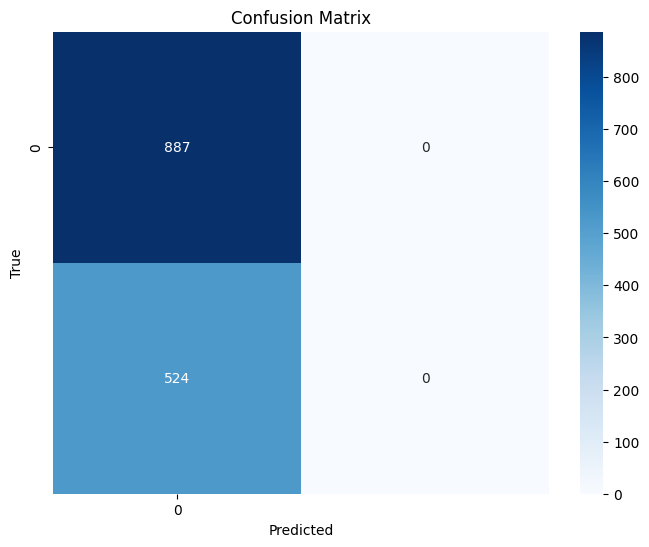

accuracy for class 0: 1.000
accuracy for class 1: 0.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6144578313253012
precision on train set:  0.3775584264769923
recall on train set:  0.6144578313253012
f1 score on train set:  0.4677216327998562
balanced accuracy on train set:  0.5
logistic loss on train set:  0.6931471805599452
mse on train set:  0.3855421686746988
Execution time: 8.653337001800537 seconds


In [33]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_1ook_adaptivelasso_model, mushroom_infbins_1ook_adaptivelasso_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & Diff Coding

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 1.010101010101

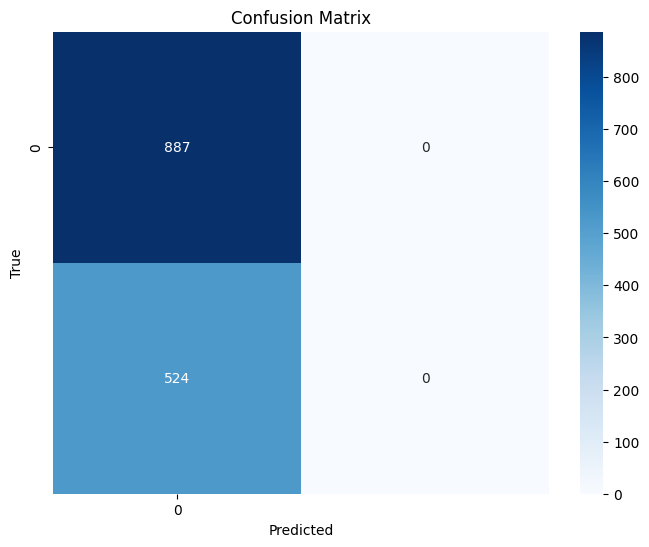

accuracy for class 0: 1.000
accuracy for class 1: 0.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6144578313253012
precision on train set:  0.3775584264769923
recall on train set:  0.6144578313253012
f1 score on train set:  0.4677216327998562
balanced accuracy on train set:  0.5
logistic loss on train set:  0.6931471805599452
mse on train set:  0.3855421686746988
Execution time: 8.506749868392944 seconds


In [34]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_diffcoding_ml_model, mushroom_infbins_diffcoding_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'C': 0.25}
  fold  1
  

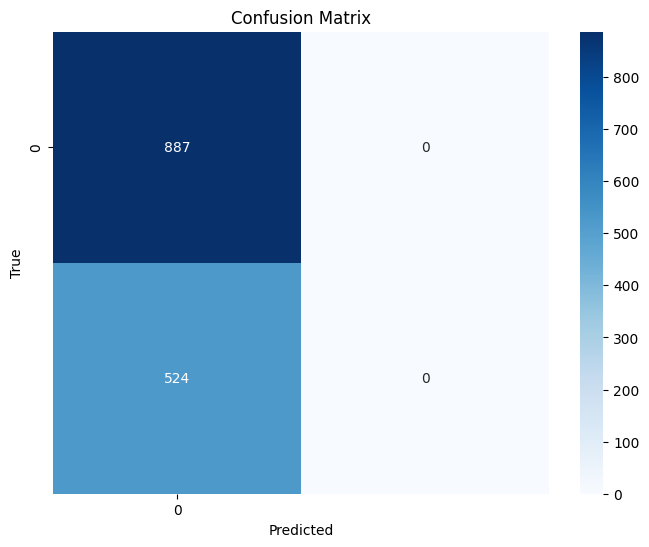

accuracy for class 0: 1.000
accuracy for class 1: 0.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6144578313253012
precision on train set:  0.3775584264769923
recall on train set:  0.6144578313253012
f1 score on train set:  0.4677216327998562
balanced accuracy on train set:  0.5
logistic loss on train set:  0.6931471805599452
mse on train set:  0.3855421686746988
Execution time: 20.49794578552246 seconds


In [35]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_diffcoding_mm_model, mushroom_infbins_diffcoding_mm_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x14ee76810>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x14eeae710>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x14eeaca90>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x14ee76810>, 'penalty': <skglm.penalties.separable.SCAD object at 0x14eeae310>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x14eeaca90>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
best parameters:  {'datafit': <skglm.datafits.single_task.Huber object at 0x14ee76810>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x14eeae710>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x14eeaca90>}
best score:  0.6144604374778456

Evaluating the model on the test set...
test predictions:  [0.38554217 0.38554217 0.38554217 ... 0.3855421

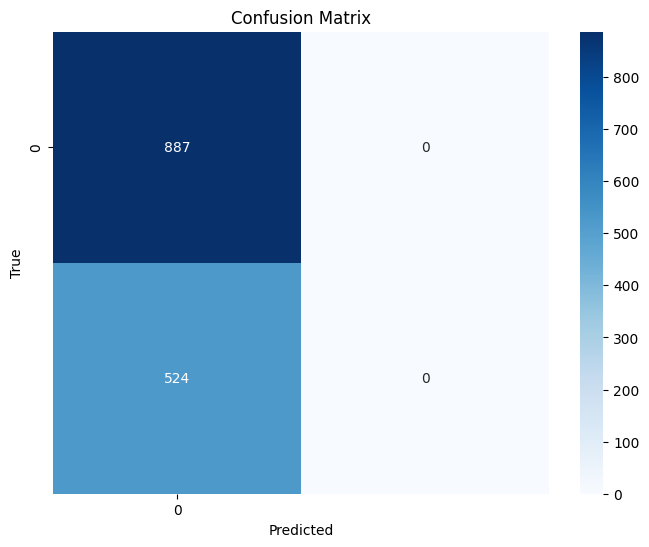

accuracy for class 0: 1.000
accuracy for class 1: 0.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6144578313253012
precision on train set:  0.3775584264769923
recall on train set:  0.6144578313253012
f1 score on train set:  0.4677216327998562
balanced accuracy on train set:  0.5
logistic loss on train set:  0.6931471805599452
mse on train set:  0.3855421686746988
Execution time: 0.6797542572021484 seconds


In [36]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_diffcoding_beyondl1_model, mushroom_infbins_diffcoding_beyondl1_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'alpha': 1e-10}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 2.1544346900318866e-09}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 4.641588833612773e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 1e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 2.1544346900318823e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 0.00046415888336127724}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 0.01}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6144604374778456
testing parameters: {'alpha': 0.21544346900318778}
  fold  1
  fold  2
  fold  3
  fold  4
  f

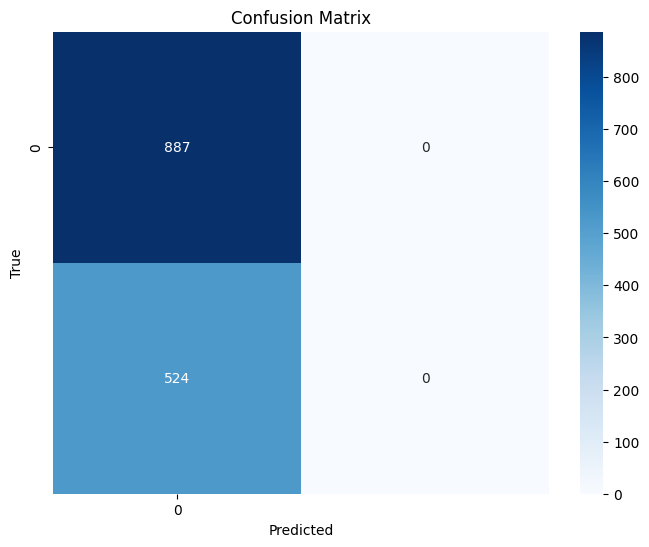

accuracy for class 0: 1.000
accuracy for class 1: 0.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6144578313253012
precision on train set:  0.3775584264769923
recall on train set:  0.6144578313253012
f1 score on train set:  0.4677216327998562
balanced accuracy on train set:  0.5
logistic loss on train set:  0.6931471805599452
mse on train set:  0.3855421686746988
Execution time: 3.4705100059509277 seconds


In [37]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_diffcoding_adaptivelasso_model, mushroom_infbins_diffcoding_adaptivelasso_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## spambase
classifying Email as Spam or Non-Spam

https://archive.ics.uci.edu/dataset/94/spambase

#### load dataset

num observations:  Class    4601
dtype: int64
num features:  57
target distribution:  Class
0        2788
1        1813
Name: count, dtype: int64


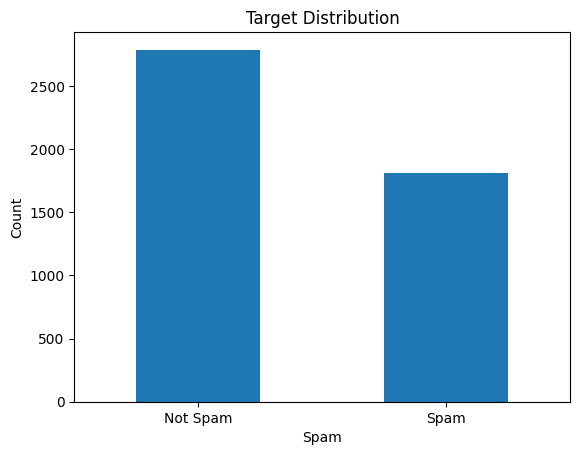

Proportion of positive class:  0.39404477287546186


In [2]:
# fetch dataset 
spambase_data = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
spambase_X = spambase_data.data.features 
spambase_y = spambase_data.data.targets 
  
# metadata 
# print(spambase_data.metadata) 
  
# variable information 
# print(spambase_data.variables) 

print("num observations: ", spambase_y.count())
print("num features: ", spambase_X.shape[1])
print("target distribution: ", spambase_y.value_counts())
# show target distribution
spambase_y['Class'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'], rotation=0)
plt.show()

# proportion of positive class
print("Proportion of positive class: ", spambase_y['Class'].mean())

In [3]:
categorical_columns = spambase_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    spambase_X[col] = spambase_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {spambase_X[col].unique()}")

categorical columns:  []


#### CAIM & 1ook

Execution time: 5.785086154937744 seconds

Evaluating the model on the test set...
test predictions:  [0 0 0 ... 1 0 0]
      True Value  Prediction
0              0           0
1              0           0
2              0           0
3              1           1
4              0           0
...          ...         ...
1146           0           0
1147           1           1
1148           1           1
1149           0           0
1150           0           0

[1151 rows x 2 columns]
auc:  0.9324618498909996
accuracy:  0.9383145091225021
precision:  0.9386916268031864
recall:  0.9383145091225021
f1 score:  0.938040884106539
balanced accuracy:  0.9324618498909997
logistic loss:  0.5522165936539372
mse:  0.06168549087749783
number of features:  171
number of non-zero weights:  163
model size (non-zero weights / all weights):  0.9532163742690059


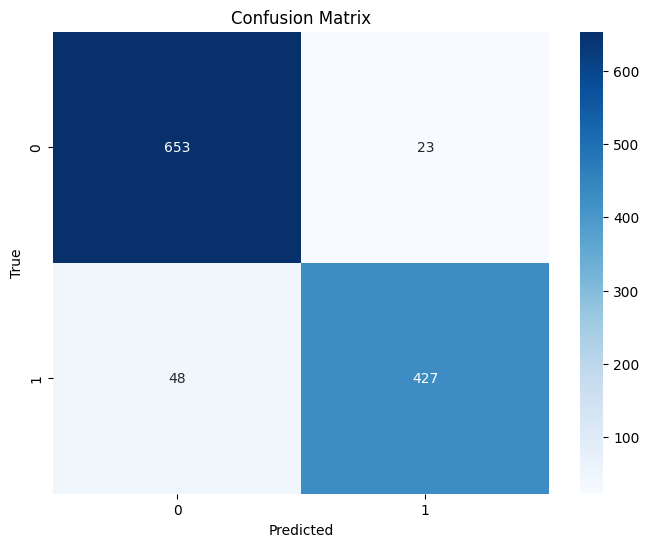

accuracy for class 0: 0.966
accuracy for class 1: 0.899

Evaluating the model on the train set...
auc on train set:  0.9357812287674955
accuracy on train set:  0.9411594202898551
precision on train set:  0.9410625969066748
recall on train set:  0.9411594202898551
f1 score on train set:  0.9410201483566041
balanced accuracy on train set:  0.9357812287674956
logistic loss on train set:  0.5588108612814231
mse on train set:  0.058840579710144926

Scorecard table:
                        Feature               Bin    Points
0                word_freq_make       [0.0, 0.07[ -0.450700
1                word_freq_make      [0.07, 4.54[ -0.827883
2                word_freq_make       [4.54, inf[  0.878773
3             word_freq_address       [0.0, 0.07[  1.510630
4             word_freq_address     [0.07, 14.28[  1.708516
..                          ...               ...       ...
158  capital_run_length_longest    [18.0, 9989.0[ -0.221313
159  capital_run_length_longest     [9989.0, inf[  0.75

In [4]:
start_time = time.time()

scorecard = Scorecard()
spambase_caim_1ook_ml_model, spambase_caim_1ook_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 1000.0, 'l1_ratio': 0.6, 'penalty': 'elasticnet', 'solver': 'saga'}
                )
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 1.1452932357788086 seconds

Evaluating the model on the test set...
test predictions:  [0 0 0 ... 1 0 0]
      True Value  Prediction
0              0           0
1              0           0
2              0           0
3              1           1
4              0           0
...          ...         ...
1146           0           0
1147           1           1
1148           1           1
1149           0           0
1150           0           0

[1151 rows x 2 columns]
auc:  0.9321488632824664
accuracy:  0.9383145091225021
precision:  0.9387976035699412
recall:  0.9383145091225021
f1 score:  0.9380161662485134
balanced accuracy:  0.9321488632824665
logistic loss:  0.5525466418668318
mse:  0.06168549087749783
number of features:  171
number of non-zero weights:  131
model size (non-zero weights / all weights):  0.7660818713450293


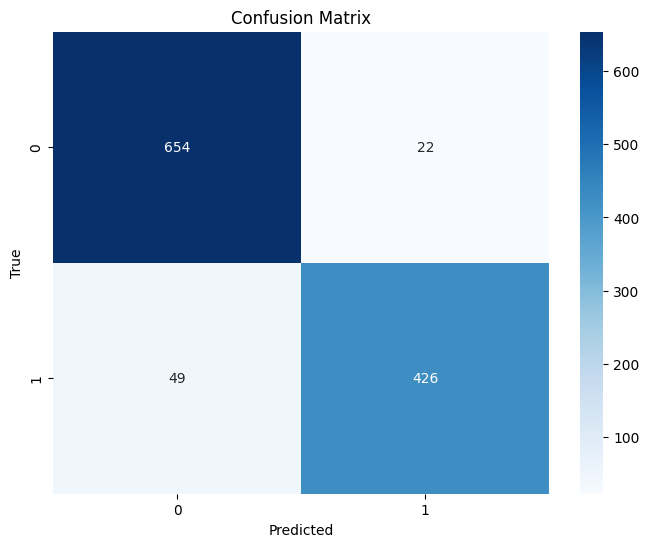

accuracy for class 0: 0.967
accuracy for class 1: 0.897

Evaluating the model on the train set...
auc on train set:  0.9376868460388641
accuracy on train set:  0.9423188405797102
precision on train set:  0.9422193104478918
recall on train set:  0.9423188405797102
f1 score on train set:  0.9422249978509358
balanced accuracy on train set:  0.937686846038864
logistic loss on train set:  0.5580400791216283
mse on train set:  0.057681159420289854

Scorecard table:
                        Feature               Bin    Points
0                word_freq_make       [0.0, 0.07[  0.135141
1                word_freq_make      [0.07, 4.54[ -0.164740
2                word_freq_make       [4.54, inf[  0.029600
3             word_freq_address       [0.0, 0.07[ -0.076865
4             word_freq_address     [0.07, 14.28[  0.076865
..                          ...               ...       ...
126  capital_run_length_longest    [18.0, 9989.0[  0.185725
127  capital_run_length_longest     [9989.0, inf[  0.050

In [5]:
start_time = time.time()

scorecard = Scorecard()
spambase_caim_1ook_mm_model, spambase_caim_1ook_mm_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params={'C': 1})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 2.8529410362243652 seconds

Evaluating the model on the test set...
test predictions:  [ 0.15521981  0.08841931 -0.05344629 ...  1.11048834  0.25434946
  0.15620675]
      True Value  Prediction
0              0           0
1              0           0
2              0           0
3              1           1
4              0           0
...          ...         ...
1146           0           0
1147           1           1
1148           1           1
1149           0           0
1150           0           0

[1151 rows x 2 columns]
auc:  0.9110962317035192
accuracy:  0.9209383145091226
precision:  0.9227363938557394
recall:  0.9209383145091226
f1 score:  0.9202088399626922
balanced accuracy:  0.9110962317035192
logistic loss:  0.5591476061247244
mse:  0.0790616854908775
number of features:  171
number of non-zero weights:  13
model size (non-zero weights / all weights):  0.07602339181286549


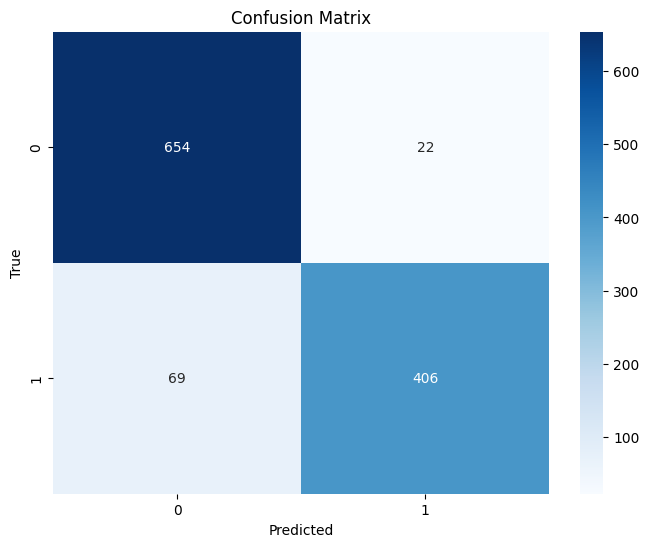

accuracy for class 0: 0.967
accuracy for class 1: 0.855

Evaluating the model on the train set...
auc on train set:  0.9039176093898629
accuracy on train set:  0.9162318840579711
precision on train set:  0.91688416521848
recall on train set:  0.9162318840579711
f1 score on train set:  0.915461195128884
balanced accuracy on train set:  0.9039176093898628
logistic loss on train set:  0.5680602471989608
mse on train set:  0.08376811594202899

Scorecard table:
                       Feature             Bin    Points
0                word_freq_our     [0.0, 0.04[ -0.099130
1             word_freq_remove     [0.0, 0.02[ -0.529946
2             word_freq_remove    [0.02, 7.27[ -0.327797
3               word_freq_free    [0.09, 20.0[  0.138954
4               word_freq_your    [0.6, 11.11[  0.090175
5                 word_freq_hp   [0.09, 20.83[ -0.208666
6             word_freq_george     [0.0, 0.01[  0.171581
7                word_freq_edu     [0.0, 0.12[  0.205754
8         word_freq_confer

In [6]:
start_time = time.time()

scorecard = Scorecard()
spambase_caim_1ook_beyondl1_model, spambase_caim_1ook_beyondl1_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 1.2173409461975098 seconds

Evaluating the model on the test set...
test predictions:  [ 0.19251084  0.07577613  0.02178265 ...  1.04473277  0.22543489
 -0.06685326]
      True Value  Prediction
0              0           0
1              0           0
2              0           0
3              1           1
4              0           0
...          ...         ...
1146           0           0
1147           1           1
1148           1           1
1149           0           0
1150           0           0

[1151 rows x 2 columns]
auc:  0.9188913111180318
accuracy:  0.9278887923544744
precision:  0.9294326604880166
recall:  0.9278887923544744
f1 score:  0.9272908221343095
balanced accuracy:  0.9188913111180317
logistic loss:  0.5571673168473565
mse:  0.07211120764552563
number of features:  171
number of non-zero weights:  171
model size (non-zero weights / all weights):  1.0


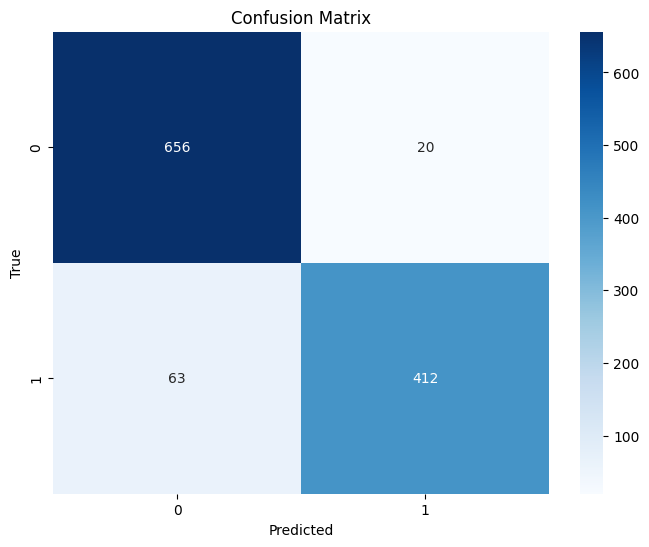

accuracy for class 0: 0.970
accuracy for class 1: 0.867

Evaluating the model on the train set...
auc on train set:  0.9210840892104906
accuracy on train set:  0.9318840579710145
precision on train set:  0.9326133742126431
recall on train set:  0.9318840579710145
f1 score on train set:  0.9313192025789053
balanced accuracy on train set:  0.9210840892104906
logistic loss on train set:  0.5645366716113273
mse on train set:  0.06811594202898551

Scorecard table:
                        Feature               Bin    Points
0                word_freq_make       [0.0, 0.07[ -0.034044
1                word_freq_make      [0.07, 4.54[ -0.049754
2                word_freq_make       [4.54, inf[  0.143903
3             word_freq_address       [0.0, 0.07[  0.085117
4             word_freq_address     [0.07, 14.28[  0.081698
..                          ...               ...       ...
166  capital_run_length_longest    [18.0, 9989.0[  0.019684
167  capital_run_length_longest     [9989.0, inf[  0.098

In [7]:
start_time = time.time()

scorecard = Scorecard()
spambase_caim_1ook_adaptivelasso_model, spambase_caim_1ook_adaptivelasso_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params= {'alpha': 1e-10})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & diff Coding

Execution time: 2.056330919265747 seconds

Evaluating the model on the test set...
test predictions:  [0 0 0 ... 1 0 0]
      True Value  Prediction
0              0           0
1              0           0
2              0           0
3              1           1
4              0           0
...          ...         ...
1146           0           0
1147           1           1
1148           1           1
1149           0           0
1150           0           0

[1151 rows x 2 columns]
auc:  0.9345671130488944
accuracy:  0.9400521285838401
precision:  0.9403503361092633
recall:  0.9400521285838401
f1 score:  0.9398098208984141
balanced accuracy:  0.9345671130488944
logistic loss:  0.5515564972281477
mse:  0.05994787141615986
number of features:  171
number of non-zero weights:  125
model size (non-zero weights / all weights):  0.7309941520467836


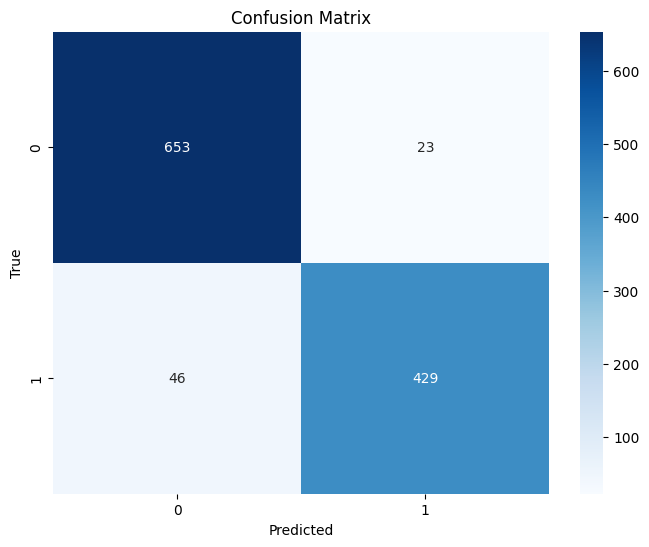

accuracy for class 0: 0.966
accuracy for class 1: 0.903

Evaluating the model on the train set...
auc on train set:  0.93564427911401
accuracy on train set:  0.9411594202898551
precision on train set:  0.9410677056868094
recall on train set:  0.9411594202898551
f1 score on train set:  0.9410112990060545
balanced accuracy on train set:  0.93564427911401
logistic loss on train set:  0.5589209730185367
mse on train set:  0.058840579710144926

Scorecard table:
                        Feature               Bin    Points
0                word_freq_make       [0.0, 0.07[ -0.008003
1                word_freq_make      [0.07, 4.54[ -0.301575
2             word_freq_address       [0.0, 0.07[ -0.008003
3             word_freq_address     [0.07, 14.28[  0.078972
4             word_freq_address      [14.28, inf[ -1.362210
..                          ...               ...       ...
120  capital_run_length_average    [3.38, 1102.5[  1.347724
121  capital_run_length_longest       [1.0, 18.0[ -0.008003

In [8]:
start_time = time.time()

scorecard = Scorecard()
spambase_caim_diffcoding_ml_model, spambase_caim_diffcoding_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params= {'C': 1/0.6, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 1.0167698860168457 seconds

Evaluating the model on the test set...
test predictions:  [0 0 0 ... 1 0 0]
      True Value  Prediction
0              0           0
1              0           0
2              0           0
3              1           1
4              0           0
...          ...         ...
1146           0           0
1147           1           1
1148           1           1
1149           0           0
1150           0           0

[1151 rows x 2 columns]
auc:  0.9324618498909996
accuracy:  0.9383145091225021
precision:  0.9386916268031864
recall:  0.9383145091225021
f1 score:  0.938040884106539
balanced accuracy:  0.9324618498909997
logistic loss:  0.552216593653937
mse:  0.06168549087749783
number of features:  171
number of non-zero weights:  131
model size (non-zero weights / all weights):  0.7660818713450293


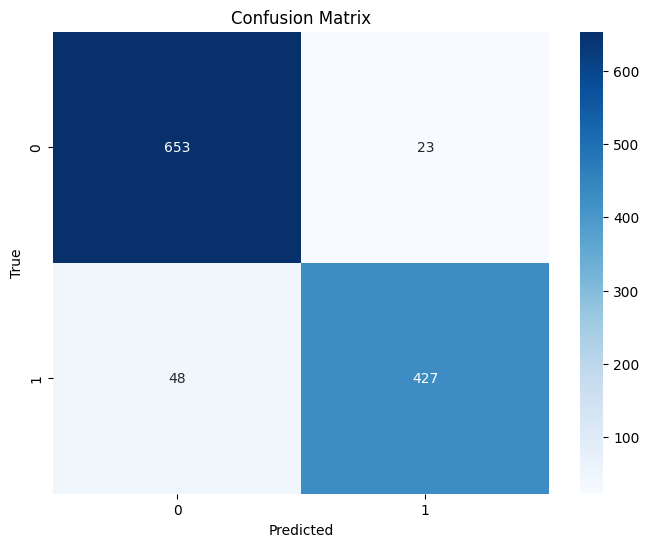

accuracy for class 0: 0.966
accuracy for class 1: 0.899

Evaluating the model on the train set...
auc on train set:  0.9346601525343117
accuracy on train set:  0.9402898550724638
precision on train set:  0.9401964355206225
recall on train set:  0.9402898550724638
f1 score on train set:  0.9401350368349758
balanced accuracy on train set:  0.9346601525343117
logistic loss on train set:  0.5591411964927638
mse on train set:  0.059710144927536235

Scorecard table:
                        Feature               Bin        Points
0                word_freq_make       [0.0, 0.07[ -1.705303e-13
1                word_freq_make      [0.07, 4.54[ -2.789638e-01
2                word_freq_make       [4.54, inf[  2.323271e-01
3             word_freq_address       [0.0, 0.07[ -1.705303e-13
4             word_freq_address     [0.07, 14.28[  1.189838e-01
..                          ...               ...           ...
126  capital_run_length_longest    [18.0, 9989.0[  4.243994e-01
127  capital_run_length

In [9]:
start_time = time.time()

scorecard = Scorecard()
spambase_caim_diffcoding_mm_model, spambase_caim_diffcoding_mm_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 1})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 1.8345050811767578 seconds

Evaluating the model on the test set...
test predictions:  [0.15115485 0.10171076 0.03432524 ... 1.0760385  0.24031834 0.0880904 ]
      True Value  Prediction
0              0           0
1              0           0
2              0           0
3              1           0
4              0           0
...          ...         ...
1146           0           0
1147           1           1
1148           1           1
1149           0           0
1150           0           0

[1151 rows x 2 columns]
auc:  0.9157334163811895
accuracy:  0.9252823631624674
precision:  0.9270725143397588
recall:  0.9252823631624674
f1 score:  0.9246106214599181
balanced accuracy:  0.9157334163811897
logistic loss:  0.5581574614860405
mse:  0.07471763683753258
number of features:  171
number of non-zero weights:  14
model size (non-zero weights / all weights):  0.08187134502923976


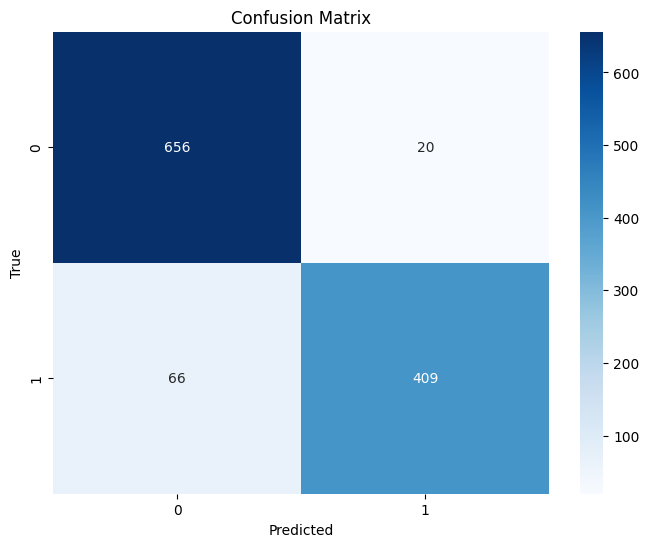

accuracy for class 0: 0.970
accuracy for class 1: 0.861

Evaluating the model on the train set...
auc on train set:  0.9061852408615302
accuracy on train set:  0.9188405797101449
precision on train set:  0.9197248511663925
recall on train set:  0.9188405797101449
f1 score on train set:  0.9180413048343264
balanced accuracy on train set:  0.9061852408615301
logistic loss on train set:  0.5679501354618471
mse on train set:  0.08115942028985507

Scorecard table:
                       Feature             Bin    Points
0                word_freq_our    [0.04, 10.0[  0.089163
1             word_freq_remove    [0.02, 7.27[  0.197796
2           word_freq_internet   [0.04, 11.11[  0.076740
3               word_freq_free    [0.09, 20.0[  0.138642
4               word_freq_your    [0.6, 11.11[  0.087331
5                 word_freq_hp   [0.09, 20.83[ -0.193569
6             word_freq_george   [0.01, 33.33[ -0.160469
7               word_freq_1999     [0.1, 6.89[ -0.066452
8            word_freq_

In [10]:
start_time = time.time()

scorecard = Scorecard()
spambase_caim_diffcoding_beyondl1_model, spambase_caim_diffcoding_beyondl1_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': SCAD(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 1.207841157913208 seconds

Evaluating the model on the test set...
test predictions:  [ 0.19251084  0.07577613  0.02178265 ...  1.04473277  0.22543489
 -0.06685326]
      True Value  Prediction
0              0           0
1              0           0
2              0           0
3              1           1
4              0           0
...          ...         ...
1146           0           0
1147           1           1
1148           1           1
1149           0           0
1150           0           0

[1151 rows x 2 columns]
auc:  0.9188913111180318
accuracy:  0.9278887923544744
precision:  0.9294326604880166
recall:  0.9278887923544744
f1 score:  0.9272908221343095
balanced accuracy:  0.9188913111180317
logistic loss:  0.5571673168473565
mse:  0.07211120764552563
number of features:  171
number of non-zero weights:  171
model size (non-zero weights / all weights):  1.0


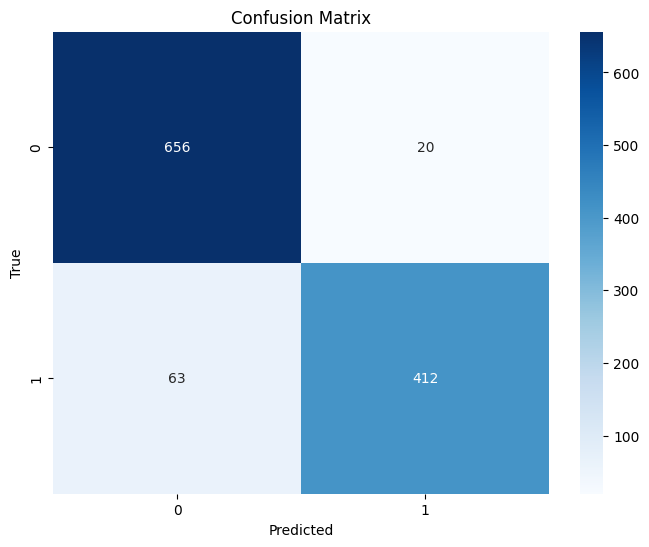

accuracy for class 0: 0.970
accuracy for class 1: 0.867

Evaluating the model on the train set...
auc on train set:  0.9210840892104906
accuracy on train set:  0.9318840579710145
precision on train set:  0.9326133742126431
recall on train set:  0.9318840579710145
f1 score on train set:  0.9313192025789053
balanced accuracy on train set:  0.9210840892104906
logistic loss on train set:  0.5645366716113273
mse on train set:  0.06811594202898551

Scorecard table:
                        Feature               Bin    Points
0                word_freq_make       [0.0, 0.07[  0.003373
1                word_freq_make      [0.07, 4.54[ -0.015710
2                word_freq_make       [4.54, inf[  0.189345
3             word_freq_address       [0.0, 0.07[  0.003373
4             word_freq_address     [0.07, 14.28[ -0.003418
..                          ...               ...       ...
166  capital_run_length_longest    [18.0, 9989.0[  0.076812
167  capital_run_length_longest     [9989.0, inf[  0.107

In [11]:
start_time = time.time()

scorecard = Scorecard()
spambase_caim_diffcoding_adaptivelasso_model, spambase_caim_diffcoding_adaptivelasso_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-10})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### inf bins & 1ook

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8324637681159419
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8142028985507247
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8194202898550724
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8092753623188406
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8081159420289854
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8034782608695652
testing parameters: {'C': 1.010101010101

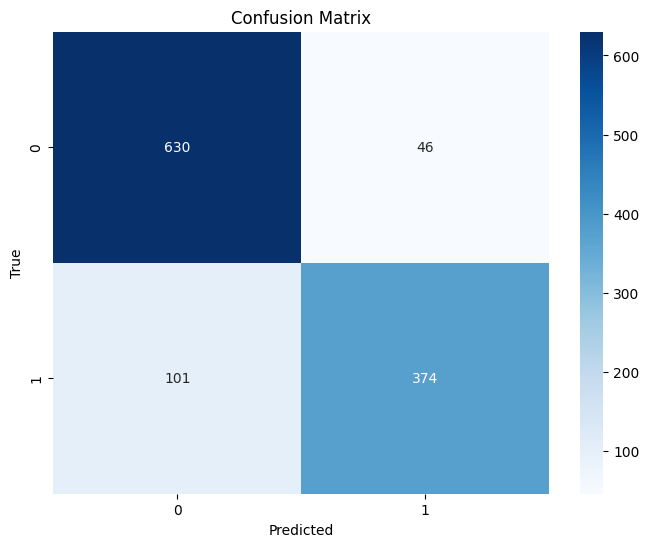

accuracy for class 0: 0.932
accuracy for class 1: 0.787

Evaluating the model on the train set...
auc on train set:  0.9992526158445441
accuracy on train set:  0.9994202898550725
precision on train set:  0.9994208383036486
recall on train set:  0.9994202898550725
f1 score on train set:  0.9994202102369886
balanced accuracy on train set:  0.9992526158445441
logistic loss on train set:  0.5460378997762522
mse on train set:  0.0005797101449275362

Scorecard table:
                        Feature               Bin    Points
0                word_freq_make    [0.005, 0.015[ -0.093743
1                word_freq_make    [0.015, 0.025[  0.322964
2                word_freq_make    [0.025, 0.035[ -0.684122
3                word_freq_make    [0.035, 0.045[ -0.915468
4                word_freq_make    [0.045, 0.055[ -0.009438
...                         ...               ...       ...
12978  capital_run_length_total  [3940.0, 6608.0[  0.351161
12979  capital_run_length_total  [6608.0, 9089.0[ -1.4

In [12]:
start_time = time.time()

scorecard = Scorecard()
spambase_infbins_1ook_ml_model, spambase_infbins_1ook_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6121739130434783
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6121739130434783
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6147826086956522
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6411594202898551
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7072463768115942
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8115942028985506
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8544927536231886
testing parameters: {'C': 0.125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8678260869565216
testing parameters: {'C': 0.25}
  fold  1
  

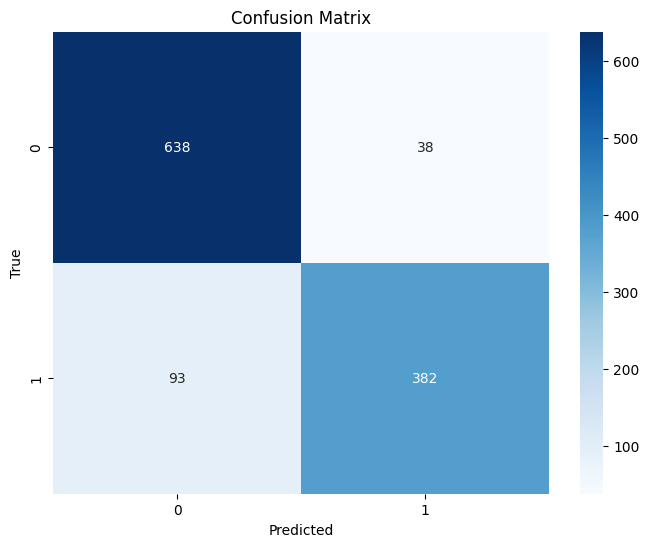

accuracy for class 0: 0.944
accuracy for class 1: 0.804

Evaluating the model on the train set...
auc on train set:  0.9863103427775513
accuracy on train set:  0.9892753623188406
precision on train set:  0.9894376824068927
recall on train set:  0.9892753623188406
f1 score on train set:  0.989248364843468
balanced accuracy on train set:  0.9863103427775513
logistic loss on train set:  0.5497816988381127
mse on train set:  0.010724637681159421

Scorecard table:
                        Feature               Bin    Points
0                word_freq_make    [0.005, 0.015[ -0.014191
1                word_freq_make    [0.015, 0.025[  0.055944
2                word_freq_make    [0.025, 0.035[ -0.089776
3                word_freq_make    [0.035, 0.045[ -0.147123
4                word_freq_make    [0.055, 0.065[ -0.070203
...                         ...               ...       ...
11974  capital_run_length_total  [3940.0, 6608.0[ -0.035865
11975  capital_run_length_total  [6608.0, 9089.0[ -0.102

In [13]:
start_time = time.time()

scorecard = Scorecard()
spambase_infbins_1ook_mm_model, spambase_infbins_1ook_mm_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x1369b0890>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x1369b0910>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x1369b0e50>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6121739130434783
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x1369b0890>, 'penalty': <skglm.penalties.separable.SCAD object at 0x1369b1790>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x1369b0e50>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6121739130434782
best parameters:  {'datafit': <skglm.datafits.single_task.Huber object at 0x1369b0890>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x1369b0910>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x1369b0e50>}
best score:  0.6121739130434783
Execution time: 10.621263027191162 seconds

Evaluating the model on the test set...
test predictions:  [0.4

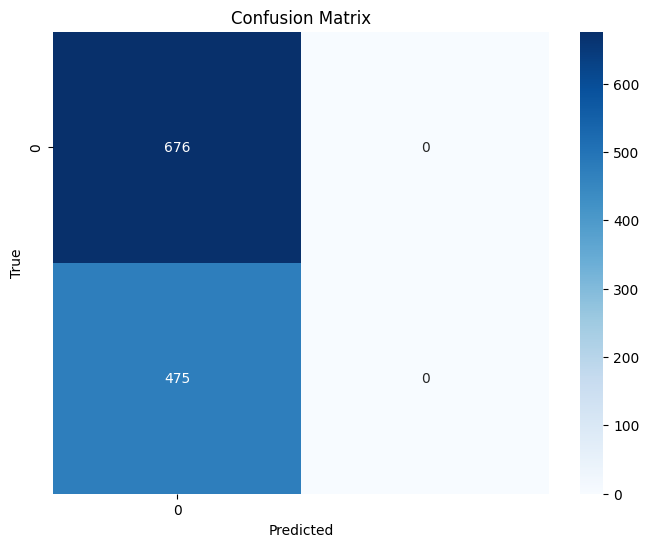

accuracy for class 0: 1.000
accuracy for class 1: 0.000

Evaluating the model on the train set...
auc on train set:  0.5
accuracy on train set:  0.6121739130434782
precision on train set:  0.37475689981096405
recall on train set:  0.6121739130434782
f1 score on train set:  0.46490877538576986
balanced accuracy on train set:  0.5
logistic loss on train set:  0.6931471805599453
mse on train set:  0.38782608695652177

Scorecard table:
                      Feature             Bin    Points
0  capital_run_length_longest  [116.5, 117.5[ -0.349316
1  capital_run_length_longest  [240.0, 246.0[ -0.318283
2  capital_run_length_longest  [276.0, 279.0[ -0.362246


In [ ]:
start_time = time.time()

scorecard = Scorecard()
spambase_infbins_1ook_beyondl1_model, spambase_infbins_1ook_beyondl1_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-10}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.8336231884057972
testing parameters: {'alpha': 2.1544346900318866e-09}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.8336231884057972
testing parameters: {'alpha': 4.641588833612773e-08}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.8336231884057972
testing parameters: {'alpha': 1e-06}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.8336231884057972
testing parameters: {'alpha': 2.1544346900318823e-05}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: minimize 0.00018115942028985507 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 1.00 ... 0.00 0.00]] @ var991 + -[0. 1. 0. ... 1. 0. 1.], 1.0) + norm1(param993 @ var991) is infeasible.
  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: minimize 0.00018115942028985507 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]] @ var1036 + -[1. 0. 1. ... 0. 0. 1.], 1.0) + norm1(param1038 @ var1036) is infeasible.
  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: minimize 0.00018115942028985507 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]] @ var1081 + -[1. 0. 0. ... 0. 0. 0.], 1.0) + norm1(param1083 @ var1081) is infeasible.
  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: minimize 0.00018115942028985507 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 1.00 ... 0.00 0.00]] @ var1126 + -[1. 0. 1. ... 0. 0. 1.], 1.0) + norm1(param1128 @ var1126) is infeasible.
  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: minimize 0.00018115942028985507 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 1.00 ... 0.00 0.00]] @ var1171 + -[1. 1. 0. ... 0. 0. 1.], 1.0) + norm1(param1173 @ var1171) is infeasible.
  mean score: 0.0
testing parameters: {'alpha': 0.00046415888336127724}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: minimize 0.00018115942028985507 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]] @ var1261 + -[1. 0. 1. ... 0. 0. 1.], 1.0) + norm1(param1263 @ var1261) is infeasible.
  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: minimize 0.00018115942028985507 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]] @ var1306 + -[1. 0. 0. ... 0. 0. 0.], 1.0) + norm1(param1308 @ var1306) is infeasible.
  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: minimize 0.00018115942028985507 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 1.00 ... 0.00 0.00]] @ var1351 + -[1. 0. 1. ... 0. 0. 1.], 1.0) + norm1(param1353 @ var1351) is infeasible.
  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.3081159420289855
testing parameters: {'alpha': 0.01}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.6113043478260869
testing parameters: {'alpha': 0.21544346900318778}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.6121739130434783
testing parameters: {'alpha': 4.641588833612772}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.6121739130434783
testing parameters: {'alpha': 100.0}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.6121739130434783
best parameters:  {'alpha': 1e-10}
best score:  0.8336231884057972


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


Execution time: 768.4250431060791 seconds

Evaluating the model on the test set...
test predictions:  [ 1.25188205e-04  2.18707755e-01 -2.54470505e-01 ...  6.67095262e-01
  4.66832323e-01  2.23908533e-01]
      True Value  Prediction
0              0           0
1              0           0
2              0           0
3              1           0
4              0           0
...          ...         ...
1146           0           1
1147           1           1
1148           1           1
1149           0           0
1150           0           0

[1151 rows x 2 columns]
auc:  0.8254375583930239
accuracy:  0.8331885317115552
precision:  0.8326125857090312
recall:  0.8331885317115552
f1 score:  0.8327352453544594
balanced accuracy:  0.825437558393024
logistic loss:  0.5706992935760365
mse:  0.16681146828844484
number of features:  13313
number of non-zero weights:  13313
model size (non-zero weights / all weights):  1.0


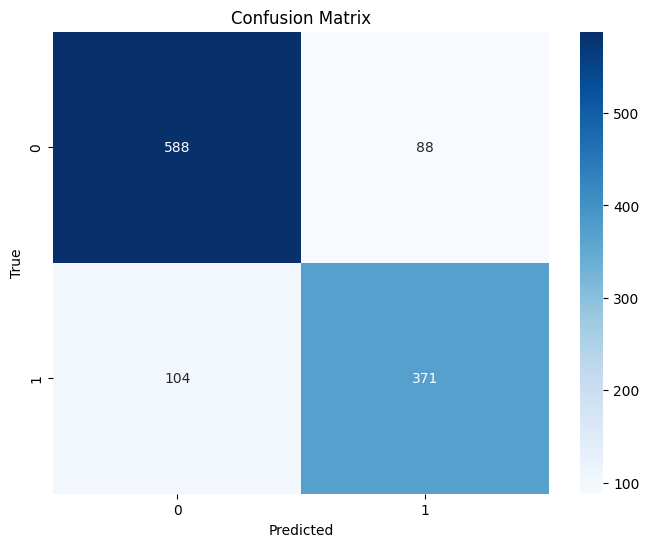

accuracy for class 0: 0.870
accuracy for class 1: 0.781

Evaluating the model on the train set...
auc on train set:  0.9993895654980296
accuracy on train set:  0.9994202898550725
precision on train set:  0.9994202898550725
recall on train set:  0.9994202898550725
f1 score on train set:  0.9994202898550725
balanced accuracy on train set:  0.9993895654980296
logistic loss on train set:  0.5459277880391387
mse on train set:  0.0005797101449275362

Scorecard table:
                        Feature               Bin    Points
0                word_freq_make    [0.005, 0.015[ -0.006174
1                word_freq_make    [0.015, 0.025[  0.032101
2                word_freq_make    [0.025, 0.035[ -0.007600
3                word_freq_make    [0.035, 0.045[ -0.146536
4                word_freq_make    [0.045, 0.055[  0.006604
...                         ...               ...       ...
13308  capital_run_length_total  [3940.0, 6608.0[  0.030817
13309  capital_run_length_total  [6608.0, 9089.0[ -0.0

In [ ]:
start_time = time.time()

scorecard = Scorecard()
spambase_infbins_1ook_adaptivelasso_model, spambase_infbins_1ook_adaptivelasso_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-10})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
spambase_infbins_diffcod_ml_model, spambase_infbins_diffcod_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.9281159420289855
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.9295652173913045
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.9307246376811594
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.9376811594202898
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.9362318840579711
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.9385507246376811
testing parameters: {'C': 1.010101010101

In [ ]:
start_time = time.time()

scorecard = Scorecard()
spambase_infbins_diffcod_mm_model, spambase_infbins_diffcod_mm_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
spambase_infbins_diffcod_beyondl1_model, spambase_infbins_diffcod_beyondl1_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
spambase_infbins_diffcod_adaptivelasso_model, spambase_infbins_diffcod_adaptivelasso_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

## (((advertisements)))
set of possible advertisements on Internet pages

https://archive.ics.uci.edu/dataset/51/internet+advertisements

#### load dataset

In [ ]:
# load dataset from file. target is last column
telemarketing_data = pd.read_csv('datasets/internet+advertisements/ad.data', dtype=str)
telemarketing_X = telemarketing_data.iloc[:, :-1]
telemarketing_y = telemarketing_data.iloc[:, -1]

telemarketing_y = telemarketing_y.map({'nonad.': 0, 'ad.': 1})

#  substitute '   ?' with NaN and drop rows with nulls
telemarketing_combined = pd.concat([telemarketing_X, telemarketing_y], axis=1)
telemarketing_combined = telemarketing_combined.replace('   ?', pd.NA)
print("num rows with nulls: ", telemarketing_combined.isnull().sum().sum())
telemarketing_combined = telemarketing_combined.dropna().reset_index(drop=True)
telemarketing_X = telemarketing_combined.iloc[:, :-1]
telemarketing_y = telemarketing_combined.iloc[:, -1]

print("num observations: ", telemarketing_y.count())
print("num features: ", telemarketing_X.shape[1])
print("target distribution: ", telemarketing_y.value_counts())
# show target distribution
telemarketing_y.value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Telemarketing')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Ad', 'Ad'], rotation=0)
plt.show()

# proportion of positive class
print("Proportion of positive class: ", telemarketing_y.mean())

In [ ]:
categorical_columns = telemarketing_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    telemarketing_X[col] = telemarketing_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {telemarketing_X[col].unique()}")

#### CAIM & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_1ook_ml_model, telemarketing_caim_1ook_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_1ook_mm_model, telemarketing_caim_1ook_mm_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params={'C': 0.0009765625})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_1ook_beyondl1_model, telemarketing_caim_1ook_beyondl1_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_1ook_adaptivelasso_model, telemarketing_caim_1ook_adaptivelasso_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-10})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_diffcod_ml_model, telemarketing_caim_diffcod_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_diffcod_mm_model, telemarketing_caim_diffcod_mm_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_diffcod_beyondl1_model, telemarketing_caim_diffcod_beyondl1_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_diffcod_adaptivelasso_model, telemarketing_caim_diffcod_adaptivelasso_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_1ook_ml_model, telemarketing_infbins_1ook_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_1ook_mm_model, telemarketing_infbins_1ook_mm_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_1ook_beyondl1_model, telemarketing_infbins_1ook_beyondl1_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_1ook_adaptivelasso_model, telemarketing_infbins_1ook_adaptivelasso_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_diffcod_ml_model, telemarketing_infbins_diffcod_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_diffcod_mm_model, telemarketing_infbins_diffcod_mm_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_diffcod_beyondl1_model, telemarketing_infbins_diffcod_beyondl1_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_diffcod_adaptivelasso_model, telemarketing_infbins_diffcod_adaptivelasso_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## breast cancer
predict if a breast tumor is malignant or benign

https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

#### load dataset

num rows with nulls:  16
num observations:  683
num features:  9
target distribution:  Class
0    444
1    239
Name: count, dtype: int64


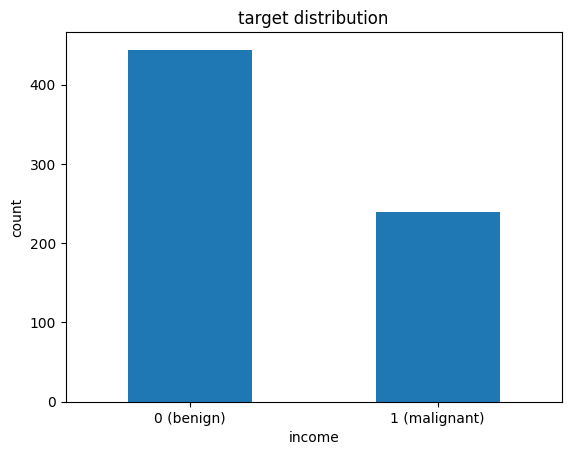

Proportion of positive class:  0.34992679355783307


In [59]:
# fetch dataset 
breast_cancer_data = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
breast_cancer_X = breast_cancer_data.data.features 
breast_cancer_y = breast_cancer_data.data.targets 

breast_cancer_y.loc[:,'Class'] = breast_cancer_y['Class'].map({4: 1, 2: 0})

# drop rows with nulls
breast_cancer_combined = pd.concat([breast_cancer_X, breast_cancer_y], axis=1)
print("num rows with nulls: ", breast_cancer_combined.isnull().sum().sum())
breast_cancer_combined = breast_cancer_combined.dropna()
breast_cancer_combined = breast_cancer_combined.reset_index(drop=True)
breast_cancer_X = breast_cancer_combined.iloc[:, :-1]
breast_cancer_y = breast_cancer_combined.iloc[:, -1]

# metadata 
# print(breast_cancer_data.metadata) 
  
# variable information 
# print(breast_cancer_data.variables) 

print("num observations: ", breast_cancer_y.count())
print("num features: ", breast_cancer_X.shape[1])
print("target distribution: ", breast_cancer_y.value_counts())
breast_cancer_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('income')
plt.ylabel('count')
plt.xticks([0, 1], ['0 (benign)', '1 (malignant)'], rotation=0)
plt.show()

# proportion of positive class
print("Proportion of positive class: ", breast_cancer_y.mean())

In [60]:
categorical_columns = breast_cancer_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    breast_cancer_X[col] = breast_cancer_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {breast_cancer_X[col].unique()}")

categorical columns:  []


#### CAIM & 1ook

Execution time: 0.041764259338378906 seconds

Evaluating the model on the test set...
test predictions:  [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0]
     True Value  Prediction
0             1           1
1             1           1
2             0           0
3             0           0
4             0           0
..          ...         ...
166           0           0
167           0           0
168           1           1
169           1           1
170           1           0

[171 rows x 2 columns]
auc:  0.943675042832667
accuracy:  0.9532163742690059
precision:  0.9549037830840295
recall:  0.9532163742690059
f1 score:  0.9527987845763417
balanced accuracy:  0.943675042832667
logist

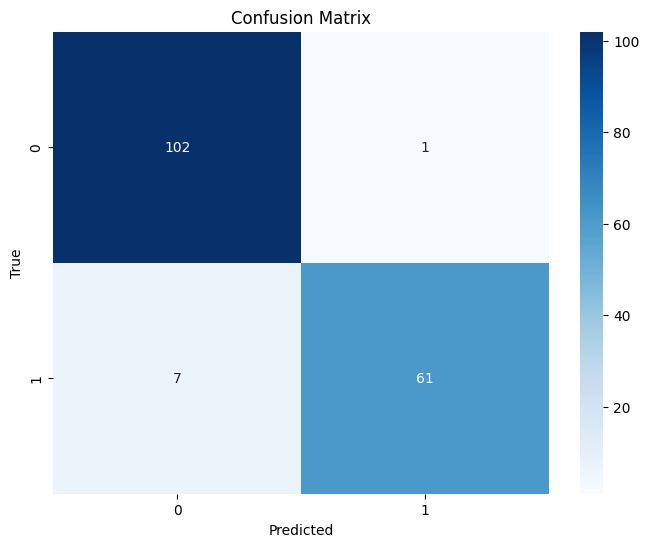

accuracy for class 0: 0.990
accuracy for class 1: 0.897

Evaluating the model on the train set...
auc on train set:  0.9780401639484831
accuracy on train set:  0.978515625
precision on train set:  0.9786820052667824
recall on train set:  0.978515625
f1 score on train set:  0.9785615735256452
balanced accuracy on train set:  0.9780401639484831
logistic loss on train set:  0.5692392170092273
mse on train set:  0.021484375

Scorecard table:
                        Feature          Bin    Points
0               Clump_thickness   [1.0, 6.0[ -1.515969
1               Clump_thickness  [6.0, 10.0[ -0.139594
2               Clump_thickness  [10.0, inf[  2.371924
3       Uniformity_of_cell_size   [1.0, 3.0[ -1.758701
4       Uniformity_of_cell_size  [10.0, inf[  1.871918
5      Uniformity_of_cell_shape   [1.0, 3.0[ -1.656279
6      Uniformity_of_cell_shape  [3.0, 10.0[  0.148981
7      Uniformity_of_cell_shape  [10.0, inf[  0.890371
8             Marginal_adhesion   [1.0, 3.0[ -0.738301
9       

In [61]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_1ook_ml_model, breast_cancer_caim_1ook_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 2.5, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.014789104461669922 seconds

Evaluating the model on the test set...
test predictions:  [1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0]
     True Value  Prediction
0             1           1
1             1           1
2             0           0
3             0           0
4             0           0
..          ...         ...
166           0           0
167           0           0
168           1           1
169           1           1
170           1           0

[171 rows x 2 columns]
auc:  0.9730868075385495
accuracy:  0.9766081871345029
precision:  0.9767651451861977
recall:  0.9766081871345029
f1 score:  0.9765460820056263
balanced accuracy:  0.9730868075385495
logi

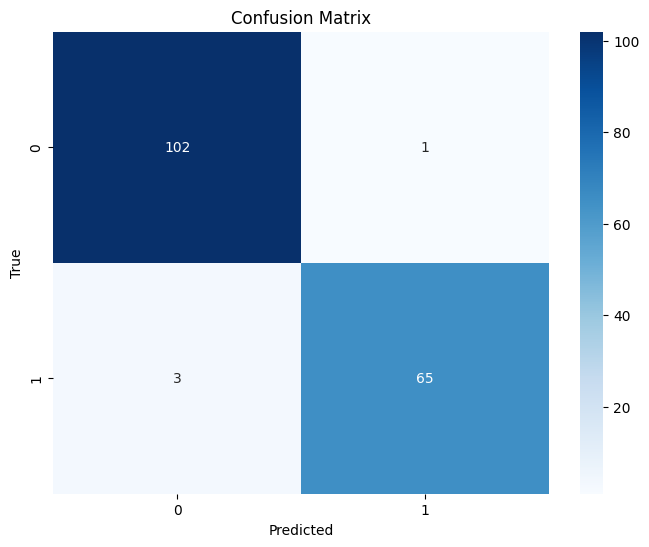

accuracy for class 0: 0.990
accuracy for class 1: 0.956

Evaluating the model on the train set...
auc on train set:  0.975107612628835
accuracy on train set:  0.974609375
precision on train set:  0.9749924961106602
recall on train set:  0.974609375
f1 score on train set:  0.9746985430350462
balanced accuracy on train set:  0.975107612628835
logistic loss on train set:  0.5692392170092273
mse on train set:  0.025390625

Scorecard table:
                        Feature          Bin    Points
0               Clump_thickness   [1.0, 6.0[ -0.731628
1               Clump_thickness  [6.0, 10.0[ -0.088156
2               Clump_thickness  [10.0, inf[  0.819784
3       Uniformity_of_cell_size   [1.0, 3.0[ -0.528109
4       Uniformity_of_cell_size  [3.0, 10.0[ -0.190840
5       Uniformity_of_cell_size  [10.0, inf[  0.718949
6      Uniformity_of_cell_shape   [1.0, 3.0[ -0.633166
7      Uniformity_of_cell_shape  [3.0, 10.0[  0.133166
8      Uniformity_of_cell_shape  [10.0, inf[  0.500000
9         

In [62]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_1ook_mm_model, breast_cancer_caim_1ook_mm_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params={'C': 0.5})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.012487173080444336 seconds

Evaluating the model on the test set...
test predictions:  [ 9.63858784e-01  9.99946973e-01 -6.71367985e-03 -6.71367985e-03
 -7.61416155e-03  7.86087728e-04  1.63575856e-01  2.12014154e-01
  5.03739569e-01 -4.37023508e-02 -4.37023508e-02 -7.61416155e-03
  2.70025172e-01  9.88351551e-02  5.34141926e-01  1.09572520e+00
 -6.71367985e-03  8.41073181e-01  3.29968895e-01  1.09572520e+00
  1.16969128e+00 -4.37023508e-02  1.09572520e+00 -6.71367985e-03
  7.86087728e-04 -4.37023508e-02  1.05123676e+00  1.18991402e+00
 -4.37023508e-02  7.06220798e-01 -4.37023508e-02  1.08546399e+00
  8.11769633e-01  4.77671234e-01 -4.37023508e-02 -4.37023508e-02
  1.07391305e+00  1.27487666e-01  7.67281194e-01  8.68489567e-01
 -4.37023508e-02  1.03782486e+00  1.02057872e+00  2.93745094e-02
 -6.71367985e-03  7.06220798e-01 -6.71367985e-03  1.02057872e+00
  3.14441267e-02  9.43636045e-01  2.93745094e-02 -4.37023508e-02
 -4.37023508e-02  7.38675033e-01 -4.37023508e-02  

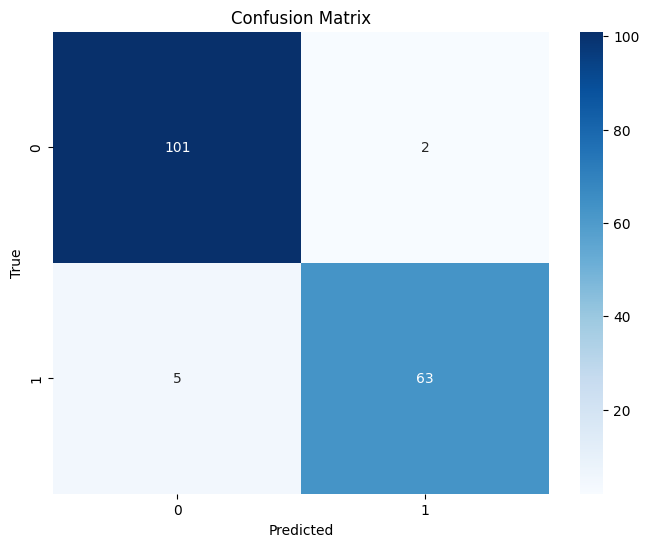

accuracy for class 0: 0.981
accuracy for class 1: 0.926

Evaluating the model on the train set...
auc on train set:  0.97363276225755
accuracy on train set:  0.970703125
precision on train set:  0.9717161615210843
recall on train set:  0.970703125
f1 score on train set:  0.9708828330380616
balanced accuracy on train set:  0.97363276225755
logistic loss on train set:  0.56849725315563
mse on train set:  0.029296875

Scorecard table:
                        Feature          Bin    Points
0               Clump_thickness  [6.0, 10.0[  0.105549
1               Clump_thickness  [10.0, inf[  0.237415
2       Uniformity_of_cell_size   [1.0, 3.0[ -0.123503
3       Uniformity_of_cell_size  [3.0, 10.0[  0.078978
4       Uniformity_of_cell_size  [10.0, inf[  0.183428
5      Uniformity_of_cell_shape   [1.0, 3.0[ -0.171190
6             Marginal_adhesion   [1.0, 3.0[ -0.075146
7   Single_epithelial_cell_size  [2.0, 10.0[ -0.036088
8                   Bare_nuclei   [1.0, 3.0[  0.086142
9             

In [63]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_1ook_beyondl1_model, breast_cancer_caim_1ook_beyondl1_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()
scorecard.show_scorecard()

Execution time: 0.03826117515563965 seconds

Evaluating the model on the test set...
test predictions:  [ 0.93531079  1.01275037 -0.00621219 -0.00621219 -0.00686903 -0.00786387
  0.16439385  0.26692657  0.49484012 -0.04459955 -0.04459955 -0.00686903
  0.26504974  0.09378685  0.51870835  1.0702169  -0.00621219  0.79986675
  0.32199804  1.14577674  1.12054942  0.01227313  1.0702169  -0.00621219
 -0.00786387 -0.04459955  1.03348122  1.22051698 -0.04459955  0.68492053
 -0.04459955  1.09036762  0.79017387  0.54157748 -0.04459955 -0.04459955
  1.17676108  0.12666334  0.75343819  0.90582184 -0.04459955  1.04251599
  0.99408609  0.03151833 -0.00621219  0.7470475  -0.00621219  0.99408609
  0.03153127  0.98195265  0.03151833 -0.04459955 -0.04459955  0.72244525
 -0.04459955  1.03078119  0.3586581  -0.00621219  0.12666334  1.15734936
 -0.04459955 -0.04459955 -0.00621219  1.12942527 -0.04459955  0.12666334
  0.90951249  0.48197267 -0.04459955 -0.00621219  0.60055856 -0.00621219
  0.21071074  0.0315

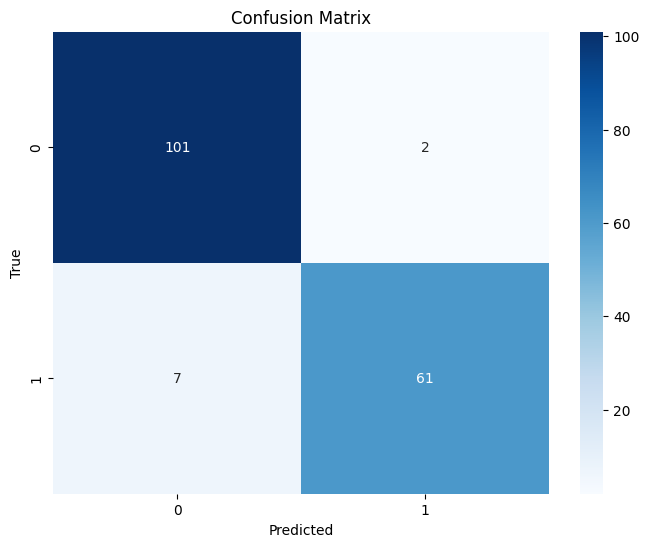

accuracy for class 0: 0.981
accuracy for class 1: 0.897

Evaluating the model on the train set...
auc on train set:  0.9750990379173741
accuracy on train set:  0.97265625
precision on train set:  0.9734756797649604
recall on train set:  0.97265625
f1 score on train set:  0.9728064725519288
balanced accuracy on train set:  0.9750990379173741
logistic loss on train set:  0.56849725315563
mse on train set:  0.02734375

Scorecard table:
                        Feature          Bin    Points
0               Clump_thickness   [1.0, 6.0[ -0.026561
1               Clump_thickness  [6.0, 10.0[  0.073438
2               Clump_thickness  [10.0, inf[  0.208344
3       Uniformity_of_cell_size   [1.0, 3.0[ -0.075827
4       Uniformity_of_cell_size  [3.0, 10.0[  0.119508
5       Uniformity_of_cell_size  [10.0, inf[  0.211539
6      Uniformity_of_cell_shape   [1.0, 3.0[ -0.027033
7      Uniformity_of_cell_shape  [3.0, 10.0[  0.144230
8      Uniformity_of_cell_shape  [10.0, inf[  0.138023
9            

In [64]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_1ook_adaptivelasso_model, breast_cancer_caim_1ook_adaptivelasso_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-10})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()
scorecard.show_scorecard()

#### CAIM & Diff Coding

Execution time: 0.0682680606842041 seconds

Evaluating the model on the test set...
test predictions:  [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0]
     True Value  Prediction
0             1           1
1             1           1
2             0           0
3             0           0
4             0           0
..          ...         ...
166           0           0
167           0           0
168           1           1
169           1           1
170           1           0

[171 rows x 2 columns]
auc:  0.9363221016561964
accuracy:  0.9473684210526315
precision:  0.9496744842732763
recall:  0.9473684210526315
f1 score:  0.9468052706282575
balanced accuracy:  0.9363221016561964
logist

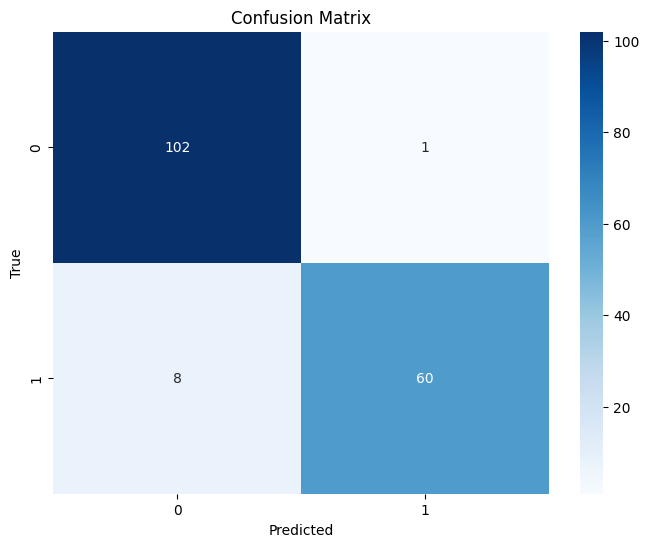

accuracy for class 0: 0.990
accuracy for class 1: 0.882

Evaluating the model on the train set...
auc on train set:  0.9780401639484831
accuracy on train set:  0.978515625
precision on train set:  0.9786820052667824
recall on train set:  0.978515625
f1 score on train set:  0.9785615735256452
balanced accuracy on train set:  0.9780401639484831
logistic loss on train set:  0.5692392170092273
mse on train set:  0.021484375

Scorecard table:
                        Feature          Bin    Points
0               Clump_thickness  [6.0, 10.0[  1.385755
1               Clump_thickness  [10.0, inf[  2.387167
2       Uniformity_of_cell_size  [3.0, 10.0[  1.693916
3       Uniformity_of_cell_size  [10.0, inf[  1.851052
4      Uniformity_of_cell_shape  [3.0, 10.0[  1.680357
5      Uniformity_of_cell_shape  [10.0, inf[  0.769067
6             Marginal_adhesion  [3.0, 10.0[  0.692444
7             Marginal_adhesion  [10.0, inf[  1.070027
8   Single_epithelial_cell_size  [2.0, 10.0[ -1.105857
9   Sing

In [65]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_diffcoding_ml_model, breast_cancer_caim_diffcoding_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 2.5, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()
scorecard.show_scorecard()

Execution time: 0.027126073837280273 seconds

Evaluating the model on the test set...
test predictions:  [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0]
     True Value  Prediction
0             1           1
1             1           1
2             0           0
3             0           0
4             0           0
..          ...         ...
166           0           0
167           0           0
168           1           1
169           1           1
170           1           0

[171 rows x 2 columns]
auc:  0.9510279840091376
accuracy:  0.9590643274853801
precision:  0.960224635663232
recall:  0.9590643274853801
f1 score:  0.9587681321775793
balanced accuracy:  0.9510279840091376
logis

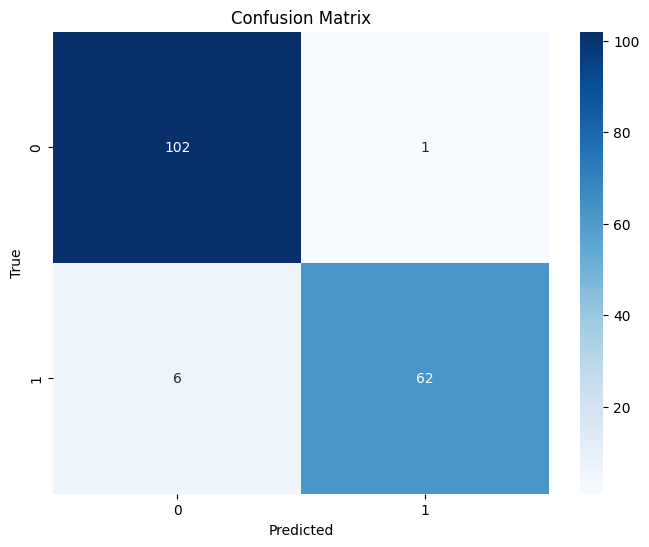

accuracy for class 0: 0.990
accuracy for class 1: 0.912

Evaluating the model on the train set...
auc on train set:  0.9765738882886591
accuracy on train set:  0.9765625
precision on train set:  0.9768269128868164
recall on train set:  0.9765625
f1 score on train set:  0.9766288397104711
balanced accuracy on train set:  0.9765738882886591
logistic loss on train set:  0.5692392170092273
mse on train set:  0.0234375

Scorecard table:
                        Feature          Bin        Points
0               Clump_thickness   [1.0, 6.0[  1.332268e-15
1               Clump_thickness  [6.0, 10.0[  8.431884e-01
2               Clump_thickness  [10.0, inf[  1.072179e+00
3       Uniformity_of_cell_size   [1.0, 3.0[  1.332268e-15
4       Uniformity_of_cell_size  [3.0, 10.0[  5.285948e-01
5       Uniformity_of_cell_size  [10.0, inf[  1.073479e+00
6      Uniformity_of_cell_shape   [1.0, 3.0[  1.332268e-15
7      Uniformity_of_cell_shape  [3.0, 10.0[  7.144495e-01
8      Uniformity_of_cell_shape  

In [66]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_diffcoding_mm_model, breast_cancer_caim_diffcoding_mm_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params= {'C': 1})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()
scorecard.show_scorecard()

Execution time: 0.012700080871582031 seconds

Evaluating the model on the test set...
test predictions:  [ 1.02589069  1.02589069 -0.03287806 -0.03287806 -0.03287806  0.02348608
  0.15015004  0.19260544  0.5120074  -0.03287806 -0.03287806 -0.03287806
  0.30047989  0.11745179  0.58232752  1.02589069 -0.03287806  0.95198263
  0.37076579  1.02589069  1.03199236 -0.03287806  1.02589069 -0.03287806
  0.02348608 -0.03287806  0.96952656  1.17493006 -0.03287806  0.73262314
 -0.03287806  1.02589069  0.88295299  0.39443167 -0.03287806 -0.03287806
  1.03199236  0.15015004  0.82658886  0.80294326 -0.03287806  1.03199236
  0.94588096 -0.03287806 -0.03287806  0.73262314 -0.03287806  0.94588096
  0.04713167  0.88295299 -0.03287806 -0.03287806 -0.03287806  0.73918698
 -0.03287806  1.02460021  0.35684403 -0.03287806  0.15015004  1.09492033
 -0.03287806 -0.03287806 -0.03287806  0.96952656 -0.03287806  0.15015004
  0.95198263  0.52596339 -0.03287806 -0.03287806  0.57745977 -0.03287806
  0.19260544 -0.032

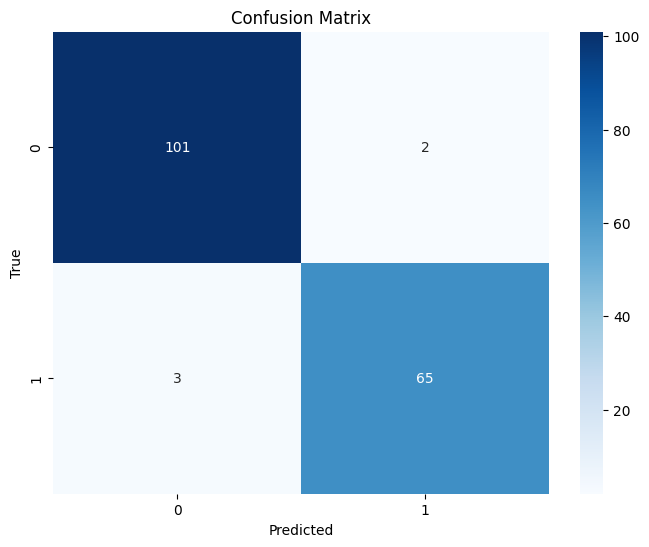

accuracy for class 0: 0.981
accuracy for class 1: 0.956

Evaluating the model on the train set...
auc on train set:  0.97363276225755
accuracy on train set:  0.970703125
precision on train set:  0.9717161615210843
recall on train set:  0.970703125
f1 score on train set:  0.9708828330380616
balanced accuracy on train set:  0.97363276225755
logistic loss on train set:  0.56849725315563
mse on train set:  0.029296875

Scorecard table:
                    Feature          Bin    Points
0           Clump_thickness  [6.0, 10.0[  0.150330
1   Uniformity_of_cell_size  [3.0, 10.0[  0.220616
2   Uniformity_of_cell_size  [10.0, inf[  0.149039
3  Uniformity_of_cell_shape  [3.0, 10.0[  0.183028
4         Marginal_adhesion  [3.0, 10.0[  0.080010
5               Bare_nuclei  [3.0, 10.0[  0.225483
6               Bare_nuclei  [10.0, inf[  0.142938
7           Normal_nucleoli  [2.0, 10.0[  0.056364


In [67]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_diffcoding_beyondl1_model, breast_cancer_caim_diffcoding_beyondl1_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()
scorecard.show_scorecard()

Execution time: 0.023578882217407227 seconds

Evaluating the model on the test set...
test predictions:  [ 0.93531079  1.01275037 -0.00621219 -0.00621219 -0.00686903 -0.00786387
  0.16439385  0.26692657  0.49484012 -0.04459955 -0.04459955 -0.00686903
  0.26504974  0.09378685  0.51870835  1.0702169  -0.00621219  0.79986675
  0.32199804  1.14577674  1.12054942  0.01227313  1.0702169  -0.00621219
 -0.00786387 -0.04459955  1.03348122  1.22051698 -0.04459955  0.68492053
 -0.04459955  1.09036762  0.79017387  0.54157748 -0.04459955 -0.04459955
  1.17676108  0.12666334  0.75343819  0.90582184 -0.04459955  1.04251599
  0.99408609  0.03151833 -0.00621219  0.7470475  -0.00621219  0.99408609
  0.03153127  0.98195265  0.03151833 -0.04459955 -0.04459955  0.72244525
 -0.04459955  1.03078119  0.3586581  -0.00621219  0.12666334  1.15734936
 -0.04459955 -0.04459955 -0.00621219  1.12942527 -0.04459955  0.12666334
  0.90951249  0.48197267 -0.04459955 -0.00621219  0.60055856 -0.00621219
  0.21071074  0.031

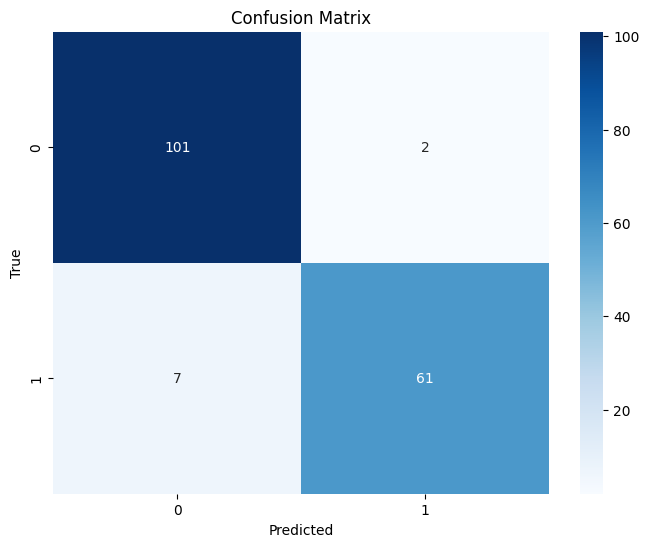

accuracy for class 0: 0.981
accuracy for class 1: 0.897

Evaluating the model on the train set...
auc on train set:  0.9750990379173741
accuracy on train set:  0.97265625
precision on train set:  0.9734756797649604
recall on train set:  0.97265625
f1 score on train set:  0.9728064725519288
balanced accuracy on train set:  0.9750990379173741
logistic loss on train set:  0.56849725315563
mse on train set:  0.02734375

Scorecard table:
                        Feature          Bin    Points
0               Clump_thickness   [1.0, 6.0[ -0.000763
1               Clump_thickness  [6.0, 10.0[  0.099999
2               Clump_thickness  [10.0, inf[  0.134906
3       Uniformity_of_cell_size   [1.0, 3.0[ -0.000763
4       Uniformity_of_cell_size  [3.0, 10.0[  0.195335
5       Uniformity_of_cell_size  [10.0, inf[  0.092031
6      Uniformity_of_cell_shape   [1.0, 3.0[ -0.000763
7      Uniformity_of_cell_shape  [3.0, 10.0[  0.171263
8      Uniformity_of_cell_shape  [10.0, inf[ -0.006207
9            

In [68]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_diffcoding_adaptivelasso_model, breast_cancer_caim_diffcoding_adaptivelasso_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-10})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()
scorecard.show_scorecard()

#### Inf Bins & 1ook

Execution time: 0.03643393516540527 seconds

Evaluating the model on the test set...
test predictions:  [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0]
     True Value  Prediction
0             1           1
1             1           1
2             0           0
3             0           0
4             0           0
..          ...         ...
166           0           0
167           0           0
168           1           1
169           1           1
170           1           0

[171 rows x 2 columns]
auc:  0.9363221016561964
accuracy:  0.9473684210526315
precision:  0.9496744842732763
recall:  0.9473684210526315
f1 score:  0.9468052706282575
balanced accuracy:  0.9363221016561964
logis

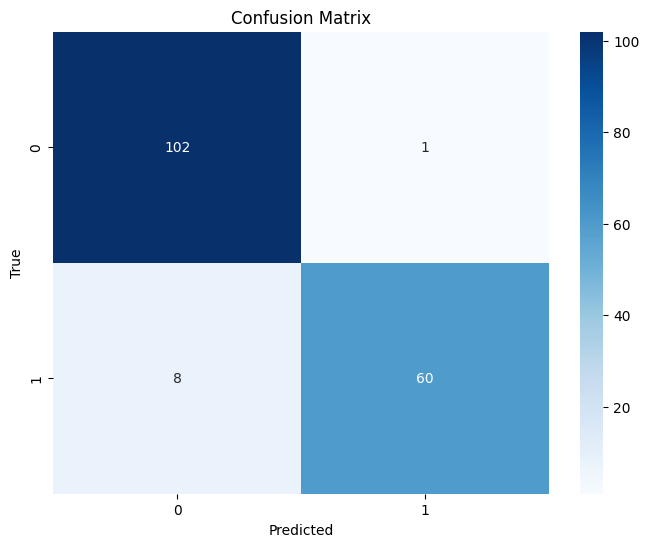

accuracy for class 0: 0.990
accuracy for class 1: 0.882

Evaluating the model on the train set...
auc on train set:  0.9853715422476034
accuracy on train set:  0.98828125
precision on train set:  0.9882805761252093
recall on train set:  0.98828125
f1 score on train set:  0.9882639157636739
balanced accuracy on train set:  0.9853715422476034
logistic loss on train set:  0.5692392170092273
mse on train set:  0.01171875

Scorecard table:
            Feature         Bin    Points
0   Clump_thickness  [2.5, 3.5[ -0.963645
1   Clump_thickness  [3.5, 4.5[  0.353655
2   Clump_thickness  [4.5, 5.5[ -0.362336
3   Clump_thickness  [5.5, 6.5[ -0.155873
4   Clump_thickness  [6.5, 7.5[  1.622540
..              ...         ...       ...
61  Normal_nucleoli  [8.5, 9.5[  0.460424
62  Normal_nucleoli  [9.5, inf[  2.361057
63          Mitoses  [1.5, 2.5[  0.530597
64          Mitoses  [4.5, 5.5[  0.138731
65          Mitoses  [6.5, 7.5[  0.164785

[66 rows x 3 columns]


In [69]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_1ook_ml_model, breast_cancer_infbins_1ook_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 2.5, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()
scorecard.show_scorecard()

Execution time: 0.008275032043457031 seconds

Evaluating the model on the test set...
test predictions:  [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0]
     True Value  Prediction
0             1           1
1             1           1
2             0           0
3             0           0
4             0           0
..          ...         ...
166           0           0
167           0           0
168           1           1
169           1           1
170           1           0

[171 rows x 2 columns]
auc:  0.9363221016561964
accuracy:  0.9473684210526315
precision:  0.9496744842732763
recall:  0.9473684210526315
f1 score:  0.9468052706282575
balanced accuracy:  0.9363221016561964
logi

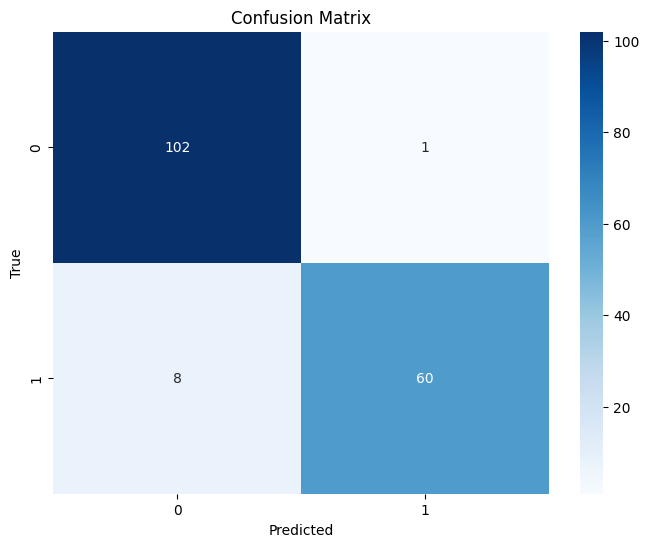

accuracy for class 0: 0.990
accuracy for class 1: 0.882

Evaluating the model on the train set...
auc on train set:  0.9692682341239217
accuracy on train set:  0.97265625
precision on train set:  0.97265625
recall on train set:  0.97265625
f1 score on train set:  0.97265625
balanced accuracy on train set:  0.9692682341239217
logistic loss on train set:  0.5714651085700186
mse on train set:  0.02734375

Scorecard table:
            Feature         Bin    Points
0   Clump_thickness  [1.5, 2.5[ -0.026950
1   Clump_thickness  [2.5, 3.5[ -0.119093
2   Clump_thickness  [3.5, 4.5[ -0.026593
3   Clump_thickness  [4.5, 5.5[ -0.043930
4   Clump_thickness  [5.5, 6.5[ -0.108326
..              ...         ...       ...
74          Mitoses  [3.5, 4.5[  0.057130
75          Mitoses  [4.5, 5.5[  0.062500
76          Mitoses  [6.5, 7.5[  0.062500
77          Mitoses  [7.5, 9.0[  0.118741
78          Mitoses  [9.0, inf[  0.106870

[79 rows x 3 columns]


In [70]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_1ook_mm_model, breast_cancer_infbins_1ook_mm_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params={'C': 0.0625})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()
scorecard.show_scorecard()

Execution time: 0.009427070617675781 seconds

Evaluating the model on the test set...
test predictions:  [1.26677729 0.97962508 0.00747373 0.08832418 0.11374719 0.11374719
 0.11374719 0.19459764 0.22134993 0.00747373 0.00747373 0.11374719
 0.00747373 0.00747373 0.58654264 1.15631024 0.00747373 0.65132369
 0.00747373 1.19251556 1.45420144 0.08832418 1.09831156 0.00747373
 0.11379603 0.00747373 1.14782113 1.50630302 0.00747373 0.20137226
 0.00747373 0.73300287 0.34947085 0.54788365 0.11374719 0.00747373
 0.74144893 0.00747373 0.51399163 0.44156135 0.11374719 0.76366149
 1.00801597 0.11374719 0.00747373 0.22134993 0.00747373 0.76289338
 0.08886183 0.63055218 0.22134993 0.00747373 0.00747373 0.89873148
 0.00747373 0.84794059 0.43260354 0.00747373 0.08832418 1.27718567
 0.00747373 0.00747373 0.00747373 1.01479058 0.11374719 0.00747373
 1.05363962 0.66620125 0.00747373 0.11507647 1.06885213 0.00747373
 0.00747373 0.11374719 0.79077224 0.54851831 0.11374719 0.00747373
 0.42391271 0.93212894 1

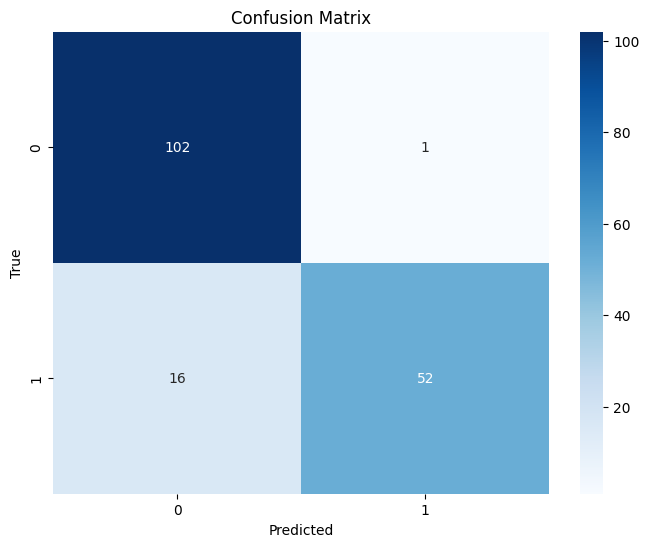

accuracy for class 0: 0.990
accuracy for class 1: 0.765

Evaluating the model on the train set...
auc on train set:  0.9415118931247963
accuracy on train set:  0.958984375
precision on train set:  0.9603153426095552
recall on train set:  0.958984375
f1 score on train set:  0.9584104180422582
balanced accuracy on train set:  0.9415118931247963
logistic loss on train set:  0.580368674813184
mse on train set:  0.041015625

Scorecard table:
                        Feature         Bin    Points
0               Clump_thickness  [6.5, 7.5[  0.366473
1               Clump_thickness  [7.5, 8.5[  0.209128
2               Clump_thickness  [9.5, inf[  0.327814
3       Uniformity_of_cell_size  [9.5, inf[  0.202563
4      Uniformity_of_cell_shape  [4.5, 5.5[  0.276528
5      Uniformity_of_cell_shape  [7.5, 8.5[  0.287898
6      Uniformity_of_cell_shape  [8.5, 9.5[  0.284755
7      Uniformity_of_cell_shape  [9.5, inf[  0.125886
8             Marginal_adhesion  [1.5, 2.5[  0.080850
9             Margi

In [71]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_1ook_beyondl1_model, breast_cancer_infbins_1ook_beyondl1_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': SCAD(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()
scorecard.show_scorecard()

Execution time: 0.01938009262084961 seconds

Evaluating the model on the test set...
test predictions:  [ 6.86783309e-01  1.38423090e+00 -1.47956549e-02  3.71589819e-03
  2.13591287e-02 -7.26130794e-02  8.75705940e-02  3.08942396e-01
  3.24349988e-01 -2.67013924e-03 -2.98422709e-02  4.10711295e-02
 -1.62126084e-03 -6.78327262e-02  3.67521161e-01  1.38684347e+00
  4.91634586e-03  1.21206378e+00  1.57583997e-01  1.17378255e+00
  1.28894855e+00  5.49133582e-02  1.41969302e+00 -1.47956549e-02
 -2.75576710e-02 -8.48314224e-03  9.08032343e-01  1.29991219e+00
 -4.26871073e-02  5.94302109e-01 -2.98422709e-02  1.02647423e+00
  8.41893497e-01  3.99454029e-01 -1.94094023e-02 -8.48314224e-03
  1.11187767e+00  4.39409757e-02  7.97184648e-01  6.54460503e-01
 -5.73070992e-02  9.94935990e-01  1.10904098e+00  1.50466160e-02
 -1.47956549e-02  9.89914719e-01 -1.47956549e-02  8.74377129e-01
 -5.66918525e-03  1.13430504e+00  2.05689244e-01 -2.13279786e-02
 -3.52269764e-02  7.77897252e-01 -2.98422709e-02  8

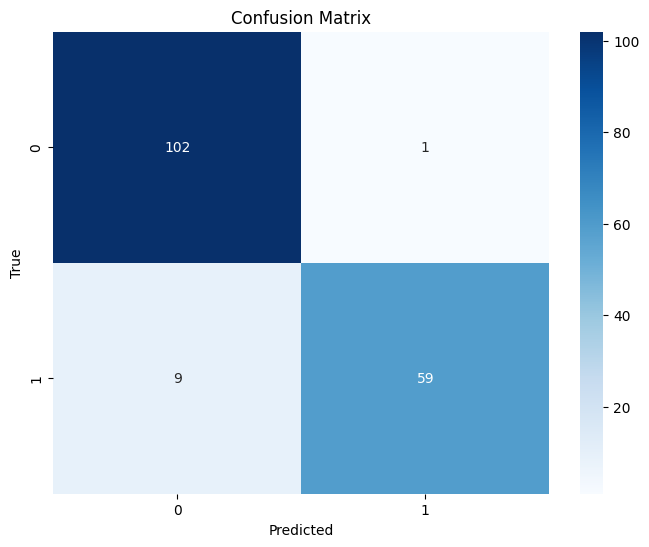

accuracy for class 0: 0.990
accuracy for class 1: 0.868

Evaluating the model on the train set...
auc on train set:  0.9868206684845056
accuracy on train set:  0.986328125
precision on train set:  0.9864618269868395
recall on train set:  0.986328125
f1 score on train set:  0.986357364970865
balanced accuracy on train set:  0.9868206684845056
logistic loss on train set:  0.567755289302033
mse on train set:  0.013671875

Scorecard table:
            Feature         Bin    Points
0   Clump_thickness  [1.5, 2.5[  0.025053
1   Clump_thickness  [2.5, 3.5[ -0.012845
2   Clump_thickness  [3.5, 4.5[  0.019712
3   Clump_thickness  [4.5, 5.5[  0.009348
4   Clump_thickness  [5.5, 6.5[ -0.053037
..              ...         ...       ...
75          Mitoses  [4.5, 5.5[ -0.002986
76          Mitoses  [5.5, 6.5[ -0.183841
77          Mitoses  [6.5, 7.5[  0.199821
78          Mitoses  [7.5, 9.0[  0.037227
79          Mitoses  [9.0, inf[ -0.037983

[80 rows x 3 columns]


In [72]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_1ook_adaptivelasso_model, breast_cancer_infbins_1ook_adaptivelasso_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-10})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()
scorecard.show_scorecard()

#### Inf Bins & Diff Coding

Execution time: 0.20728802680969238 seconds

Evaluating the model on the test set...
test predictions:  [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0]
     True Value  Prediction
0             1           1
1             1           1
2             0           0
3             0           0
4             0           0
..          ...         ...
166           0           0
167           0           0
168           1           1
169           1           1
170           1           0

[171 rows x 2 columns]
auc:  0.9363221016561964
accuracy:  0.9473684210526315
precision:  0.9496744842732763
recall:  0.9473684210526315
f1 score:  0.9468052706282575
balanced accuracy:  0.9363221016561964
logis

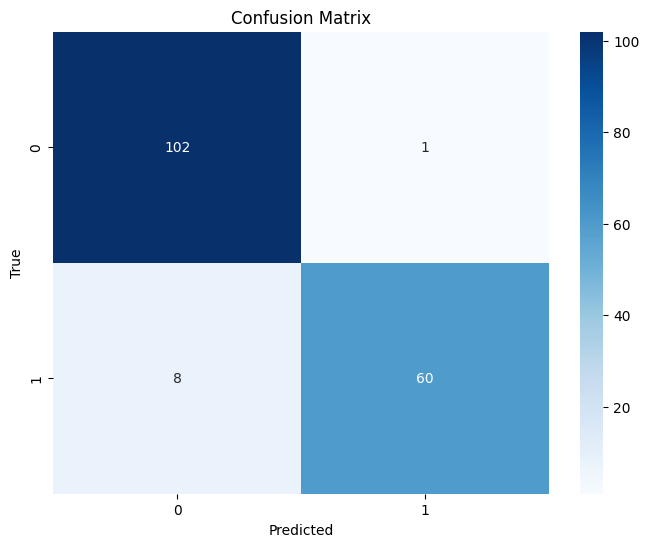

accuracy for class 0: 0.990
accuracy for class 1: 0.882

Evaluating the model on the train set...
auc on train set:  0.9868292431959664
accuracy on train set:  0.98828125
precision on train set:  0.98828125
recall on train set:  0.98828125
f1 score on train set:  0.98828125
balanced accuracy on train set:  0.9868292431959664
logistic loss on train set:  0.5684972531556302
mse on train set:  0.01171875

Scorecard table:
                        Feature         Bin    Points
0               Clump_thickness  [1.5, 2.5[  0.102763
1               Clump_thickness  [3.5, 4.5[  0.378678
2               Clump_thickness  [4.5, 5.5[ -0.090228
3               Clump_thickness  [6.5, 7.5[  1.905431
4               Clump_thickness  [8.5, 9.5[  1.214630
5               Clump_thickness  [9.5, inf[  0.640902
6       Uniformity_of_cell_size  [1.5, 2.5[  0.358381
7       Uniformity_of_cell_size  [2.5, 3.5[  0.902021
8       Uniformity_of_cell_size  [3.5, 4.5[ -0.315896
9       Uniformity_of_cell_size  [4.5

In [73]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_diffcoding_ml_model, breast_cancer_infbins_diffcoding_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params= {'C': 1/0.6, 'l1_ratio': 0.6, 'penalty': 'elasticnet', 'solver': 'saga'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()
scorecard.show_scorecard()

Execution time: 0.01203298568725586 seconds

Evaluating the model on the test set...
test predictions:  [1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0]
     True Value  Prediction
0             1           1
1             1           1
2             0           0
3             0           0
4             0           0
..          ...         ...
166           0           0
167           0           0
168           1           1
169           1           1
170           1           0

[171 rows x 2 columns]
auc:  0.9510279840091376
accuracy:  0.9590643274853801
precision:  0.960224635663232
recall:  0.9590643274853801
f1 score:  0.9587681321775793
balanced accuracy:  0.9510279840091376
logist

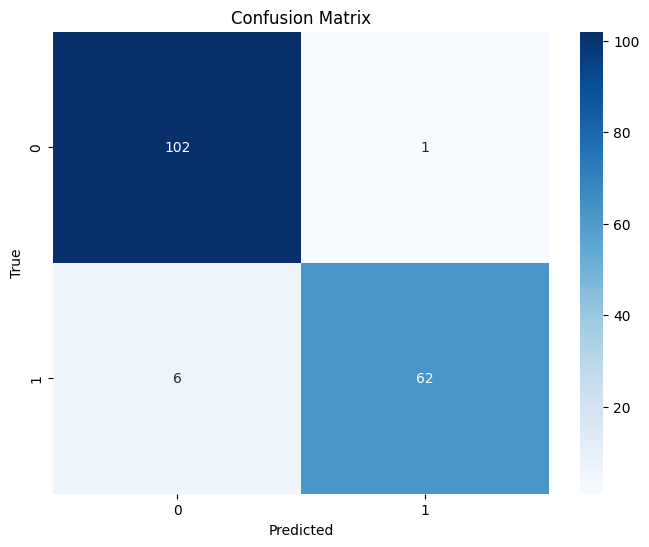

accuracy for class 0: 0.990
accuracy for class 1: 0.912

Evaluating the model on the train set...
auc on train set:  0.972183636020648
accuracy on train set:  0.97265625
precision on train set:  0.9729421232513777
recall on train set:  0.97265625
f1 score on train set:  0.972733646328883
balanced accuracy on train set:  0.972183636020648
logistic loss on train set:  0.5699811808628243
mse on train set:  0.02734375

Scorecard table:
            Feature         Bin    Points
0   Clump_thickness  [1.5, 2.5[  0.014972
1   Clump_thickness  [2.5, 3.5[  0.014972
2   Clump_thickness  [3.5, 4.5[  0.036457
3   Clump_thickness  [4.5, 5.5[  0.046477
4   Clump_thickness  [5.5, 6.5[  0.067551
..              ...         ...       ...
75          Mitoses  [4.5, 5.5[  0.011719
76          Mitoses  [5.5, 6.5[  0.009766
77          Mitoses  [6.5, 7.5[  0.007812
78          Mitoses  [7.5, 9.0[  0.005859
79          Mitoses  [9.0, inf[  0.003906

[80 rows x 3 columns]


In [74]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_diffcoding_mm_model, breast_cancer_infbins_diffcoding_mm_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.001953125})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()
scorecard.show_scorecard()

Execution time: 0.0054340362548828125 seconds

Evaluating the model on the test set...
test predictions:  [ 0.72131012  1.13886015 -0.01050062 -0.01050062 -0.01050062 -0.01050062
  0.12533203 -0.01050062  0.55561788 -0.01050062 -0.01050062 -0.01050062
  0.12533203 -0.01050062  0.32637609  1.13886015 -0.01050062  0.93532293
  0.29351743  1.13886015  1.13886015 -0.01050062  1.13886015 -0.01050062
 -0.01050062 -0.01050062  0.92484734  1.13886015 -0.01050062  0.50753024
 -0.01050062  0.93781609  0.93781609  0.56226607 -0.01050062 -0.01050062
  1.13886015  0.12533203  0.93532293  0.7085743  -0.01050062  0.71106746
  1.13886015 -0.01050062 -0.01050062  0.93781609 -0.01050062  0.92484734
 -0.01050062  1.13886015  0.1930366  -0.01050062 -0.01050062  0.72380328
 -0.01050062  0.93781609  0.52991331 -0.01050062  0.12533203  1.13886015
 -0.01050062 -0.01050062 -0.01050062  0.92484734 -0.01050062  0.12533203
  0.7085743   0.52991331 -0.01050062  0.1930366   0.91211152 -0.01050062
 -0.01050062 -0.01

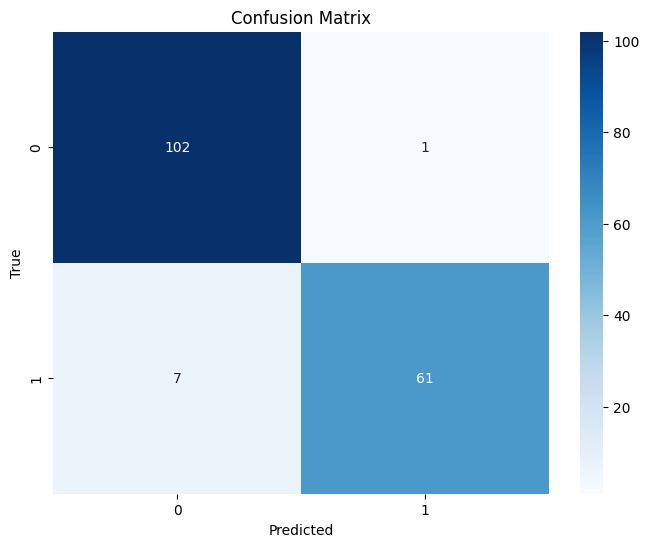

accuracy for class 0: 0.990
accuracy for class 1: 0.897

Evaluating the model on the train set...
auc on train set:  0.9707259350722848
accuracy on train set:  0.97265625
precision on train set:  0.9727677486700087
recall on train set:  0.97265625
f1 score on train set:  0.9726955262482899
balanced accuracy on train set:  0.9707259350722848
logistic loss on train set:  0.5707231447164215
mse on train set:  0.02734375

Scorecard table:
                    Feature         Bin    Points
0           Clump_thickness  [6.5, 7.5[  0.201044
1   Uniformity_of_cell_size  [2.5, 3.5[  0.168185
2   Uniformity_of_cell_size  [4.5, 5.5[  0.214013
3  Uniformity_of_cell_shape  [2.5, 3.5[  0.135833
4               Bare_nuclei  [4.5, 5.5[  0.226749
5           Bland_chromatin  [3.5, 4.5[  0.203537


In [75]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_diffcoding_beyondl1_model, breast_cancer_infbins_diffcoding_beyondl1_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()
scorecard.show_scorecard()

Execution time: 0.048796892166137695 seconds

Evaluating the model on the test set...
test predictions:  [0.81551749 1.16683713 0.         0.         0.         0.
 0.03294693 0.11589083 0.49385384 0.         0.         0.
 0.03294693 0.         0.56375806 1.16683713 0.         0.91377448
 0.12386091 1.16683713 1.08597293 0.         1.16683713 0.
 0.09283638 0.         0.89487956 1.16683713 0.         0.64798078
 0.         0.98102468 0.90016048 0.54176127 0.         0.
 1.08597293 0.03294693 0.9018023  0.74095685 0.         0.82017923
 1.16683713 0.         0.         0.90016048 0.         0.85144448
 0.         1.08597293 0.17219845 0.         0.         0.70906711
 0.         0.98102468 0.62006567 0.         0.03294693 1.16683713
 0.         0.         0.         0.7586081  0.         0.03294693
 0.69752177 0.50684866 0.         0.17219845 0.89010085 0.
 0.11589083 0.         1.00599168 0.91377448 0.         0.
 0.53507001 1.08597293 1.16683713 0.98102468 0.29605937 1.16683713
 0.  

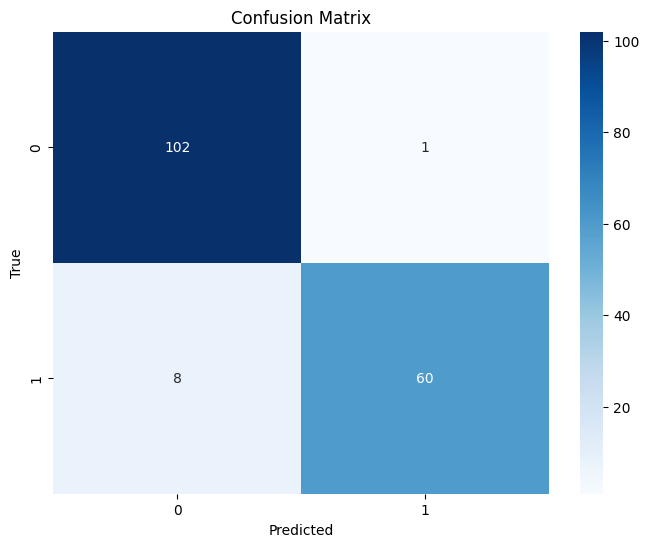

accuracy for class 0: 0.990
accuracy for class 1: 0.882

Evaluating the model on the train set...
auc on train set:  0.973649911680472
accuracy on train set:  0.974609375
precision on train set:  0.9747920944067539
recall on train set:  0.974609375
f1 score on train set:  0.9746636778030351
balanced accuracy on train set:  0.973649911680472
logistic loss on train set:  0.5699811808628243
mse on train set:  0.025390625

Scorecard table:
                     Feature         Bin        Points
0            Clump_thickness  [6.5, 7.5[  1.858125e-01
1    Uniformity_of_cell_size  [2.5, 3.5[  9.091399e-02
2    Uniformity_of_cell_size  [4.5, 5.5[  1.791212e-01
3   Uniformity_of_cell_shape  [2.5, 3.5[  3.294693e-02
4   Uniformity_of_cell_shape  [3.5, 4.5[  1.362715e-01
5   Uniformity_of_cell_shape  [4.5, 5.5[ -3.530956e-16
6          Marginal_adhesion  [3.5, 4.5[ -1.807123e-17
7                Bare_nuclei  [2.5, 3.5[  1.158908e-01
8                Bare_nuclei  [4.5, 5.5[  7.998125e-02
9         

In [76]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_diffcoding_adaptivelasso_model, breast_cancer_infbins_diffcoding_adaptivelasso_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 0.01})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()
scorecard.show_scorecard()

## (((sleep apnea)))
collection of clinical polysomnography (PSG) recordings. Beginning with PSG recordings from from ~19K patients evaluated at the Massachusetts General Hospital.

https://bdsp.io/content/hsp/2.0/#files

In [ ]:
sleep_apnea_data = pd.read_csv('../datasets/bdsp_psg_master_20231101.csv')

sleep_apnea_X = sleep_apnea_data.iloc[:, :-1]
sleep_apnea_y = sleep_apnea_data.iloc[:, -1]

print("num observations: ", sleep_apnea_y.count())
print("num features: ", sleep_apnea_X.shape[1])